In [181]:
#
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np

def RBF_HSIC(x, y, **kwargs):
    if x.ndim == 1:
        x = x.reshape(-1,1)
    if y.ndim == 1:
        y = y.reshape(-1,1)
    return np.mean(rbf_kernel(x, **kwargs)*rbf_kernel(y, **kwargs))

In [235]:
np.random.seed(1)
x = np.random.randn(1000)
y = np.random.normal(size=1000)

In [238]:
z = x + 3

In [201]:
r = pyper.R(use_pandas='True')
r.assign("x", x); r.assign("y", y); 
#r('install.packages("dHSIC")')
r("library('dHSIC')")
r('Sys.setlocale("LC_CTYPE", "en_US.UTF-8")')
r('Sys.setlocale("LC_ALL", "en_US.UTF-8")')
r('Sys.setenv("DISPLAY"=":0.0")')
#r('setwd("%s/VARLiNGAM_R")'%(dir_path))
#r('source("sourcedir.R")')
#r('source("main1.R")')
#r('main1("own")')
#r('sample_ms = read.csv("../sample_ts.csv")')
#r('drops <- c("X")')
#r('sample_ms = sample_ms[ , !(names(sample_ms) %in% drops)]')
#r('X_can = tsdata2canonicalform(ts(data), nlags=%s)'%(get_tau(X)))
#print(r('res   = VARLiNGAM(X_can,est_meth="lad")'))

'try({Sys.setenv("DISPLAY"=":0.0")})\n'

In [210]:
r = pyper.R(use_pandas='True')
r.assign("x", x); r.assign("y", y); 
#r("install.packages('dHSIC', repos = 'http://cran.us.r-project.org')")
r("library('dHSIC')")
r('Sys.setlocale("LC_CTYPE", "en_US.UTF-8")')
r('Sys.setlocale("LC_ALL", "en_US.UTF-8")')
r('Sys.setenv("DISPLAY"=":0.0")')

r("X<-list(x,y)")

r("library('dHSIC')")
r("res = dhsic.test(X, method='gamma', kernel='gaussian', B=100)")
r.get("res")

{'bandwidth': array([ 0.65436785,  0.70080205]),
 'crit.value': 0.582068752092944,
 'p.value': 0.74045226888976,
 'statistic': 0.225490293951136,
 'time': array([ 0.099,  0.075,  0.018])}

In [247]:
def dHSIC_R(x, y, method="gamma", kernel="gaussian", B=100):
    r = pyper.R(use_pandas='True')
    r.assign("x", x); r.assign("y", y); 
    #r("install.packages('dHSIC', repos = 'http://cran.us.r-project.org')")
    r("library('dHSIC')")
    r('Sys.setlocale("LC_CTYPE", "en_US.UTF-8")')
    r('Sys.setlocale("LC_ALL", "en_US.UTF-8")')
    r('Sys.setenv("DISPLAY"=":0.0")')

    r("X<-list(x,y)")
    print(r("dhsic.test(X)"))
    print(r("res = dhsic(X)"))
    return r.get("res")

In [248]:
dHSIC_R(x,y)

try({dhsic.test(X)})
$statistic
[1] 0.2254903

$crit.value
[1] 0.5873664

$p.value
[1] 0.7682318

$time
GramMat   dHSIC CritVal 
  0.100   0.069  23.859 

$bandwidth
[1] 0.6543679 0.7008020


try({res = dhsic(X)})



{'bandwidth': array([ 0.65436785,  0.70080205]),
 'dHSIC': 0.000225490293951136,
 'time': array([ 0.039,  0.012])}

In [ ]:
dHSIC_R(x,z)

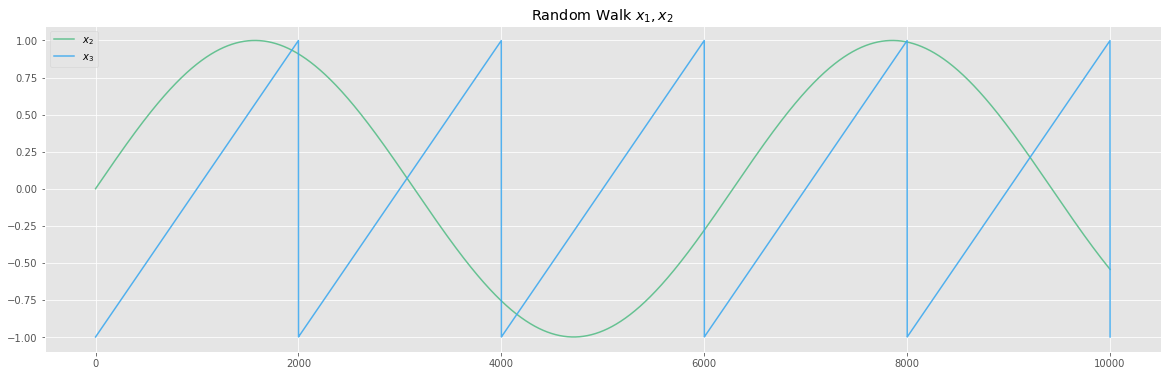

In [184]:
from scipy import signal
size = 10003
time = np.linspace(0, 5, size)
#x_2 = make_randomwalk(size)
#x_3 = make_randomwalk(size,50)
x_2 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
#s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
x_3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
figsize(20,6)
plt.plot(range(size),x_2, c="#58BE89", alpha=0.9, label="$x_2$")
plt.plot(range(size),x_3, c="#40AAEF", alpha=0.9, label="$x_3$")
plt.legend()
plt.title("Random Walk $x_1, x_2$")

In [185]:
#x_2は即時結合, x_3
x_1 = np.random.laplace(loc=0,scale=0.1,size=10000)
x_1 = x_1 + 0.4 * x_2[-10001:-1] + 0.25 * x_3[-10002:-2]+ 0.2*x_2[-10000:]
x_2 = x_2[-10000:]
x_3 = x_3[-10000:]

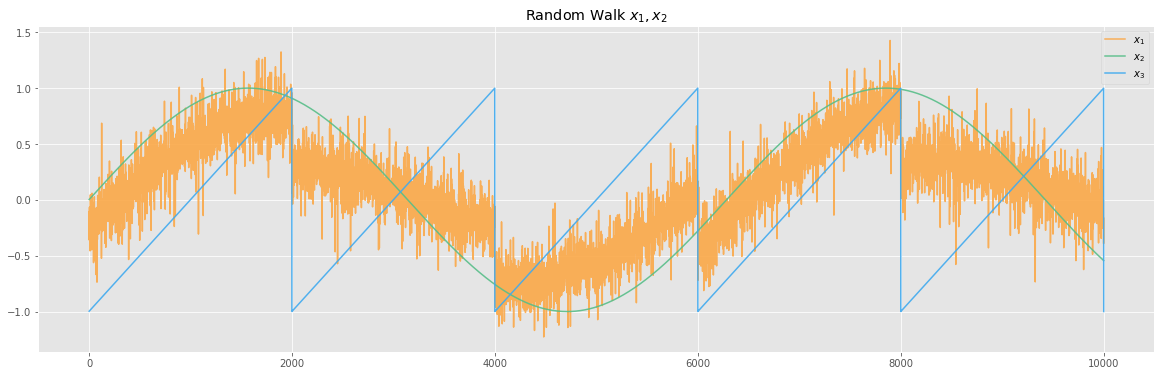

In [186]:
figsize(20,6)
plt.plot(range(10000),x_1, c="#FBA848", alpha=0.9, label="$x_1$")
plt.plot(range(10000),x_2, c="#58BE89", alpha=0.9, label="$x_2$")
plt.plot(range(10000),x_3, c="#40AAEF", alpha=0.9, label="$x_3$")
#plt.ylim([-10, 10])
plt.legend()
plt.title("Random Walk $x_1, x_2$")

In [187]:
x_1 = x_1 - np.mean(x_1)
x_2 = x_2 - np.mean(x_2)
x_3 = x_3 - np.mean(x_3)

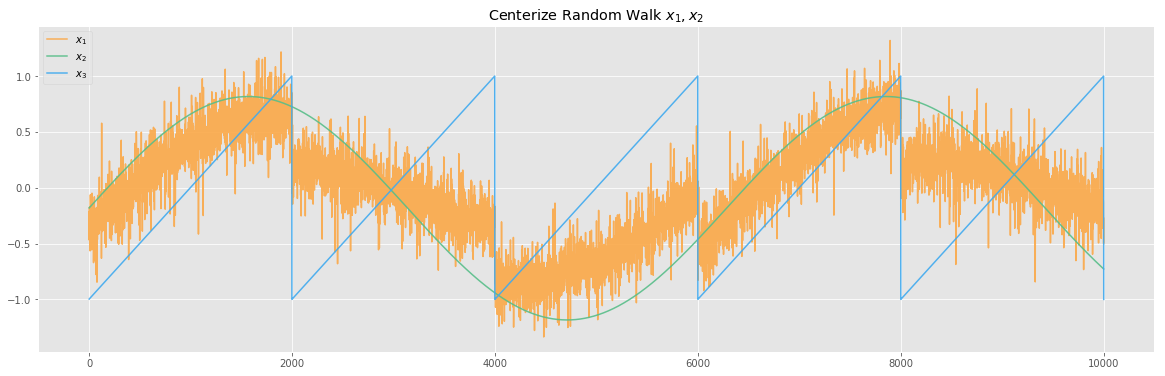

In [188]:
figsize(20,6)
plt.plot(range(10000),x_1, c="#FBA848", alpha=0.9, label="$x_1$")
plt.plot(range(10000),x_2, c="#58BE89", alpha=0.9, label="$x_2$")
plt.plot(range(10000),x_3, c="#40AAEF", alpha=0.9, label="$x_3$")
#plt.ylim([-130, 100])
plt.legend()
plt.title("Centerize Random Walk $x_1, x_2$")

In [189]:
X = np.asarray([x_1, x_2, x_3]).T

# VARLINGAM

In [190]:
from statsmodels.tsa.vector_ar.var_model import VAR
#from ica_lingam import LiNGAM
class VARLINGAM():
    def __init__(self):
        pass
    
    def _get_tau(self):
        return self.model.select_order(verbose=0)["aic"]

    def _get_M_tau(self,res):
        M_tau = res.coefs.transpose(1, 2, 0)
        #for i in range(self.tau):
        #    M_tau[:,:,i] = M_tau[:,:,i] - np.diag(np.diag(M_tau[:,:,i]))
        return M_tau

    def _get_n_t(self,X, M_tau):
        n_list = []
        for i in range(self.tau):    
            n_list.append(X.dot(M_tau[:,:,i]))
        return X - np.sum(np.asarray(n_list),axis=0)

    def _get_B_tau(self,B_0, M_tau):
        B_list = []
        #return (np.eye(B_0.shape[0]) - B_0).dot(M_tau[:,:,i])
        for i in range(self.tau):
            B_list.append((np.eye(B_0.shape[0]) - B_0).dot(M_tau)[:,:,i])
        return np.asarray(B_list)
    
    def fit(self, X, **kwargs):
        self.model = VAR(X)                  #get time-series delay         
        self.tau   = self._get_tau()
        res   = self.model.fit(self.tau)               #VAR model fit
        #from IPython.core.debugger import Pdb; Pdb().set_trace()
        self.M_tau = self._get_M_tau(res)         #tau time-delay Causal matrix
        n_t   = self._get_n_t(X, self.M_tau)      #noise vector
        #from IPython.core.debugger import Pdb; Pdb().set_trace()
        ica_lingam = BS_Pruning(**kwargs)        #noise vector lingam
        self.B_0    = ica_lingam.fit(n_t, matrix_plt=False)
        B_tau  = self._get_B_tau(self.B_0, self.M_tau) #estimate B_tau (causal matrix) 
        return B_tau

In [198]:
#varlingam = VARLINGAM()
#B_tau = varlingam.fit(X,N_sampling=10)

In [ ]:
varlingam.B_0

# BootStrap LiNGAM

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs_lingam import BS_LiNGAM, BS_Pruning
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
size = 10000
np.random.seed(2017)
x = np.random.uniform(size=size)

np.random.seed(1028)
y =0.4*x + np.random.uniform(size=size)

np.random.seed(128)
z =0.2*x + 0.2*y + np.random.uniform(size=size)

X = pd.DataFrame(np.asarray([x,y,z]).T,columns=["x","y","z"])

In [ ]:
from IPython.core.pylabtools import figsize
%matplotlib inline
plt.style.use("ggplot")
figsize(12,8)
bs = BS_Pruning()
bs.fit(X)

# VARLINGAM + input

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs_lingam import BS_LiNGAM, BS_Pruning
plt.style.use("ggplot")
%matplotlib inline

In [94]:
def make_sample_ts(seed,max_val,size):
    np.random.seed(seed)
    random_list = []
    for i in np.linspace(1e-10,max_val,size):
        random_list.append(i*np.random.randint(low=0,high=10,size=1)[0])
    random_list = -np.log(random_list)
    random_list += np.random.laplace(loc=0,scale=1,size=size)
    if np.min(random_list) < 0:
        random_list += -np.min(random_list)
    random_list[random_list == np.inf] = 0
    return random_list

In [95]:
x_1 = make_sample_ts(seed=5,    max_val=10,size=1002)
x_2 = make_sample_ts(seed=20000,max_val=10,size=1002)

/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [96]:
np.corrcoef(x_1,x_2)

array([[ 1.        ,  0.04028098],
       [ 0.04028098,  1.        ]])

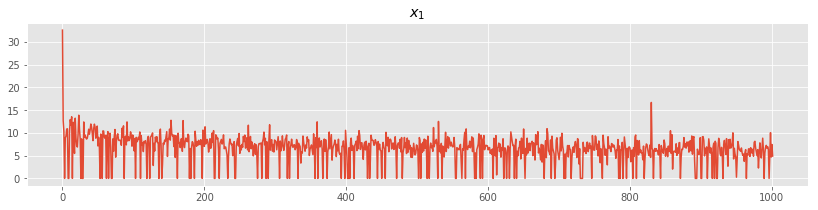

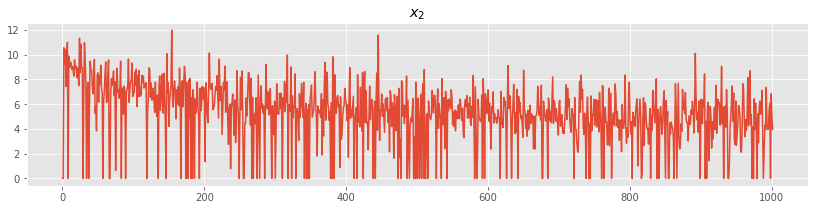

In [97]:
from IPython.core.pylabtools import figsize
figsize(14,3)
plt.plot(x_1)
plt.title("$x_1$")
plt.show()

plt.plot(x_2)
plt.title("$x_2$")
plt.show()

In [98]:
np.random.seed(201411289)
x_3 = np.random.laplace(loc=0,scale=0.1,size=1000)

#x_2は即時結合と-2, x_1は-1
x_3 = x_3 + 0.4 * x_1[-1001:-1] + 0.25 * x_2[-1002:-2]+ 0.2*x_2[-1000:]

In [99]:
x_1 = x_1[-1000:]
x_2 = x_2[-1000:]
x_3 = x_3[-1000:]

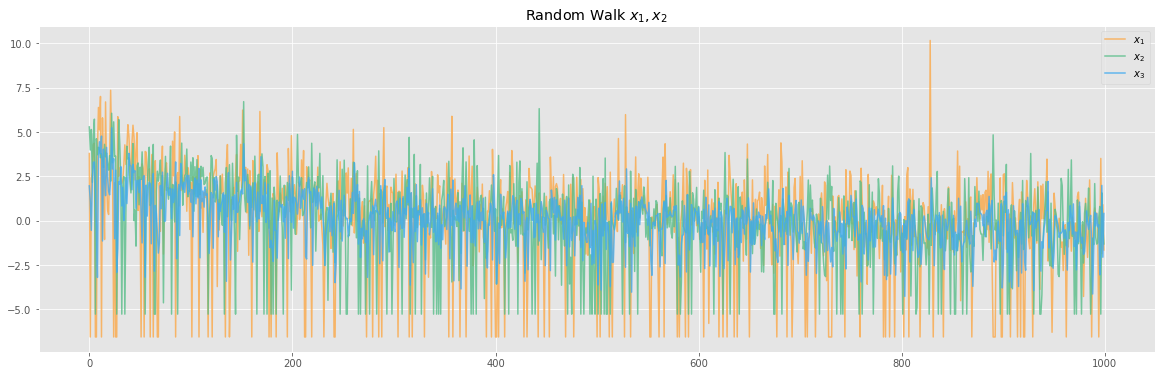

In [100]:
figsize(20,6)
plt.plot(range(1000),x_1- np.mean(x_1), c="#FBA848", alpha=0.8, label="$x_1$")
plt.plot(range(1000),x_2- np.mean(x_2), c="#58BE89", alpha=0.8, label="$x_2$")
plt.plot(range(1000),x_3- np.mean(x_3), c="#40AAEF", alpha=0.8, label="$x_3$")
plt.legend()
plt.title("Random Walk $x_1, x_2$")

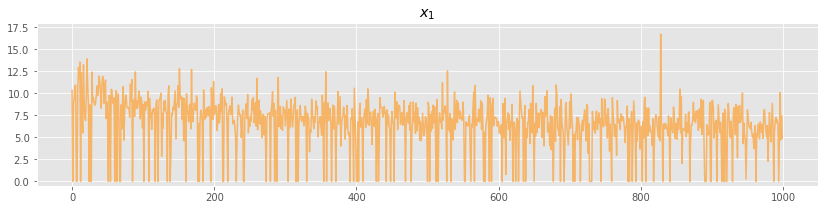

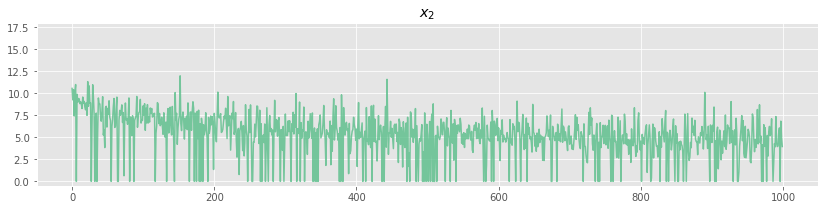

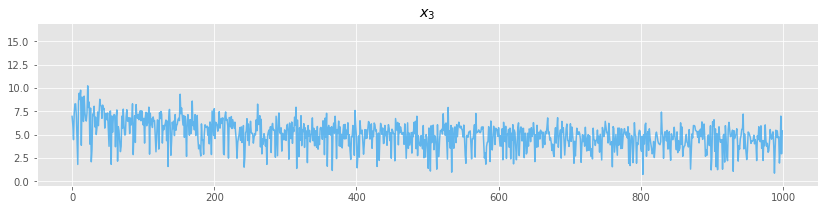

In [101]:
from IPython.core.pylabtools import figsize
figsize(14,3)
plt.plot(range(1000),x_1, c="#FBA848", alpha=0.8, label="$x_1$")
plt.title("$x_1$")
plt.ylim([-0.5,18])
plt.show()

plt.plot(range(1000),x_2, c="#58BE89", alpha=0.8, label="$x_2$")
plt.title("$x_2$")
plt.ylim([-0.5,18])
plt.show()

plt.plot(range(1000),x_3, c="#40AAEF", alpha=0.8, label="$x_3$")
plt.title("$x_3$")
plt.ylim([-0.5,17])
plt.show()

In [87]:
X = np.c_[x_1,x_2,x_3]

In [259]:
import pyper
from statsmodels.tsa.vector_ar.var_model import VAR

def get_tau(X,ic="bic"):
    model = VAR(X)
    return model.select_order(verbose=0)[ic]

def VARLINGAM_R(X,dir_path="/Users/Chang/Desktop/VARLiNGAM_dir"):
    r = pyper.R(use_pandas='True')
    r.assign("data", X)
    r('Sys.setlocale("LC_CTYPE", "en_US.UTF-8")')
    r('Sys.setlocale("LC_ALL", "en_US.UTF-8")')
    r('Sys.setenv("DISPLAY"=":0.0")')
    r('setwd("%s/VARLiNGAM_R")'%(dir_path))
    r('source("sourcedir.R")')
    r('source("main1.R")')
    r('main1("own")')
    #r('sample_ms = read.csv("../sample_ts.csv")')
    #r('drops <- c("X")')
    #r('sample_ms = sample_ms[ , !(names(sample_ms) %in% drops)]')
    r('X_can = tsdata2canonicalform(ts(data), nlags=%s)'%(get_tau(X)))
    print(r('res   = VARLiNGAM(X_can, est_meth="lad")'))
    return pd.Series(r.get("res"))

In [255]:
X.shape

(1000, 3)

In [256]:
res = VARLINGAM_R(X)
#B_tau = np.asarray(res["Bhat"])
#const = np.asarray(res["const"])

try({res   = VARLiNGAM(X_can, est_meth="lad")})
Error in VARLiNGAM(X_can, est_meth = "lad") : object 'X_can' not found



In [260]:
res = VARLINGAM_R(X)

try({res   = VARLiNGAM(X_can, est_meth="lad")})
Error in VARLiNGAM(X_can, est_meth = "lad") : object 'X_can' not found



In [14]:
"""
print(r('install.packages("nortest", repos = "http://cran.us.r-project.org")'))
print(r('install.packages("sm", repos = "http://cran.us.r-project.org")'))
print(r('install.packages("tseries", repos = "http://cran.us.r-project.org")'))
print(r('install.packages("quantreg", repos = "http://cran.us.r-project.org")'))
print(r('install.packages("fastICA", repos = "http://cran.us.r-project.org")'))
"""

'\nprint(r(\'install.packages("nortest", repos = "http://cran.us.r-project.org")\'))\nprint(r(\'install.packages("sm", repos = "http://cran.us.r-project.org")\'))\nprint(r(\'install.packages("tseries", repos = "http://cran.us.r-project.org")\'))\nprint(r(\'install.packages("quantreg", repos = "http://cran.us.r-project.org")\'))\nprint(r(\'install.packages("fastICA", repos = "http://cran.us.r-project.org")\'))\n'

In [69]:
pd.DataFrame(X).to_csv("/Users/Chang/Desktop/VARLiNGAM_dir/sample_ts.csv")

In [162]:
def experience(a,b,c):
    x_1 = make_sample_ts(seed=5,    max_val=10,size=1002)
    x_2 = make_sample_ts(seed=20000,max_val=10,size=1002)

    np.random.seed(201411289)
    x_3 = np.random.laplace(loc=0,scale=0.1,size=1000)

    #x_2は即時結合と-2, x_1は-1
    x_3 = x_3 + a * x_1[-1001:-1] + b * x_2[-1002:-2]+ c*x_2[-1000:]
    x_1 = x_1[-1000:]
    x_2 = x_2[-1000:]
    x_3 = x_3[-1000:]
    X = np.c_[x_1,x_2,x_3]
    res = VARLINGAM_R(X)
    B_tau = np.asarray(res["Bhat"])
    return B_tau

In [163]:
B_tau_list = []
for a in tqdm(np.linspace(-2,2,100)):
    B_tau_ = experience(a=a, b=0.5, c=0.5)
    B_tau_list.append(B_tau_)
    
B_tau_list2 = []
for b in tqdm(np.linspace(-2,2,100)):
    B_tau_ = experience(a=0.5, b=b, c=0.5)
    B_tau_list2.append(B_tau_)
    
B_tau_list3 = []
for c in tqdm(np.linspace(-2,2,100)):
    B_tau_ = experience(a=0.5, b=0.5, c=c)
    B_tau_list3.append(B_tau_)

  0%|          | 0/100 [00:00<?, ?it/s]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.09935 
    0.5851011 
    0.6081184 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.260002e-26 2.058287e-20 2.288203e-20

$ShapiroFrancia
[1] 3.664900e-23 3.165164e-18 3.479558e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]         [,3]
[1,]  0.02892251 -3.3514441  6.696862859
[2,] -0.35086523 -0.1621248  0.383097133
[3,]  0.00881765  0.4235356 -0.002674513
[1] "Test f

  1%|          | 1/100 [00:05<09:42,  5.88s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.099443 
    0.5849734 
    0.607687 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.322489e-26 2.070922e-20 2.293769e-20

$ShapiroFrancia
[1] 3.702631e-23 3.181986e-18 3.487372e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008828068 -0.4239707  0.00354815
[2,]  0.029196718 -3.3505753  6.69521160
[3,]  0.350842165  0.1645539 -0.38801592
[1] "Test f

  2%|▏         | 2/100 [00:11<09:18,  5.70s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.09954 
    0.5846165 
    0.6055827 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.388839e-26 2.073859e-20 2.280079e-20

$ShapiroFrancia
[1] 3.742631e-23 3.185466e-18 3.471272e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.029944148  3.3486635 -6.69299193
[2,]  0.008785228  0.4289801 -0.01354678
[3,] -0.350782617 -0.1704589  0.39988552
[1] "Test f

  3%|▎         | 3/100 [00:15<08:43,  5.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.099873 
    0.584287 
    0.6048265 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.471976e-26 2.078881e-20 2.282368e-20

$ShapiroFrancia
[1] 3.792384e-23 3.191784e-18 3.474992e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.350724825  0.1760052 -0.41109208
[2,] -0.030590510  3.3446925 -6.68520125
[3,] -0.008809639 -0.4294694  0.01452208
[1] "Test f

  4%|▍         | 4/100 [00:20<08:25,  5.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.100422 
    0.5844535 
    0.6040957 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.572170e-26 2.098361e-20 2.285409e-20

$ShapiroFrancia
[1] 3.852003e-23 3.218069e-18 3.479699e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.008782239  0.4319721 -0.01954833
[2,] -0.350735391 -0.1744163  0.40795292
[3,]  0.030428408 -3.3461759  6.68903577
[1] "Test 

  5%|▌         | 5/100 [00:25<08:05,  5.11s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.099986 
    0.584338 
    0.6023378 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.587885e-26 2.111821e-20 2.303455e-20

$ShapiroFrancia
[1] 3.862037e-23 3.236377e-18 3.507803e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.008669079  0.4384932 -0.03259307
[2,]  0.030526058 -3.3474902  6.69384827
[3,] -0.350729973 -0.1739671  0.40695964
[1] "Test f

  6%|▌         | 6/100 [00:30<07:43,  4.93s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.099443 
    0.5839202 
    0.6014748 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.596927e-26 2.118333e-20 2.315347e-20

$ShapiroFrancia
[1] 3.868200e-23 3.245483e-18 3.525398e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.350715818  0.1749501 -0.40887969
[2,] -0.008628293 -0.4403742  0.03635523
[3,] -0.030666463  3.3465593 -6.69265143
[1] "Test 

  7%|▋         | 7/100 [00:34<07:26,  4.80s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.09897 
    0.582862 
    0.6006312 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.639745e-26 2.109505e-20 2.313983e-20

$ShapiroFrancia
[1] 3.894373e-23 3.234591e-18 3.523869e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.030837592 -3.3440279  6.68750386
[2,] -0.350699355 -0.1766809  0.41234474
[3,]  0.008629418  0.4399711 -0.03553636
[1] "Test fo

  8%|▊         | 8/100 [00:38<07:00,  4.57s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.098539 
    0.5822067 
    0.6000055 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.710480e-26 2.110602e-20 2.314950e-20

$ShapiroFrancia
[1] 3.937061e-23 3.236787e-18 3.525266e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.350696858  0.1770732 -0.41311798
[2,] 0.008614121  0.4400632 -0.03572078
[3,] 0.030890258 -3.3431037  6.68572185
[1] "Test for 

  9%|▉         | 9/100 [00:43<06:55,  4.57s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.098091 
    0.5815198 
    0.5993477 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.790730e-26 2.111832e-20 2.316083e-20

$ShapiroFrancia
[1] 3.985365e-23 3.239197e-18 3.526892e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.350694305 -0.1774740 0.41390981
[2,]  0.030947684 -3.3421217 6.68382855
[3,] -0.008598091 -0.4401633 0.03592188
[1] "Test for 

 10%|█         | 10/100 [00:47<06:41,  4.46s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.097671 
    0.580799 
    0.5986552 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.886140e-26 2.113251e-20 2.317568e-20

$ShapiroFrancia
[1] 4.042888e-23 3.241900e-18 3.528994e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.030971279  3.3411261 -6.68191024
[2,] -0.008582985 -0.4402301  0.03605641
[3,]  0.350703243  0.1772280 -0.41340586
[1] "Test f

 11%|█         | 11/100 [00:51<06:31,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.098215 
    0.5800417 
    0.5982859 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.807563e-26 2.114896e-20 2.393951e-20

$ShapiroFrancia
[1] 3.997169e-23 3.244950e-18 3.634816e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008490008 -0.4420679  0.03972112
[2,]  0.350688276  0.1761840 -0.41107839
[3,] -0.031023336  3.3392298 -6.67857856
[1] "Test 

 12%|█▏        | 12/100 [00:55<06:24,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.098012 
    0.5792452 
    0.600477 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.870744e-26 2.116648e-20 2.460934e-20

$ShapiroFrancia
[1] 4.035170e-23 3.248189e-18 3.723677e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.031062730 -3.3359486  6.66940149
[2,] -0.008578075 -0.4340432  0.02367795
[3,]  0.350678176  0.1767117 -0.41214370
[1] "Test f

 13%|█▎        | 13/100 [01:01<06:39,  4.59s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.097629 
    0.5789516 
    0.5986937 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.970657e-26 2.121667e-20 2.462159e-20

$ShapiroFrancia
[1] 4.094806e-23 3.255342e-18 3.728231e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.008464109  0.4397146 -0.03502623
[2,] -0.350665638 -0.1771191  0.41289252
[3,]  0.031288512 -3.3359272  6.67128893
[1] "Test 

 14%|█▍        | 14/100 [01:05<06:41,  4.67s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.097822 
    0.5788018 
    0.5972324 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.013077e-26 2.121713e-20 2.469652e-20

$ShapiroFrancia
[1] 4.119909e-23 3.255499e-18 3.739879e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.008376237 -0.4446628  0.0449395
[2,] -0.031368071  3.3336905 -6.6684706
[3,] -0.350651014 -0.1770205  0.4126459
[1] "Test for 

 15%|█▌        | 15/100 [01:10<06:23,  4.51s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.097509 
    0.5784403 
    0.5970111 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.112784e-26 2.129931e-20 2.473414e-20

$ShapiroFrancia
[1] 4.180616e-23 3.267110e-18 3.744859e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.350654713  0.1776673 -0.41394533
[2,] -0.008364984 -0.4442594  0.04414627
[3,]  0.031394914 -3.3330691  6.66713928
[1] "Test 

 16%|█▌        | 16/100 [01:14<06:12,  4.44s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.096868 
    0.578398 
    0.5967802 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.173803e-26 2.128926e-20 2.477520e-20

$ShapiroFrancia
[1] 4.217678e-23 3.265640e-18 3.750290e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]      [,3]
[1,]  0.031546352 -3.3316739 6.6643239
[2,] -0.008341157 -0.4446270 0.0448772
[3,] -0.350642026 -0.1788652 0.4163213
[1] "Test for Gauss

 17%|█▋        | 17/100 [01:18<06:05,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.096191 
    0.5780548 
    0.5965373 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.239456e-26 2.136410e-20 2.481996e-20

$ShapiroFrancia
[1] 4.257503e-23 3.276202e-18 3.756212e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.008320253 -0.4444448 0.04452409
[2,] -0.350627597 -0.1801476 0.41887295
[3,]  0.031720566 -3.3307677 6.66244188
[1] "Test for 

 18%|█▊        | 18/100 [01:22<05:54,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.095221 
    0.5781966 
    0.596408 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.365735e-26 2.178906e-20 2.489746e-20

$ShapiroFrancia
[1] 4.333737e-23 3.333455e-18 3.766110e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]        [,3]
[1,] -0.03189114 3.3346607 -6.66985435
[2,]  0.00832434 0.4436861 -0.04302685
[3,]  0.35062267 0.1815958 -0.42180636
[1] "Test for Gauss

 19%|█▉        | 19/100 [01:27<05:50,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.094394 
    0.5777315 
    0.5930413 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.457447e-26 2.182323e-20 2.477383e-20

$ShapiroFrancia
[1] 4.389096e-23 3.338668e-18 3.757634e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008119404 -0.4540306  0.06373493
[2,] -0.031852101  3.3304930 -6.66564310
[3,] -0.350640559 -0.1783366  0.41517432
[1] "Test 

 20%|██        | 20/100 [01:31<05:40,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.093514 
    0.5775649 
    0.5924893 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.557396e-26 2.203594e-20 2.485346e-20

$ShapiroFrancia
[1] 4.449315e-23 3.367692e-18 3.768383e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.350643224  0.1781938 -0.4148577
[2,] -0.008066709 -0.4552888  0.0662702
[3,] -0.031862940  3.3288521 -6.6628820
[1] "Test for 

 21%|██        | 21/100 [01:35<05:37,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.092636 
    0.5770378 
    0.5914312 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.606510e-26 2.208152e-20 2.493860e-20

$ShapiroFrancia
[1] 4.479477e-23 3.374527e-18 3.780569e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.032039366 -3.3266486  6.65928668
[2,]  0.350625266  0.1790579 -0.41650932
[3,] -0.007985438 -0.4575927  0.07089422
[1] "Test 

 22%|██▏       | 22/100 [01:39<05:34,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091552 
    0.5810095 
    0.5916517 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.778176e-26 2.287178e-20 2.527241e-20

$ShapiroFrancia
[1] 4.582009e-23 3.480041e-18 3.824804e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.031250160  3.3566018 -6.72068903
[2,] -0.350727517 -0.1682616  0.39468650
[3,]  0.007766272  0.4663196 -0.08839593
[1] "Test 

 23%|██▎       | 23/100 [01:44<05:29,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.090522 
    0.5781345 
    0.591289 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.821183e-26 2.256635e-20 2.554040e-20

$ShapiroFrancia
[1] 4.608642e-23 3.437570e-18 3.860807e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.007911248  0.4599689 -0.07562845
[2,] 0.350587830  0.1828229 -0.42396072
[3,] 0.032472175 -3.3281567  6.66219196
[1] "Test for G

 24%|██▍       | 24/100 [01:48<05:24,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.08949 
    0.5749359 
    0.5927553 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.896638e-26 2.273043e-20 2.572370e-20

$ShapiroFrancia
[1] 4.654303e-23 3.462243e-18 3.883927e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008351741 -0.4426591  0.04086821
[2,] -0.031924541  3.3299495 -6.65978106
[3,]  0.350602962  0.1828469 -0.42446963
[1] "Test f

 25%|██▌       | 25/100 [01:52<05:19,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.088383 
    0.5742853 
    0.5920836 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.980077e-26 2.278368e-20 2.595135e-20

$ShapiroFrancia
[1] 4.704710e-23 3.470378e-18 3.916366e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.031932234 -3.3290651  6.65871421
[2,] 0.008245437  0.4446488 -0.04485765
[3,] 0.350599449  0.1819912 -0.42260904
[1] "Test for 

 26%|██▌       | 26/100 [01:56<05:15,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.087191 
    0.5738933 
    0.5888416 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.072282e-26 2.282032e-20 2.657127e-20

$ShapiroFrancia
[1] 4.760321e-23 3.475829e-18 4.008292e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]       [,3]
[1,]  0.350589266 0.1800342 -0.4182705
[2,] -0.032173223 3.3266211 -6.6580999
[3,]  0.007887266 0.4579996 -0.0715802
[1] "Test for Gaus

 27%|██▋       | 27/100 [02:01<05:11,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085927 
    0.5735067 
    0.5887475 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.170721e-26 2.272209e-20 2.697390e-20

$ShapiroFrancia
[1] 4.819654e-23 3.461508e-18 4.061986e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008138575 -0.4494670  0.05434827
[2,]  0.350518989  0.1859329 -0.43039496
[3,]  0.032732120 -3.3283667  6.65761017
[1] "Test 

 28%|██▊       | 28/100 [02:05<05:08,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085133 
    0.5736684 
    0.5886467 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.185968e-26 2.302044e-20 2.743238e-20

$ShapiroFrancia
[1] 4.830400e-23 3.503348e-18 4.122139e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350555774 -0.1806900  0.41990023
[2,]  0.008136017  0.4491471 -0.05372948
[3,] -0.032145307  3.3345340 -6.66961906
[1] "Test 

 29%|██▉       | 29/100 [02:09<04:57,  4.19s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084315 
    0.5737849 
    0.5882308 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.237432e-26 2.343319e-20 2.736889e-20

$ShapiroFrancia
[1] 4.862389e-23 3.559821e-18 4.113559e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008084394 -0.4505624  0.05659553
[2,] -0.350581647 -0.1768662  0.41221157
[3,] -0.031724367  3.3443540 -6.68966831
[1] "Test 

 30%|███       | 30/100 [02:13<04:56,  4.23s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.082685 
    0.5738938 
    0.5876106 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.366804e-26 2.339678e-20 2.653151e-20

$ShapiroFrancia
[1] 4.940313e-23 3.556551e-18 4.003410e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.350587432 0.1755255 -0.40946658
[2,] -0.031572119 3.3565196 -6.71451875
[3,]  0.008005751 0.4517586 -0.05901521
[1] "Test for 

 31%|███       | 31/100 [02:18<04:53,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.080878 
    0.574005 
    0.5856347 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.709448e-26 2.389195e-20 2.714485e-20

$ShapiroFrancia
[1] 5.142508e-23 3.624432e-18 4.082988e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350599789 -0.1741244  0.40658309
[2,]  0.007872541  0.4578030 -0.07114587
[3,] -0.031641157  3.3604834 -6.72436034
[1] "Test f

 32%|███▏      | 32/100 [02:22<04:49,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.080284 
    0.5745572 
    0.5840388 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.222309e-26 2.495536e-20 2.723096e-20

$ShapiroFrancia
[1] 5.441539e-23 3.767795e-18 4.095759e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.007856387 -0.4587423  0.07304963
[2,]  0.350714423  0.1641322 -0.38668386
[3,] -0.030729208  3.3752520 -6.75403914
[1] "Test 

 33%|███▎      | 33/100 [02:26<04:45,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078986 
    0.5703442 
    0.5830725 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.382664e-26 2.314063e-20 2.796000e-20

$ShapiroFrancia
[1] 5.536959e-23 3.525971e-18 4.190814e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.007707764  0.4563570 -0.06809379
[2,] 0.031987721 -3.3523846  6.70727525
[3,] 0.350597513  0.1742653 -0.40660120
[1] "Test for 

 34%|███▍      | 34/100 [02:30<04:40,  4.25s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078465 
    0.5703157 
    0.5807997 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.556746e-26 2.380029e-20 2.925920e-20

$ShapiroFrancia
[1] 5.638798e-23 3.614162e-18 4.360218e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.350649332 -0.1639911 0.38573419
[2,] -0.007415423 -0.4675624 0.09052176
[3,]  0.031407047 -3.3578332 6.72215146
[1] "Test for 

 35%|███▌      | 35/100 [02:35<04:42,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077801 
    0.5727529 
    0.5799563 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.737985e-26 2.494093e-20 2.933279e-20

$ShapiroFrancia
[1] 5.745160e-23 3.762580e-18 4.368462e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.007437489 0.4689329 -0.09320002
[2,] -0.031334249 3.3762324 -6.75876241
[3,]  0.350649845 0.1609493 -0.37985662
[1] "Test for 

 36%|███▌      | 36/100 [02:39<04:34,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077413 
    0.5760025 
    0.5815953 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.008111e-26 2.690432e-20 2.866603e-20

$ShapiroFrancia
[1] 5.901533e-23 4.015678e-18 4.275082e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] -0.00743680 -0.4703924  0.09616868
[2,]  0.03018401 -3.3960453  6.79947446
[3,]  0.35073674  0.1505821 -0.35928484
[1] "Test for 

 37%|███▋      | 37/100 [02:43<04:31,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.075688 
    0.5799467 
    0.5814103 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.281682e-26 2.802896e-20 2.878274e-20

$ShapiroFrancia
[1] 6.061024e-23 4.145815e-18 4.290428e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350395349 -0.1808805  0.42056069
[2,] -0.007770637 -0.4552598  0.06572163
[3,] -0.033782252  3.3688659 -6.74004932
[1] "Test 

 38%|███▊      | 38/100 [02:48<04:26,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07284 
    0.5810065 
    0.5773292 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.642467e-26 2.846444e-20 2.901909e-20

$ShapiroFrancia
[1] 6.270428e-23 4.190679e-18 4.323491e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.007672666 -0.4594407 0.07404001
[2,]  0.036121201 -3.3405516 6.68549725
[3,] -0.350151077 -0.1980608 0.45489328
[1] "Test for G

 39%|███▉      | 39/100 [02:52<04:21,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.071392 
    0.5797536 
    0.5812338 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.585021e-26 2.746949e-20 2.977932e-20

$ShapiroFrancia
[1] 6.242207e-23 4.063160e-18 4.418262e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.007384687  0.4611763 -0.07735929
[2,] -0.034066059  3.3773490 -6.75864048
[3,] -0.350335475 -0.1808563  0.41964978
[1] "Test 

 40%|████      | 40/100 [02:56<04:17,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.065533 
    0.5801261 
    0.5846775 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.151767e-26 2.760924e-20 3.018478e-20

$ShapiroFrancia
[1] 6.010437e-23 4.078930e-18 4.467867e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.350484235  0.1693050 -0.3959750
[2,] -0.007277123 -0.4534161  0.0617281
[3,] -0.032621480  3.3794845 -6.7609802
[1] "Test for 

 41%|████      | 41/100 [03:01<04:12,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.065839 
    0.581479 
    0.5855694 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.918146e-26 2.748285e-20 2.855925e-20

$ShapiroFrancia
[1] 5.879492e-23 4.057514e-18 4.249317e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.350526548 0.1634848 -0.38456785
[2,] -0.031603539 3.3849822 -6.77293783
[3,]  0.007391291 0.4547399 -0.06433231
[1] "Test for G

 42%|████▏     | 42/100 [03:05<04:09,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.063786 
    0.5877935 
    0.5860158 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.179654e-26 2.739929e-20 2.839577e-20

$ShapiroFrancia
[1] 6.034190e-23 4.036268e-18 4.229284e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]        [,3]
[1,] 0.00707641  0.4614600 -0.07776908
[2,] 0.35045780  0.1653232 -0.38776195
[3,] 0.03237488 -3.3788105  6.76316054
[1] "Test for Gaus

 43%|████▎     | 43/100 [03:09<04:06,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.066907 
    0.5894399 
    0.5941732 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.596359e-26 2.619758e-20 2.736461e-20

$ShapiroFrancia
[1] 5.693528e-23 3.874256e-18 4.086899e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] -0.00718834 -0.4477231  0.05011324
[2,]  0.35046507  0.1570470 -0.37100742
[3,]  0.03173021 -3.3838005  6.76894153
[1] "Test for 

 44%|████▍     | 44/100 [03:14<04:03,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07113 
    0.5933451 
    0.5987459 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.211311e-26 2.377454e-20 2.656586e-20

$ShapiroFrancia
[1] 4.880629e-23 3.540143e-18 3.979893e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]         [,3]
[1,]  0.349943527 0.1986998 -0.455337401
[2,]  0.007846639 0.4260583 -0.006639056
[3,] -0.036245995 3.3445595 -6.684081409
[1] "Test f

 45%|████▌     | 45/100 [03:18<04:00,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.068869 
    0.6078935 
    0.5990773 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.216333e-26 2.385888e-20 2.486964e-20

$ShapiroFrancia
[1] 4.885956e-23 3.522649e-18 3.752044e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.350191633 -0.1715735  0.3997111
[2,]  0.006873015  0.4640171 -0.0826472
[3,] -0.034263720  3.3534523 -6.7154385
[1] "Test for 

 46%|████▌     | 46/100 [03:22<03:57,  4.39s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.065484 
    0.6136559 
    0.607123 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.380881e-26 2.261873e-20 2.276933e-20

$ShapiroFrancia
[1] 4.388457e-23 3.351105e-18 3.472464e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.350341395 0.1731729 -0.40248378
[2,] -0.034311104 3.3674960 -6.74085837
[3,]  0.006900322 0.4555038 -0.06551044
[1] "Test for G

 47%|████▋     | 47/100 [03:27<03:52,  4.39s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.062357 
    0.6171683 
    0.6157024 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.003565e-26 2.127312e-20 2.203758e-20

$ShapiroFrancia
[1] 4.161753e-23 3.164673e-18 3.372276e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.035287001  3.3795256 -6.75869483
[2,] -0.350298304 -0.1841850  0.42435301
[3,] -0.007242068 -0.4384302  0.03117746
[1] "Test 

 48%|████▊     | 48/100 [03:31<03:47,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070491 
    0.6271788 
    0.6220883 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.681306e-26 2.001140e-20 2.179230e-20

$ShapiroFrancia
[1] 3.952589e-23 2.979907e-18 3.334828e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.006980564 -0.4493324 0.05301436
[2,]  0.035234079 -3.3436284 6.69204882
[3,] -0.350419654 -0.1835518 0.42291505
[1] "Test for 

 49%|████▉     | 49/100 [03:36<03:42,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078385 
    0.6365702 
    0.6273875 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.912240e-26 1.853113e-20 2.006879e-20

$ShapiroFrancia
[1] 3.472917e-23 2.769085e-18 3.103052e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350634236 -0.1664108  0.38853847
[2,] -0.033001157  3.3377486 -6.68626397
[3,]  0.006891772  0.4626328 -0.07972985
[1] "Test 

 50%|█████     | 50/100 [03:40<03:36,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084746 
    0.6407522 
    0.638372 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.771689e-26 1.757206e-20 1.713138e-20

$ShapiroFrancia
[1] 2.751388e-23 2.639366e-18 2.701604e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350862141 -0.1406872  0.33696812
[2,] -0.007419782 -0.4352673  0.02490415
[3,] -0.029899041  3.4011793 -6.80384729
[1] "Test f

 51%|█████     | 51/100 [03:44<03:31,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.089249 
    0.6427847 
    0.6495405 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.434624e-26 1.600732e-20 1.629116e-20

$ShapiroFrancia
[1] 2.534275e-23 2.429258e-18 2.582510e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,] -0.026822040 3.3856348 -6.76613884
[2,]  0.351078904 0.1214099 -0.29808105
[3,]  0.007680032 0.4113585  0.02296167
[1] "Test for 

 52%|█████▏    | 52/100 [03:48<03:27,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.101998 
    0.6442546 
    0.6501809 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.290697e-26 1.506917e-20 1.531970e-20

$ShapiroFrancia
[1] 2.428263e-23 2.305092e-18 2.449209e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.024845014  3.3661805 -6.72818649
[2,] -0.351250300 -0.1072021  0.27083911
[3,]  0.008169222  0.4096785  0.02632106
[1] "Test 

 53%|█████▎    | 53/100 [03:53<03:23,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.110164 
    0.6440113 
    0.6547418 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.004836e-26 1.400845e-20 1.436033e-20

$ShapiroFrancia
[1] 2.240268e-23 2.165847e-18 2.316321e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]        [,3]
[1,] 0.023056949 -3.35758091  6.70441379
[2,] 0.351346585  0.09603249 -0.24925427
[3,] 0.008679071  0.38867310  0.06830533
[1] "Test 

 54%|█████▍    | 54/100 [03:57<03:18,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.116528 
    0.6435831 
    0.6579552 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.908322e-26 1.348228e-20 1.340391e-20

$ShapiroFrancia
[1] 2.174564e-23 2.097584e-18 2.183302e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.351424252 0.0924805 -0.24235190
[2,]  0.008792285 0.3953834  0.05487806
[3,] -0.022263238 3.3897403 -6.76933014
[1] "Test for 

 55%|█████▌    | 55/100 [04:01<03:14,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118701 
    0.6426703 
    0.6587376 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.986940e-26 1.226883e-20 1.336008e-20

$ShapiroFrancia
[1] 2.225038e-23 1.925012e-18 2.179270e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008402895 -0.4037749 -0.03814042
[2,] -0.351295762 -0.1191338  0.29474727
[3,] -0.025498767  3.3765818 -6.74547049
[1] "Test 

 56%|█████▌    | 56/100 [04:06<03:10,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.117923 
    0.6448726 
    0.6576141 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.011804e-26 1.216715e-20 1.359345e-20

$ShapiroFrancia
[1] 2.242374e-23 1.911096e-18 2.213119e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.351262832 -0.1306452  0.316976656
[2,] -0.008021077 -0.4193590 -0.006883312
[3,] -0.026845181  3.3560429 -6.710146735
[1] "T

 57%|█████▋    | 57/100 [04:10<03:05,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.119067 
    0.6441303 
    0.6591203 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.053247e-26 1.200503e-20 1.333773e-20

$ShapiroFrancia
[1] 2.269561e-23 1.892856e-18 2.177726e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.026350735  3.3623755 -6.72043864
[2,]  0.008161084  0.4136838  0.01819359
[3,] -0.351340062 -0.1277437  0.31121589
[1] "Test 

 58%|█████▊    | 58/100 [04:14<03:03,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.117761 
    0.6415303 
    0.6567939 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.067595e-26 1.186132e-20 1.386766e-20

$ShapiroFrancia
[1] 2.280255e-23 1.881575e-18 2.252842e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,] -0.027422233 3.3641566 -6.72411107
[2,]  0.351351240 0.1319411 -0.31951923
[3,]  0.008130773 0.4175370  0.01056827
[1] "Test for 

 59%|█████▉    | 59/100 [04:19<02:57,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115981 
    0.6413532 
    0.6574322 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.078197e-26 1.192372e-20 1.409727e-20

$ShapiroFrancia
[1] 2.288939e-23 1.896423e-18 2.288861e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]         [,3]
[1,]  0.007820037 0.4219963  0.001633653
[2,]  0.351531771 0.1156927 -0.286419672
[3,] -0.025822195 3.3535225 -6.704073468
[1] "Test 

 60%|██████    | 60/100 [04:23<02:48,  4.21s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.117572 
    0.6407098 
    0.6536787 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.119327e-26 1.223284e-20 1.435446e-20

$ShapiroFrancia
[1] 2.315076e-23 1.945501e-18 2.328207e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.026567299  3.3512323 -6.70199457
[2,] -0.007774563 -0.4300883  0.01458916
[3,] -0.351504202 -0.1174480  0.29008401
[1] "Test 

 61%|██████    | 61/100 [04:27<02:46,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.116126 
    0.6422289 
    0.6546105 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.219499e-26 1.278010e-20 1.447973e-20

$ShapiroFrancia
[1] 2.379672e-23 2.026126e-18 2.345513e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.007739126 -0.4284798  0.01143936
[2,]  0.351535142  0.1165921 -0.28829817
[3,] -0.026968648  3.3626503 -6.72367477
[1] "Test 

 62%|██████▏   | 62/100 [04:32<02:44,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.114931 
    0.6431003 
    0.6541919 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.338948e-26 1.319946e-20 1.452164e-20

$ShapiroFrancia
[1] 2.457254e-23 2.087377e-18 2.348467e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.351398269 -0.1311625  0.317593460
[2,]  0.007830963  0.4236580 -0.001883056
[3,] -0.029215413  3.3752316 -6.746928893
[1] "T

 63%|██████▎   | 63/100 [04:36<02:41,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.114209 
    0.640921 
    0.6531868 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.464793e-26 1.322246e-20 1.347536e-20

$ShapiroFrancia
[1] 2.538488e-23 2.093652e-18 2.192954e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.028861939  3.4026779 -6.799640210
[2,] -0.351413912 -0.1327280  0.320858668
[3,]  0.007974644  0.4184891  0.008422571
[1] "Te

 64%|██████▍   | 64/100 [04:40<02:37,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.113524 
    0.6389024 
    0.6521495 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.558636e-26 1.327609e-20 1.270912e-20

$ShapiroFrancia
[1] 2.598859e-23 2.103877e-18 2.081333e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.008019656  0.4165926  0.01218864
[2,] -0.027516227  3.4139851 -6.82162555
[3,] -0.351500321 -0.1266881  0.30879994
[1] "Test 

 65%|██████▌   | 65/100 [04:45<02:32,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.112706 
    0.6370766 
    0.6542494 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.487437e-26 1.334336e-20 1.306725e-20

$ShapiroFrancia
[1] 2.554252e-23 2.115731e-18 2.131337e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.008148829 0.4077505  0.02981448
[2,] -0.026980537 3.4084486 -6.80750904
[3,]  0.351536099 0.1244010 -0.30428071
[1] "Test for 

 66%|██████▌   | 66/100 [04:49<02:28,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.112064 
    0.6353023 
    0.6547512 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.559556e-26 1.338061e-20 1.468420e-20

$ShapiroFrancia
[1] 2.600635e-23 2.122920e-18 2.358928e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008063044 -0.4085050 -0.02829464
[2,] -0.027522685  3.3782860 -6.74749592
[3,] -0.351491905 -0.1297071  0.31466140
[1] "Test 

 67%|██████▋   | 67/100 [04:53<02:23,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.111556 
    0.6333364 
    0.6520477 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.607897e-26 1.331517e-20 1.436627e-20

$ShapiroFrancia
[1] 2.631743e-23 2.114993e-18 2.311613e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] -0.02785363  3.3776330 -6.74598177
[2,]  0.00806603  0.4073378  0.03060784
[3,] -0.35146078 -0.1330294  0.32123482
[1] "Test for 

 68%|██████▊   | 68/100 [04:58<02:18,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.111094 
    0.6314696 
    0.6476187 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.653542e-26 1.327453e-20 1.431407e-20

$ShapiroFrancia
[1] 2.661061e-23 2.110455e-18 2.309533e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.007834652 -0.4206137 -0.004080143
[2,]  0.027494545 -3.3797547  6.754619431
[3,]  0.351483976  0.1312730 -0.317432661
[1] "T

 69%|██████▉   | 69/100 [05:02<02:13,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.110679 
    0.6289471 
    0.6534828 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.694660e-26 1.323048e-20 1.451913e-20

$ShapiroFrancia
[1] 2.687439e-23 2.106473e-18 2.332305e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.351594109  0.1211527 -0.29728106
[2,] -0.008064742 -0.4008277 -0.04357969
[3,]  0.025523488 -3.3715109  6.73176972
[1] "Test 

 70%|███████   | 70/100 [05:06<02:09,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.110515 
    0.6264528 
    0.6542585 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.674135e-26 1.333522e-20 1.454314e-20

$ShapiroFrancia
[1] 2.674600e-23 2.125539e-18 2.331951e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.024868179  3.3682484 -6.72133480
[2,] -0.008290958 -0.3888052 -0.06754256
[3,]  0.351618299  0.1153396 -0.28595209
[1] "Test 

 71%|███████   | 71/100 [05:11<02:07,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.109905 
    0.6263961 
    0.6522635 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.706414e-26 1.359879e-20 1.500768e-20

$ShapiroFrancia
[1] 2.695390e-23 2.165294e-18 2.396755e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351616591 -0.1147156  0.28471597
[2,] -0.025065699  3.3557649 -6.69873216
[3,] -0.008224753 -0.3948634 -0.05538125
[1] "Test 

 72%|███████▏  | 72/100 [05:16<02:07,  4.55s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.109599 
    0.625423 
    0.6494313 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.720389e-26 1.389320e-20 1.583434e-20

$ShapiroFrancia
[1] 2.704497e-23 2.210250e-18 2.513833e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] -0.35157599 -0.1180554  0.29146305
[2,]  0.00816395  0.4032253  0.03865065
[3,] -0.02567272  3.3376009 -6.66552066
[1] "Test for G

 73%|███████▎  | 73/100 [05:20<02:00,  4.48s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.109235 
    0.6247419 
    0.6513639 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.713111e-26 1.410701e-20 1.628849e-20

$ShapiroFrancia
[1] 2.700209e-23 2.241839e-18 2.573516e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.008280714  0.3963846 0.05230945
[2,]  0.025375911 -3.3361887 6.65996435
[3,] -0.351593335 -0.1165213 0.28859133
[1] "Test for 

 74%|███████▍  | 74/100 [05:24<01:55,  4.44s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.109289 
    0.6246435 
    0.6508039 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.721195e-26 1.437872e-20 1.649037e-20

$ShapiroFrancia
[1] 2.705343e-23 2.280710e-18 2.600028e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.025258498 -3.3364159  6.6608682
[2,] -0.351584411 -0.1151835  0.2859453
[3,] -0.008270199 -0.3980286 -0.0489709
[1] "Test for 

 75%|███████▌  | 75/100 [05:29<01:49,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.109019 
    0.6239119 
    0.6502467 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.724828e-26 1.468659e-20 1.666362e-20

$ShapiroFrancia
[1] 2.707786e-23 2.325029e-18 2.623091e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.351567813  0.1166675 -0.28902826
[2,] 0.008311743  0.3995729  0.04583258
[3,] 0.025408085 -3.3509374  6.68990433
[1] "Test for 

 76%|███████▌  | 76/100 [05:33<01:45,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108746 
    0.6209482 
    0.6497783 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.722688e-26 1.468398e-20 1.631347e-20

$ShapiroFrancia
[1] 2.706578e-23 2.327880e-18 2.574369e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.008478865  0.3937385 0.05748665
[2,] -0.351575152 -0.1149101 0.28578554
[3,]  0.025149976 -3.3656499 6.71715669
[1] "Test for 

 77%|███████▋  | 77/100 [05:37<01:39,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108294 
    0.6195923 
    0.6466703 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.664870e-26 1.504518e-20 1.718419e-20

$ShapiroFrancia
[1] 2.670188e-23 2.379796e-18 2.696494e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008505769 -0.4006056 -0.04381982
[2,]  0.351457794  0.1261762 -0.30851224
[3,]  0.026779393 -3.3758985  6.73869889
[1] "Test 

 78%|███████▊  | 78/100 [05:42<01:35,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107867 
    0.6202356 
    0.6396311 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.613263e-26 1.519500e-20 1.740108e-20

$ShapiroFrancia
[1] 2.637652e-23 2.400123e-18 2.730382e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]         [,3]
[1,]  0.008222143 0.4231815 -0.001296863
[2,]  0.351342619 0.1367164 -0.329425950
[3,] -0.028375405 3.3766658 -6.747559396
[1] "Test 

 79%|███████▉  | 79/100 [05:46<01:31,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108245 
    0.6175114 
    0.6367799 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.733397e-26 1.520251e-20 1.629748e-20

$ShapiroFrancia
[1] 2.713509e-23 2.403584e-18 2.578822e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]         [,3]
[1,] 0.008299388  0.4194654  0.006161433
[2,] 0.027889651 -3.3891939  6.771713330
[3,] 0.351384936  0.1317120 -0.319550756
[1] "Test 

 80%|████████  | 80/100 [05:51<01:28,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108946 
    0.6157932 
    0.6371513 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.791195e-26 1.520838e-20 1.713474e-20

$ShapiroFrancia
[1] 2.749532e-23 2.405411e-18 2.693456e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]       [,3]
[1,] 0.00837180  0.4169001  0.0112817
[2,] 0.02764392 -3.3754037  6.7433951
[3,] 0.35138121  0.1316707 -0.3195584
[1] "Test for Gaussian

 81%|████████  | 81/100 [05:55<01:22,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108199 
    0.6158989 
    0.6374886 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.770749e-26 1.528534e-20 1.789360e-20

$ShapiroFrancia
[1] 2.737170e-23 2.415399e-18 2.796802e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]         [,3]
[1,] 0.027655392 -3.3585402  6.710309908
[2,] 0.351370217  0.1334727 -0.323022978
[3,] 0.008323283  0.4181497  0.008744095
[1] "Test 

 82%|████████▏ | 82/100 [05:59<01:19,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108055 
    0.6155066 
    0.6370355 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.791759e-26 1.530987e-20 1.802869e-20

$ShapiroFrancia
[1] 2.750538e-23 2.418933e-18 2.815028e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]         [,3]
[1,] 0.02753181 -3.3511424  6.696034948
[2,] 0.35137435  0.1332847 -0.322601585
[3,] 0.00830056  0.4187841  0.007441231
[1] "Test for 

 83%|████████▎ | 83/100 [06:04<01:14,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107918 
    0.6151277 
    0.637019 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.811867e-26 1.534306e-20 1.785677e-20

$ShapiroFrancia
[1] 2.763324e-23 2.423663e-18 2.792913e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]         [,3]
[1,] 0.008309806  0.4182539  0.008461658
[2,] 0.351388185  0.1319955 -0.320021179
[3,] 0.027301848 -3.3563545  6.706405133
[1] "Test f

 84%|████████▍ | 84/100 [06:08<01:10,  4.39s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107787 
    0.6148849 
    0.63662 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.831366e-26 1.540415e-20 1.783289e-20

$ShapiroFrancia
[1] 2.775713e-23 2.432403e-18 2.789923e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.008299082 -0.4186685 -0.007608255
[2,] -0.351385587 -0.1321988  0.320423278
[3,]  0.027328687 -3.3587459  6.711305108
[1] "Tes

 85%|████████▌ | 85/100 [06:13<01:05,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107663 
    0.614734 
    0.6362405 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.850170e-26 1.547974e-20 1.781479e-20

$ShapiroFrancia
[1] 2.787652e-23 2.443232e-18 2.787710e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]         [,3]
[1,] -0.02748007  3.3638108 -6.721393645
[2,]  0.35137588  0.1329946 -0.322024026
[3,] -0.00828901 -0.4191457 -0.006638104
[1] "Test f

 86%|████████▌ | 86/100 [06:17<01:01,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107617 
    0.6145902 
    0.6358402 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.871253e-26 1.555279e-20 1.781421e-20

$ShapiroFrancia
[1] 2.800961e-23 2.453689e-18 2.787742e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]         [,3]
[1,] 0.008280032  0.4196796  0.005554929
[2,] 0.351364763  0.1338955 -0.323841236
[3,] 0.027640992 -3.3678981  6.729568867
[1] "Test 

 87%|████████▋ | 87/100 [06:21<00:56,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107615 
    0.6144531 
    0.6353814 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.893246e-26 1.562387e-20 1.784060e-20

$ShapiroFrancia
[1] 2.814799e-23 2.463852e-18 2.791180e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]         [,3]
[1,]  0.35135131  0.1350321 -0.326132727
[2,]  0.02782525 -3.3706980  6.735246371
[3,] -0.00827030 -0.4203612 -0.004177183
[1] "Test 

 88%|████████▊ | 88/100 [06:26<00:52,  4.39s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107612 
    0.6143222 
    0.6349447 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.914423e-26 1.569289e-20 1.786722e-20

$ShapiroFrancia
[1] 2.828114e-23 2.473713e-18 2.794658e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.028001353  3.3732525 -6.740431342
[2,] -0.351338324 -0.1361215  0.328329564
[3,] -0.008261047 -0.4210081 -0.002869123
[1] "T

 89%|████████▉ | 89/100 [06:31<00:50,  4.57s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.10761 
    0.6141971 
    0.6345285 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.934879e-26 1.575980e-20 1.789386e-20

$ShapiroFrancia
[1] 2.840968e-23 2.483266e-18 2.798150e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.008252252 -0.4216232 -0.001625367
[2,] -0.028169800  3.3755865 -6.745173773
[3,] -0.351325773 -0.1371664  0.330436863
[1] "Te

 90%|█████████ | 90/100 [06:35<00:46,  4.63s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107607 
    0.6140775 
    0.6341313 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.954666e-26 1.582475e-20 1.791955e-20

$ShapiroFrancia
[1] 2.853393e-23 2.492531e-18 2.801517e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]          [,3]
[1,] -0.351313643 -0.1381692  0.3324594277
[2,] -0.028331057  3.3777221 -6.7495177268
[3,]  0.008243881  0.4222086  0.0004410883
[1

 91%|█████████ | 91/100 [06:40<00:40,  4.54s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107603 
    0.6139629 
    0.633752 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.973790e-26 1.588759e-20 1.794414e-20

$ShapiroFrancia
[1] 2.865394e-23 2.501488e-18 2.804741e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.028485555 -3.3796786 6.753502138
[2,] -0.351301916 -0.1391320 0.334401776
[3,] -0.008235875 -0.4227667 0.000688086
[1] "Test f

 92%|█████████▏| 92/100 [06:44<00:35,  4.49s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.1076 
    0.6138531 
    0.6333893 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.992261e-26 1.594791e-20 1.796806e-20

$ShapiroFrancia
[1] 2.876979e-23 2.510084e-18 2.807880e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]         [,3]
[1,]  0.351290575 0.1400571 -0.336268160
[2,] -0.028633692 3.3814734 -6.757161496
[3,]  0.008228254 0.4232994 -0.001765986
[1] "Test fo

 93%|█████████▎| 93/100 [06:48<00:30,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107597 
    0.6137478 
    0.6330422 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.010095e-26 1.600621e-20 1.799206e-20

$ShapiroFrancia
[1] 2.888158e-23 2.518389e-18 2.811036e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.351279605 -0.1409464  0.338062566
[2,]  0.008220933  0.4238084 -0.002796211
[3,]  0.028775836 -3.3831218  6.760526427
[1] "T

 94%|█████████▍| 94/100 [06:53<00:26,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107593 
    0.6134683 
    0.6327096 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.027312e-26 1.601370e-20 1.801572e-20

$ShapiroFrancia
[1] 2.898944e-23 2.519432e-18 2.814152e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008219597 -0.4237643 0.002723582
[2,]  0.028705252 -3.3809814 6.756352877
[3,] -0.351281622 -0.1407539 0.337674400
[1] "Test 

 95%|█████████▌| 95/100 [06:57<00:21,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107573 
    0.6134791 
    0.6317247 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.046281e-26 1.609684e-20 1.824958e-20

$ShapiroFrancia
[1] 2.910825e-23 2.531282e-18 2.846148e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.008174105 -0.4281597 0.01151784
[2,]  0.029233473 -3.3829785 6.76158804
[3,] -0.351242489 -0.1448350 0.34586812
[1] "Test for 

 96%|█████████▌| 96/100 [07:01<00:17,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107547 
    0.6134871 
    0.6314027 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.065612e-26 1.616290e-20 1.827999e-20

$ShapiroFrancia
[1] 2.922927e-23 2.540362e-18 2.850197e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008162597 -0.4288953  0.01300665
[2,]  0.029281088 -3.3832872  6.76245035
[3,]  0.351238736  0.1452437 -0.34668981
[1] "Test 

 97%|█████████▋| 97/100 [07:06<00:13,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107521 
    0.6134935 
    0.6310938 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.084334e-26 1.622609e-20 1.830973e-20

$ShapiroFrancia
[1] 2.934640e-23 2.549007e-18 2.854159e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.029307949 -3.3832890  6.76270409
[2,] 0.351236295  0.1455394 -0.34728341
[3,] 0.008151542  0.4295848 -0.01440375
[1] "Test for 

 98%|█████████▊| 98/100 [07:10<00:08,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107496 
    0.6134644 
    0.6307974 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.102524e-26 1.628687e-20 1.833897e-20

$ShapiroFrancia
[1] 2.946015e-23 2.557340e-18 2.858056e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.351234096  0.1458038 -0.34781780
[2,] -0.029330218  3.3832775 -6.76288115
[3,] -0.008143621 -0.4301302  0.01551087
[1] "Test 

 99%|█████████▉| 99/100 [07:14<00:04,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107471 
    0.6134049 
    0.630773 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.120231e-26 1.634534e-20 1.834023e-20

$ShapiroFrancia
[1] 2.957081e-23 2.565371e-18 2.858779e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,] -0.029327558 3.3864437 -6.76905240
[2,]  0.008156174 0.4299597 -0.01518702
[3,]  0.351233623 0.1459442 -0.34812846
[1] "Test for G

  0%|          | 0/100 [00:00<?, ?it/s]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.071831 
    0.6068903 
    0.6005004 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.509988e-26 2.907320e-20 2.996954e-20

$ShapiroFrancia
[1] 4.460671e-23 4.171019e-18 4.393895e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.350375524  0.1703076 -0.3945017
[2,] 0.006097265  0.4684084 -0.0896110
[3,] 0.032077384 -3.3796818  6.7680709
[1] "Test for Gaus

  1%|          | 1/100 [00:04<07:03,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.072027 
    0.6067403 
    0.600361 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.518003e-26 2.923807e-20 3.003010e-20

$ShapiroFrancia
[1] 4.465180e-23 4.191678e-18 4.401604e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]        [,3]
[1,] 0.35037301  0.1706167 -0.39516932
[2,] 0.03210737 -3.3800378  6.76868420
[3,] 0.00611429  0.4680466 -0.08889438
[1] "Test for Gauss

  2%|▏         | 2/100 [00:08<06:58,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.068465 
    0.6054501 
    0.6004222 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.320058e-26 2.954139e-20 2.999330e-20

$ShapiroFrancia
[1] 4.351886e-23 4.236470e-18 4.395155e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.006098165 -0.4662373  0.08525638
[2,]  0.350346491  0.1727458 -0.39926813
[3,]  0.032269517 -3.3824712  6.77275916
[1] "Test 

  3%|▎         | 3/100 [00:12<06:54,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.068128 
    0.6052216 
    0.6004104 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.463632e-26 2.987021e-20 3.016605e-20

$ShapiroFrancia
[1] 4.439020e-23 4.278576e-18 4.417047e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350313339 -0.1743771  0.40254878
[2,]  0.006105102  0.4656348 -0.08405247
[3,]  0.032449191 -3.3838204  6.77519138
[1] "Test 

  4%|▍         | 4/100 [00:16<06:43,  4.20s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.06823 
    0.6051874 
    0.5995198 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.459446e-26 3.001739e-20 3.031034e-20

$ShapiroFrancia
[1] 4.436359e-23 4.296108e-18 4.434772e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,]  0.00614456  0.4666213 -0.08604679
[2,] -0.03260378  3.3718946 -6.75193266
[3,] -0.35028746 -0.1785678  0.41108339
[1] "Test for G

  5%|▌         | 5/100 [00:21<06:39,  4.21s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.069938 
    0.6051482 
    0.5994391 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.240237e-26 3.017652e-20 3.048803e-20

$ShapiroFrancia
[1] 4.895499e-23 4.315085e-18 4.457207e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.006156181 0.4660464 -0.08490616
[2,]  0.350270097 0.1792330 -0.41251132
[3,] -0.032649673 3.3707227 -6.74946884
[1] "Test for 

  6%|▌         | 6/100 [00:25<06:29,  4.15s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.069056 
    0.6051032 
    0.5993543 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.947828e-26 3.035049e-20 3.067569e-20

$ShapiroFrancia
[1] 5.312311e-23 4.335861e-18 4.480884e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]       [,3]
[1,] -0.032688756 3.3693845 -6.7467027
[2,]  0.350285349 0.1803721 -0.4145631
[3,]  0.006044804 0.4654857 -0.0837758
[1] "Test for Gaus

  7%|▋         | 7/100 [00:29<06:31,  4.21s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.06935 
    0.6031236 
    0.599234 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.929030e-26 3.087334e-20 3.089553e-20

$ShapiroFrancia
[1] 5.300833e-23 4.411028e-18 4.508790e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350372279 -0.1706725  0.39513181
[2,] -0.006019087 -0.4656161  0.08402198
[3,] -0.031852751  3.3798540 -6.76737334
[1] "Test fo

  8%|▊         | 8/100 [00:33<06:30,  4.25s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.069654 
    0.6025112 
    0.5987028 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.909766e-26 3.148990e-20 3.100767e-20

$ShapiroFrancia
[1] 5.289064e-23 4.489790e-18 4.523799e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.031927298  3.3819384 -6.77142291
[2,] -0.006042417 -0.4653882  0.08357258
[3,]  0.350369343  0.1707008 -0.39529107
[1] "Test 

  9%|▉         | 9/100 [00:37<06:20,  4.18s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.069904 
    0.6023809 
    0.5986774 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.884594e-26 3.174693e-20 3.140563e-20

$ShapiroFrancia
[1] 5.274028e-23 4.521673e-18 4.573897e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,] -0.031845760 3.3820021 -6.77168971
[2,]  0.006033679 0.4658203 -0.08444457
[3,]  0.350381567 0.1691150 -0.39212115
[1] "Test for 

 10%|█         | 10/100 [00:42<06:20,  4.23s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070103 
    0.6022434 
    0.5968674 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.853875e-26 3.202055e-20 3.138068e-20

$ShapiroFrancia
[1] 5.255920e-23 4.555579e-18 4.572228e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]        [,3]
[1,] -0.03225474 3.3784168 -6.76527397
[2,]  0.00605821 0.4680532 -0.08893367
[3,]  0.35034574 0.1730469 -0.40013356
[1] "Test for Gaus

 11%|█         | 11/100 [00:46<06:17,  4.24s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070308 
    0.6012949 
    0.5973466 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.822317e-26 3.272160e-20 3.151809e-20

$ShapiroFrancia
[1] 5.237310e-23 4.644222e-18 4.590482e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.006144254 -0.4643187  0.08145327
[2,] -0.032084774  3.3837478 -6.77467805
[3,]  0.350357590  0.1732555 -0.40066331
[1] "Test 

 12%|█▏        | 12/100 [00:50<06:12,  4.23s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07052 
    0.6004883 
    0.5969502 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.789812e-26 3.308010e-20 3.173513e-20

$ShapiroFrancia
[1] 5.218134e-23 4.690268e-18 4.618633e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.35037554 -0.1719518  0.3981192
[2,]  0.03189795 -3.3859455  6.7787873
[3,]  0.00618106  0.4635284 -0.0798721
[1] "Test for Gauss

 13%|█▎        | 13/100 [00:54<06:02,  4.16s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070738 
    0.6000468 
    0.5965384 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.756381e-26 3.352670e-20 3.196358e-20

$ShapiroFrancia
[1] 5.198404e-23 4.748910e-18 4.648236e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.006103478 -0.4655998  0.08403618
[2,] -0.031578356  3.3875451 -6.78266608
[3,] -0.350418323 -0.1666086  0.38738006
[1] "Test 

 14%|█▍        | 14/100 [00:58<06:01,  4.20s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070963 
    0.5991203 
    0.5960682 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.722096e-26 3.351998e-20 3.224044e-20

$ShapiroFrancia
[1] 5.178161e-23 4.751559e-18 4.683732e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.350460662  0.1618680 -0.3778503
[2,] -0.006046279 -0.4670541  0.0869490
[3,]  0.031206354 -3.3870140  6.7820594
[1] "Test for 

 15%|█▌        | 15/100 [01:03<05:59,  4.23s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.071196 
    0.5983752 
    0.5955128 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.686800e-26 3.434569e-20 3.189695e-20

$ShapiroFrancia
[1] 5.157313e-23 4.855227e-18 4.641154e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.031351790 -3.3913792  6.78996308
[2,]  0.350446919  0.1639111 -0.38214558
[3,] -0.006164481 -0.4643332  0.08151953
[1] "Test 

 16%|█▌        | 16/100 [01:07<05:57,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.071435 
    0.5975661 
    0.5948404 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.650351e-26 3.478189e-20 3.139044e-20

$ShapiroFrancia
[1] 5.135775e-23 4.910371e-18 4.577596e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.031734708 -3.3929034  6.79210910
[2,] -0.006287803 -0.4614687  0.07579493
[3,]  0.350411448  0.1682103 -0.39097484
[1] "Test 

 17%|█▋        | 17/100 [01:11<05:57,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.072038 
    0.596666 
    0.5921336 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.813416e-26 3.523308e-20 3.155102e-20

$ShapiroFrancia
[1] 5.229946e-23 4.967493e-18 4.602859e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.032285472 -3.3885284 6.78335332
[2,] -0.350353875 -0.1751415 0.40513308
[3,] -0.006397425 -0.4618264 0.07652503
[1] "Test for G

 18%|█▊        | 18/100 [01:16<05:58,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.071896 
    0.595707 
    0.5891122 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.441985e-26 3.572754e-20 3.398602e-20

$ShapiroFrancia
[1] 5.596463e-23 5.029991e-18 4.907249e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.350367275  0.1786196 -0.41218855
[2,] 0.032035432 -3.3384306  6.68546093
[3,] 0.006340016  0.4672689 -0.08743023
[1] "Test for G

 19%|█▉        | 19/100 [01:20<05:51,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.072205 
    0.5926638 
    0.5887541 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.380931e-26 3.263267e-20 3.435237e-20

$ShapiroFrancia
[1] 5.560984e-23 4.656314e-18 4.953311e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.006056605 -0.4732086  0.09923645
[2,]  0.350452313  0.1685707 -0.39163546
[3,]  0.031399303 -3.3486053  6.70672798
[1] "Test 

 20%|██        | 20/100 [01:24<05:38,  4.24s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070583 
    0.591943 
    0.5883964 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.765362e-26 3.375423e-20 3.473510e-20

$ShapiroFrancia
[1] 5.784429e-23 4.796146e-18 5.001215e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.031413554 -3.3503285  6.70931924
[2,]  0.350450834  0.1707375 -0.39597050
[3,] -0.006109823 -0.4702724  0.09335333
[1] "Test f

 21%|██        | 21/100 [01:29<05:36,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07022 
    0.5907116 
    0.5863974 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.793822e-26 3.201129e-20 3.519773e-20

$ShapiroFrancia
[1] 5.801773e-23 4.586478e-18 5.061782e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.031635922 -3.3436902  6.6987611
[2,] 0.350448330  0.1676190 -0.3894527
[3,] 0.005818925  0.4796878 -0.1122341
[1] "Test for Gauss

 22%|██▏       | 22/100 [01:33<05:34,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.065986 
    0.5890475 
    0.5860846 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.014320e-25 3.193743e-20 3.563068e-20

$ShapiroFrancia
[1] 6.574580e-23 4.581247e-18 5.115742e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]      [,3]
[1,]  0.031456779 -3.3435299 6.6987438
[2,] -0.005436836 -0.4802402 0.1132956
[3,] -0.350504780 -0.1633009 0.3800212
[1] "Test for Gaus

 23%|██▎       | 23/100 [01:37<05:31,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.066137 
    0.5884856 
    0.5856779 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.013763e-25 3.251537e-20 3.598515e-20

$ShapiroFrancia
[1] 6.570848e-23 4.654710e-18 5.159947e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.005463742  0.4799533 -0.1127198
[2,]  0.031405703 -3.3472194  6.7059375
[3,] -0.350517722 -0.1628662  0.3792021
[1] "Test for 

 24%|██▍       | 24/100 [01:42<05:27,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.066561 
    0.5878651 
    0.5839917 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.009520e-25 3.308241e-20 3.653523e-20

$ShapiroFrancia
[1] 6.546086e-23 4.726721e-18 5.230040e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.005622978  0.4783003 -0.1094243
[2,]  0.032336875 -3.3411464  6.6930745
[3,] -0.350440051 -0.1714601  0.3967552
[1] "Test for 

 25%|██▌       | 25/100 [01:46<05:24,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.066743 
    0.5871665 
    0.5834289 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.938203e-26 3.365587e-20 3.688371e-20

$ShapiroFrancia
[1] 6.458340e-23 4.799534e-18 5.273543e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.005671211  0.4779805 -0.1087846
[2,] -0.350449150 -0.1717859  0.3974937
[3,]  0.032265592 -3.3444156  6.6994304
[1] "Test for 

 26%|██▌       | 26/100 [01:50<05:19,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.067106 
    0.5850462 
    0.5829441 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.856031e-26 3.299877e-20 3.724381e-20

$ShapiroFrancia
[1] 6.41133e-23 4.72235e-18 5.31829e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.350534611 -0.1645668  0.3829022
[2,]  0.031547831 -3.3430345  6.6974086
[3,]  0.005591077  0.4797700 -0.1123673
[1] "Test for Gau

 27%|██▋       | 27/100 [01:55<05:15,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.067655 
    0.5838385 
    0.5821692 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.893442e-26 3.364708e-20 3.767486e-20

$ShapiroFrancia
[1] 6.430291e-23 4.806186e-18 5.372124e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.350552613  0.1629929 -0.3798602
[2,] -0.031367338  3.3480949 -6.7073083
[3,] -0.005648658 -0.4796213  0.1120683
[1] "Test for 

 28%|██▊       | 28/100 [01:59<05:10,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.068606 
    0.583421 
    0.5815939 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.820252e-26 3.418724e-20 3.811548e-20

$ShapiroFrancia
[1] 6.386936e-23 4.873668e-18 5.426737e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]      [,3]
[1,] -0.35056501 -0.1630486 0.3800942
[2,]  0.03136774 -3.3501302 6.7113709
[3,] -0.00570055 -0.4797318 0.1122906
[1] "Test for Gaussiani

 29%|██▉       | 29/100 [02:03<05:05,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.069452 
    0.5805768 
    0.5782422 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.691364e-26 3.517394e-20 3.880835e-20

$ShapiroFrancia
[1] 6.311563e-23 5.005526e-18 5.517347e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.350452317 -0.1720604  0.3986851
[2,] -0.032448352  3.3447477 -6.6992602
[3,] -0.005970305 -0.4769085  0.1066675
[1] "Test for 

 30%|███       | 30/100 [02:07<05:02,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.073553 
    0.5812828 
    0.5768423 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.891071e-26 3.585611e-20 3.880585e-20

$ShapiroFrancia
[1] 6.414502e-23 5.087766e-18 5.520653e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.032537191  3.3490508 -6.7088642
[2,] -0.006022978 -0.4797885  0.1124641
[3,]  0.350395826  0.1709338 -0.3967092
[1] "Test for 

 31%|███       | 31/100 [02:12<04:58,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.0718 
    0.5754384 
    0.5773929 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.033882e-25 3.436078e-20 3.910043e-20

$ShapiroFrancia
[1] 6.666446e-23 4.923477e-18 5.560882e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.031129447 -3.3779507  6.7658235
[2,] -0.350606724 -0.1547642  0.3637774
[3,]  0.005793467  0.4794737 -0.1118018
[1] "Test for Ga

 32%|███▏      | 32/100 [02:16<04:54,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.072201 
    0.5750988 
    0.5764725 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.065315e-25 3.398800e-20 3.960927e-20

$ShapiroFrancia
[1] 6.839866e-23 4.879158e-18 5.624222e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.03051898  3.3702110 -6.7523305
[2,]  0.35068328  0.1477680 -0.3495186
[3,] -0.00561964 -0.4844267  0.1217483
[1] "Test for Gaus

 33%|███▎      | 33/100 [02:20<04:50,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070735 
    0.5750711 
    0.5786212 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.069536e-25 3.416385e-20 3.870776e-20

$ShapiroFrancia
[1] 6.865563e-23 4.900485e-18 5.508616e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.005770351 -0.4762594  0.1053660
[2,] -0.350653563 -0.1588835  0.3718733
[3,] -0.030988373  3.3700135 -6.7490367
[1] "Test for 

 34%|███▍      | 34/100 [02:25<04:45,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07135 
    0.5769236 
    0.578304 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.050279e-25 3.529754e-20 3.945684e-20

$ShapiroFrancia
[1] 6.756616e-23 5.044603e-18 5.600806e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]       [,3]
[1,]  0.005333081 0.4914288 -0.1359282
[2,]  0.350846478 0.1405709 -0.3345274
[3,] -0.029083479 3.3602256 -6.7354732
[1] "Test for Gaussi

 35%|███▌      | 35/100 [02:29<04:40,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.072459 
    0.5752139 
    0.579405 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.020840e-25 3.453123e-20 4.171000e-20

$ShapiroFrancia
[1] 6.588528e-23 4.951448e-18 5.879396e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.005514615  0.4880091 -0.1290832
[2,] -0.350756281 -0.1567470  0.3671527
[3,] -0.029900525  3.3334229 -6.6800596
[1] "Test for G

 36%|███▌      | 36/100 [02:33<04:37,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.072684 
    0.5736552 
    0.5792179 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.013202e-25 3.440774e-20 4.189988e-20

$ShapiroFrancia
[1] 6.544789e-23 4.940456e-18 5.901616e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.350798521  0.1571587 -0.3680033
[2,] 0.005578254  0.4864116 -0.1258229
[3,] 0.029626331 -3.3291721  6.6709309
[1] "Test for Gaus

 37%|███▋      | 37/100 [02:38<04:32,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.075133 
    0.5730555 
    0.5789649 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.013169e-25 3.433558e-20 4.185949e-20

$ShapiroFrancia
[1] 6.535341e-23 4.932499e-18 5.896102e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.029915254  3.3286720 -6.6695299
[2,] -0.350759033 -0.1592896  0.3725040
[3,]  0.005694914  0.4857073 -0.1243622
[1] "Test for 

 38%|███▊      | 38/100 [02:42<04:26,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.076719 
    0.5724258 
    0.5768497 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.636268e-26 3.423262e-20 4.218022e-20

$ShapiroFrancia
[1] 6.254249e-23 4.921735e-18 5.940483e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.005761942 -0.4881711  0.1292408
[2,]  0.350665404  0.1688816 -0.3918130
[3,]  0.030678581 -3.3320745  6.6765197
[1] "Test for 

 39%|███▉      | 39/100 [02:46<04:21,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.079795 
    0.5713393 
    0.5774079 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.925120e-26 3.344384e-20 4.268895e-20

$ShapiroFrancia
[1] 5.846466e-23 4.825409e-18 6.006525e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.032642149 -3.3180314  6.6438587
[2,] -0.006155008 -0.4770686  0.1069396
[3,]  0.350475486  0.1878989 -0.4304390
[1] "Test for 

 40%|████      | 40/100 [02:51<04:16,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.080433 
    0.5717392 
    0.5773492 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.310087e-26 3.342366e-20 4.251252e-20

$ShapiroFrancia
[1] 5.494038e-23 4.820675e-18 5.984934e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.032538207  3.3236775 -6.6565429
[2,] -0.006064331 -0.4807985  0.1143316
[3,]  0.350496992  0.1892611 -0.4328786
[1] "Test for 

 41%|████      | 41/100 [02:55<04:12,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.080509 
    0.5689671 
    0.575009 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.022344e-26 3.260195e-20 3.883186e-20

$ShapiroFrancia
[1] 5.325944e-23 4.726479e-18 5.537620e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.031752345 -3.3582322  6.7275010
[2,]  0.005761401  0.4868763 -0.1264469
[3,] -0.350593607 -0.1821269  0.4179459
[1] "Test for G

 42%|████▏     | 42/100 [02:59<04:08,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078872 
    0.5700032 
    0.5753906 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.496431e-26 3.313368e-20 3.941449e-20

$ShapiroFrancia
[1] 5.023316e-23 4.786612e-18 5.605401e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.350579174 -0.1919944  0.4371620
[2,]  0.032913224 -3.3515377  6.7144868
[3,]  0.005583876  0.4887473 -0.1300063
[1] "Test for 

 43%|████▎     | 43/100 [03:03<04:05,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.081556 
    0.5679275 
    0.5757353 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.185052e-26 3.275513e-20 4.058528e-20

$ShapiroFrancia
[1] 4.837647e-23 4.733862e-18 5.747651e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.035166692 -3.3344549  6.6768628
[2,] 0.350395455  0.2131410 -0.4795538
[3,] 0.005765477  0.4798135 -0.1118628
[1] "Test for Gaus

 44%|████▍     | 44/100 [03:08<04:11,  4.48s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084657 
    0.5653838 
    0.5758628 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.936536e-26 3.430749e-20 4.170132e-20

$ShapiroFrancia
[1] 4.687498e-23 4.918655e-18 5.883903e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350422848 -0.2182942  0.48929160
[2,]  0.034908161 -3.3007504  6.60917747
[3,]  0.005683119  0.4727447 -0.09754929
[1] "Test 

 45%|████▌     | 45/100 [03:13<04:04,  4.45s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.089527 
    0.5664713 
    0.5739919 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.660245e-26 3.343456e-20 4.554242e-20

$ShapiroFrancia
[1] 4.517512e-23 4.805824e-18 6.350719e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.004753114 -0.4953045  0.1426307
[2,]  0.350655346  0.1976972 -0.4465204
[3,] -0.032648210  3.3038818 -6.6230221
[1] "Test for 

 46%|████▌     | 46/100 [03:17<03:57,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.092806 
    0.5614766 
    0.5684195 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.457511e-26 3.645457e-20 4.890124e-20

$ShapiroFrancia
[1] 4.391209e-23 5.184387e-18 6.748593e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]       [,3]
[1,] -0.030466478 3.3310040 -6.6743785
[2,]  0.350844480 0.1819782 -0.4142029
[3,]  0.004517001 0.4893510 -0.1304248
[1] "Test for Gaus

 47%|████▋     | 47/100 [03:21<03:53,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.094482 
    0.5482412 
    0.5633492 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.139924e-26 4.203609e-20 6.033072e-20

$ShapiroFrancia
[1] 4.198065e-23 5.869257e-18 8.055667e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.350826155 0.1815486 -0.41304253
[2,] -0.029718389 3.3150760 -6.63212811
[3,]  0.004644492 0.4577804 -0.06735769
[1] "Test for 

 48%|████▊     | 48/100 [03:26<03:50,  4.43s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.086681 
    0.5193557 
    0.5275339 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.681257e-26 4.607847e-20 5.801218e-20

$ShapiroFrancia
[1] 3.927959e-23 6.358262e-18 7.795804e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.350389776 -0.2078511  0.46433672
[2,]  0.003547338  0.4651928 -0.08364935
[3,] -0.033966983  3.3244250 -6.65038749
[1] "Test 

 49%|████▉     | 49/100 [03:30<03:41,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070923 
    0.4917305 
    0.4701133 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.478944e-26 6.305428e-20 4.996250e-20

$ShapiroFrancia
[1] 4.982041e-23 8.381070e-18 6.996714e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.002649464 -0.5258197  0.2098181
[2,]  0.350728875  0.1766949 -0.4042848
[3,] -0.032623039  3.3739497 -6.7672841
[1] "Test for 

 50%|█████     | 50/100 [03:34<03:37,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.065318 
    0.5040815 
    0.509445 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.357834e-26 3.071802e-20 1.861187e-20

$ShapiroFrancia
[1] 3.728448e-23 4.522383e-18 2.954557e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.028883850 -3.3497688  6.69553781
[2,]  0.007296114  0.4290273 -0.02102154
[3,] -0.351063905 -0.1483130  0.35594382
[1] "Test f

 51%|█████     | 51/100 [03:39<03:33,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.083762 
    0.5347474 
    0.5373911 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.558807e-26 1.515896e-20 1.324516e-20

$ShapiroFrancia
[1] 3.228940e-23 2.434345e-18 2.188491e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.350879968  0.1698695 -0.4023703
[2,] -0.009879643 -0.4085096 -0.0215313
[3,]  0.031902474 -3.3330224  6.6580770
[1] "Test for 

 52%|█████▏    | 52/100 [03:43<03:31,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.095163 
    0.5557213 
    0.5886886 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.269745e-26 1.279974e-20 1.172066e-20

$ShapiroFrancia
[1] 3.042198e-23 2.089401e-18 1.941199e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]      [,3]
[1,]  0.01113624  0.3287521 0.1827091
[2,]  0.02648207 -3.2975412 6.5630032
[3,] -0.35138947 -0.1276343 0.3180585
[1] "Test for Gaussian

 53%|█████▎    | 53/100 [03:48<03:27,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.096467 
    0.5790183 
    0.6154455 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.608725e-26 1.179591e-20 1.264511e-20

$ShapiroFrancia
[1] 2.631246e-23 1.933095e-18 2.052517e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]       [,3]
[1,] 0.03071915 -3.2703321  6.5024055
[2,] 0.35109515  0.1551078 -0.3715530
[3,] 0.01119662  0.3155661  0.2102253
[1] "Test for Gaussian

 54%|█████▍    | 54/100 [03:52<03:27,  4.51s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.101388 
    0.5964069 
    0.6317959 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.394340e-26 1.102697e-20 1.296970e-20

$ShapiroFrancia
[1] 2.494315e-23 1.810345e-18 2.101860e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]      [,3]
[1,] -0.35116714 -0.1481270 0.3559802
[2,]  0.01044057  0.3258483 0.1906941
[3,]  0.03046036 -3.2486564 6.4632606
[1] "Test for Gaussian

 55%|█████▌    | 55/100 [03:58<03:32,  4.72s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.104033 
    0.6049905 
    0.6382936 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.360779e-26 1.151835e-20 1.297190e-20

$ShapiroFrancia
[1] 2.473058e-23 1.884519e-18 2.107866e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]      [,3]
[1,]  0.02872532 -3.3164299 6.6039565
[2,]  0.01005939  0.3447811 0.1537153
[3,] -0.35135137 -0.1370520 0.3331632
[1] "Test for Gaussian

 56%|█████▌    | 56/100 [04:02<03:18,  4.51s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.104067 
    0.6153352 
    0.6443498 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.374555e-26 1.145717e-20 1.275423e-20

$ShapiroFrancia
[1] 2.483906e-23 1.862667e-18 2.079894e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.029161167  3.3409858 -6.6586367
[2,] -0.351366623 -0.1385912  0.3342648
[3,] -0.009142707 -0.3634023 -0.1171601
[1] "Test for 

 57%|█████▋    | 57/100 [04:06<03:12,  4.47s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.106872 
    0.6223448 
    0.6485985 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.663488e-26 1.160598e-20 1.266473e-20

$ShapiroFrancia
[1] 2.667785e-23 1.877613e-18 2.064885e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.029056046 -3.3502807  6.68094195
[2,] -0.008693961 -0.3725919 -0.09906626
[3,] -0.351384617 -0.1433616  0.34258097
[1] "Test 

 58%|█████▊    | 58/100 [04:10<03:02,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.109884 
    0.6273569 
    0.6504044 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.715347e-26 1.219597e-20 1.241299e-20

$ShapiroFrancia
[1] 2.700232e-23 1.962663e-18 2.033459e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.351480041  0.1298071 -0.31573095
[2,] -0.008624025 -0.3847654 -0.07506855
[3,] -0.027847901  3.3847893 -6.75335276
[1] "Test 

 59%|█████▉    | 59/100 [04:14<02:56,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.112057 
    0.6305612 
    0.658183 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.529007e-26 1.284629e-20 1.280706e-20

$ShapiroFrancia
[1] 2.580850e-23 2.055131e-18 2.096086e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.008632213  0.3831691  0.07847629
[2,] -0.351589640 -0.1142026  0.28456786
[3,] -0.025981162  3.3904494 -6.76342581
[1] "Test f

 60%|██████    | 60/100 [04:19<02:52,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.113082 
    0.6360789 
    0.656541 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.594099e-26 1.303094e-20 1.216710e-20

$ShapiroFrancia
[1] 2.621036e-23 2.074424e-18 2.002999e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,]  0.02662066 -3.4206237  6.83015285
[2,]  0.35157572  0.1196019 -0.29496871
[3,] -0.00827201 -0.4032773 -0.03847973
[1] "Test for G

 61%|██████    | 61/100 [04:23<02:45,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.114266 
    0.6401335 
    0.651951 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.512828e-26 1.297630e-20 1.325472e-20

$ShapiroFrancia
[1] 2.568685e-23 2.058849e-18 2.161142e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.351278416 -0.1456657  0.346841172
[2,] -0.008030053 -0.4181359 -0.009044047
[3,] -0.030684167  3.4031999 -6.800304338
[1] "Te

 62%|██████▏   | 62/100 [04:27<02:46,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115133 
    0.642686 
    0.6552403 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.297210e-26 1.310568e-20 1.468768e-20

$ShapiroFrancia
[1] 2.430318e-23 2.073942e-18 2.373914e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]        [,3]
[1,] 0.02744298 -3.3652550  6.72765565
[2,] 0.00774514  0.4253800 -0.00527623
[3,] 0.35152184  0.1187577 -0.29259914
[1] "Test for Gauss

 63%|██████▎   | 63/100 [04:32<02:43,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.116976 
    0.6392629 
    0.6561452 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.156902e-26 1.255820e-20 1.539455e-20

$ShapiroFrancia
[1] 2.339457e-23 1.996264e-18 2.470598e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.351523986 -0.1175385  0.290245447
[2,] -0.007853635 -0.4235587  0.001425764
[3,] -0.026518685  3.3393481 -6.675659132
[1] "T

 64%|██████▍   | 64/100 [04:36<02:35,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118147 
    0.6416361 
    0.6533414 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.112912e-26 1.236951e-20 1.579594e-20

$ShapiroFrancia
[1] 2.310940e-23 1.964261e-18 2.525808e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.351441952  0.1236760 -0.30229470
[2,] 0.027292193 -3.3203922  6.64287172
[3,] 0.007605242  0.4370059 -0.02821736
[1] "Test for 

 65%|██████▌   | 65/100 [04:40<02:26,  4.20s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118184 
    0.6395302 
    0.6559334 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.129257e-26 1.210797e-20 1.575533e-20

$ShapiroFrancia
[1] 2.321237e-23 1.924030e-18 2.517245e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.007688316 -0.4283187  0.01064884
[2,] -0.025994218  3.3170092 -6.63315494
[3,]  0.351501450  0.1187715 -0.29235752
[1] "Test 

 66%|██████▌   | 66/100 [04:44<02:23,  4.21s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.116959 
    0.6391723 
    0.6558357 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.120606e-26 1.205457e-20 1.656213e-20

$ShapiroFrancia
[1] 2.315981e-23 1.911452e-18 2.627333e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]         [,3]
[1,] 0.027329686 -3.2972573  6.593566633
[2,] 0.007642868  0.4270756 -0.008038446
[3,] 0.351395456  0.1308997 -0.316405983
[1] "Test 

 67%|██████▋   | 67/100 [04:49<02:22,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.117174 
    0.6393485 
    0.6528994 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.175472e-26 1.214145e-20 1.584556e-20

$ShapiroFrancia
[1] 2.351190e-23 1.920901e-18 2.527951e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.007681462  0.4289528 -0.01169759
[2,] -0.351329421 -0.1348591  0.32446020
[3,] -0.028047299  3.3218525 -6.64329705
[1] "Test 

 68%|██████▊   | 68/100 [04:53<02:18,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.117807 
    0.6404316 
    0.6599893 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.101061e-26 1.231280e-20 1.602329e-20

$ShapiroFrancia
[1] 2.302098e-23 1.943867e-18 2.548751e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351446544 -0.1217829  0.29852237
[2,] -0.025695615  3.3130747 -6.62159911
[3,]  0.007877775  0.4146074  0.01701451
[1] "Test 

 69%|██████▉   | 69/100 [04:58<02:15,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.119158 
    0.6412055 
    0.660506 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.092303e-26 1.253905e-20 1.627536e-20

$ShapiroFrancia
[1] 2.295361e-23 1.974980e-18 2.582475e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.007962744 0.4142203  0.01779862
[2,]  0.351476580 0.1152062 -0.28562701
[3,] -0.024844302 3.3138301 -6.62318682
[1] "Test for G

 70%|███████   | 70/100 [05:02<02:08,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.120124 
    0.6415629 
    0.6607289 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.095975e-26 1.282100e-20 1.613843e-20

$ShapiroFrancia
[1] 2.296939e-23 2.014227e-18 2.562520e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351461256 -0.1127247  0.28093994
[2,] -0.024573891  3.3267640 -6.64864331
[3,] -0.008070346 -0.4123252 -0.02158726
[1] "Test 

 71%|███████   | 71/100 [05:06<02:04,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.121903 
    0.6426971 
    0.6609026 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.094502e-26 1.301716e-20 1.602873e-20

$ShapiroFrancia
[1] 2.294874e-23 2.039848e-18 2.546511e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.024702769  3.3332801 -6.66265383
[2,]  0.008092641  0.4142755  0.01764964
[3,] -0.351410388 -0.1136505  0.28298068
[1] "Test 

 72%|███████▏  | 72/100 [05:10<01:57,  4.19s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.122183 
    0.6439185 
    0.6607547 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.018749e-26 1.318139e-20 1.620596e-20

$ShapiroFrancia
[1] 2.246097e-23 2.060148e-18 2.569206e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.008021591 -0.4187043 -0.008768102
[2,]  0.025748094 -3.3377972  6.673193985
[3,] -0.351302912 -0.1213731  0.298396009
[1] "T

 73%|███████▎  | 73/100 [05:14<01:53,  4.21s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.121424 
    0.6435974 
    0.6564616 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.028178e-26 1.335890e-20 1.580231e-20

$ShapiroFrancia
[1] 2.252154e-23 2.085207e-18 2.514295e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.025805115 -3.3533120  6.70728696
[2,]  0.351306210  0.1195653 -0.29481480
[3,] -0.007936005 -0.4286391  0.01102522
[1] "Test 

 74%|███████▍  | 74/100 [05:18<01:47,  4.13s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.120571 
    0.6437277 
    0.6545989 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.040117e-26 1.358378e-20 1.557334e-20

$ShapiroFrancia
[1] 2.259795e-23 2.116646e-18 2.483121e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] -0.00792771 -0.4302321  0.01416161
[2,]  0.02577493 -3.3649730  6.73103115
[3,]  0.35131853  0.1164423 -0.28862166
[1] "Test for 

 75%|███████▌  | 75/100 [05:22<01:42,  4.10s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.121935 
    0.6445328 
    0.6544151 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.102082e-26 1.385887e-20 1.575340e-20

$ShapiroFrancia
[1] 2.298806e-23 2.154291e-18 2.508216e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.007965848  0.4313819 -0.01644498
[2,] -0.351331361 -0.1132216  0.28241315
[3,]  0.025484563 -3.3640321  6.72963378
[1] "Test 

 76%|███████▌  | 76/100 [05:26<01:39,  4.15s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.119155 
    0.645099 
    0.6569654 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.063138e-26 1.407745e-20 1.615508e-20

$ShapiroFrancia
[1] 2.275356e-23 2.183303e-18 2.563497e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.024813339 -3.3576045  6.71601446
[2,] -0.351377923 -0.1096478  0.27496077
[3,]  0.007863143  0.4292391 -0.01211049
[1] "Test f

 77%|███████▋  | 77/100 [05:31<01:36,  4.19s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118428 
    0.6442156 
    0.6570168 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.058015e-26 1.414403e-20 1.636013e-20

$ShapiroFrancia
[1] 2.272268e-23 2.191114e-18 2.590768e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]         [,3]
[1,]  0.007875826 0.4273616 -0.008293895
[2,]  0.351348045 0.1136460 -0.282965449
[3,] -0.025121666 3.3576555 -6.715324656
[1] "Test 

 78%|███████▊  | 78/100 [05:35<01:30,  4.14s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118518 
    0.6429944 
    0.6546433 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.044207e-26 1.421113e-20 1.646960e-20

$ShapiroFrancia
[1] 2.263028e-23 2.199985e-18 2.607114e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.007856766 -0.4303403  0.01419148
[2,] -0.351345878 -0.1120259  0.27976517
[3,] -0.024984327  3.3577229 -6.71640924
[1] "Test 

 79%|███████▉  | 79/100 [05:39<01:28,  4.22s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118021 
    0.6429591 
    0.6532746 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.000034e-26 1.443935e-20 1.655080e-20

$ShapiroFrancia
[1] 2.234574e-23 2.232886e-18 2.619099e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.351378216 0.1054842 -0.26676906
[2,] -0.024392652 3.3560967 -6.71383703
[3,]  0.007874548 0.4316762 -0.01684527
[1] "Test for 

 80%|████████  | 80/100 [05:44<01:25,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118003 
    0.6418496 
    0.6495258 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.965236e-26 1.446320e-20 1.588150e-20

$ShapiroFrancia
[1] 2.211809e-23 2.236234e-18 2.527990e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.351344705 -0.1073536 0.27061508
[2,]  0.024683673 -3.3652420 6.73404101
[3,] -0.007869918 -0.4373145 0.02807559
[1] "Test for 

 81%|████████  | 81/100 [05:48<01:21,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118356 
    0.6419279 
    0.6495371 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.969588e-26 1.455292e-20 1.549018e-20

$ShapiroFrancia
[1] 2.214132e-23 2.247612e-18 2.473377e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.025173689 -3.3783159  6.75889443
[2,] -0.007967206 -0.4340913  0.02161682
[3,]  0.351304088  0.1103756 -0.27684795
[1] "Test 

 82%|████████▏ | 82/100 [05:52<01:15,  4.20s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118501 
    0.6419258 
    0.6498366 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.963717e-26 1.465073e-20 1.522892e-20

$ShapiroFrancia
[1] 2.210092e-23 2.260161e-18 2.436637e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351258544 -0.1137081  0.28365516
[2,]  0.008052566  0.4307257 -0.01487462
[3,]  0.025665409 -3.3880273  6.77691325
[1] "Test 

 83%|████████▎ | 83/100 [05:56<01:12,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.118642 
    0.6416264 
    0.6499104 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.958489e-26 1.475333e-20 1.525258e-20

$ShapiroFrancia
[1] 2.206479e-23 2.273130e-18 2.439409e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351223862 -0.1162595  0.28883108
[2,] -0.025980058  3.3948056 -6.78968151
[3,] -0.008085544 -0.4296057  0.01260471
[1] "Test 

 84%|████████▍ | 84/100 [06:00<01:07,  4.21s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.11622 
    0.6411087 
    0.6497281 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.063487e-26 1.493680e-20 1.558190e-20

$ShapiroFrancia
[1] 2.274437e-23 2.297578e-18 2.484419e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.007965723 0.4303789 -0.01411666
[2,] -0.025418814 3.3930935 -6.78665108
[3,]  0.351289537 0.1122988 -0.28060604
[1] "Test for G

 85%|████████▌ | 85/100 [06:04<01:02,  4.15s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.117514 
    0.6436082 
    0.6494325 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.971081e-26 1.513401e-20 1.605273e-20

$ShapiroFrancia
[1] 2.214740e-23 2.321168e-18 2.548805e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]      [,3]
[1,] -0.351250215 -0.1131166 0.2823455
[2,]  0.025432151 -3.3876199 6.7777997
[3,] -0.007917102 -0.4362651 0.0259331
[1] "Test for Gaus

 86%|████████▌ | 86/100 [06:09<00:58,  4.20s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115467 
    0.6445061 
    0.649134 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.084591e-26 1.534654e-20 1.654233e-20

$ShapiroFrancia
[1] 2.287870e-23 2.348356e-18 2.615582e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.025026261 -3.3779168  6.76001025
[2,] 0.351304966  0.1099745 -0.27575281
[3,] 0.007748583  0.4401691 -0.03374532
[1] "Test for G

 87%|████████▋ | 87/100 [06:13<00:54,  4.16s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.111245 
    0.6438588 
    0.64934 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.985936e-26 1.550713e-20 1.675052e-20

$ShapiroFrancia
[1] 2.227701e-23 2.370235e-18 2.643632e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351302248 -0.1078574  0.27098645
[2,]  0.007611473  0.4383367 -0.03004093
[3,] -0.024727142  3.3775678 -6.75876217
[1] "Test fo

 88%|████████▊ | 88/100 [06:17<00:50,  4.20s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.11057 
    0.6434677 
    0.6487651 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.966993e-26 1.560992e-20 1.686018e-20

$ShapiroFrancia
[1] 2.216027e-23 2.383128e-18 2.658573e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351285459 -0.1074361  0.27002261
[2,]  0.024697779 -3.3807235  6.76499152
[3,]  0.007566068  0.4386888 -0.03071404
[1] "Test f

 89%|████████▉ | 89/100 [06:21<00:45,  4.15s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.111039 
    0.6439907 
    0.6482755 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.023989e-26 1.560717e-20 1.683109e-20

$ShapiroFrancia
[1] 2.251932e-23 2.381614e-18 2.654469e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.025249211 -3.3850868  6.77358421
[2,] 0.351259095  0.1102984 -0.27582633
[3,] 0.007551342  0.4389886 -0.03129619
[1] "Test for 

 90%|█████████ | 90/100 [06:26<00:42,  4.23s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.111494 
    0.6438644 
    0.6478097 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.082191e-26 1.571707e-20 1.680713e-20

$ShapiroFrancia
[1] 2.288513e-23 2.396200e-18 2.651078e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.351271859  0.1087184 -0.2727448
[2,] 0.007567764  0.4390729 -0.0314505
[3,] 0.025120240 -3.3890295  6.7813802
[1] "Test for Gaus

 91%|█████████ | 91/100 [06:30<00:37,  4.21s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.111934 
    0.6438275 
    0.6473661 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.141633e-26 1.572209e-20 1.678722e-20

$ShapiroFrancia
[1] 2.325789e-23 2.396440e-18 2.648254e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.025160372  3.3921281 -6.78743539
[2,]  0.351274086  0.1082528 -0.27187256
[3,] -0.007569017 -0.4391178  0.03152007
[1] "Test 

 92%|█████████▏| 92/100 [06:34<00:32,  4.11s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.111993 
    0.6437846 
    0.6482565 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.174238e-26 1.572294e-20 1.646213e-20

$ShapiroFrancia
[1] 2.346402e-23 2.396065e-18 2.602973e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.026000088  3.4034722 -6.80843598
[2,] -0.351215045 -0.1150636  0.28562527
[3,] -0.007643325 -0.4354514  0.02417081
[1] "Test 

 93%|█████████▎| 93/100 [06:38<00:28,  4.10s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108611 
    0.6437551 
    0.6478269 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.968178e-26 1.583454e-20 1.646012e-20

$ShapiroFrancia
[1] 2.219025e-23 2.411187e-18 2.602646e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,]  0.02592974 -3.4054143  6.81241637
[2,]  0.35117488  0.1159496 -0.28702709
[3,] -0.00755975 -0.4359225  0.02508835
[1] "Test for 

 94%|█████████▍| 94/100 [06:42<00:24,  4.12s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108442 
    0.6435007 
    0.647416 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.977713e-26 1.598659e-20 1.646025e-20

$ShapiroFrancia
[1] 2.225335e-23 2.432135e-18 2.602619e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.025746833  3.4082066 -6.81795674
[2,]  0.007568744  0.4359936 -0.02522148
[3,] -0.351183293 -0.1142096  0.28357081
[1] "Test f

 95%|█████████▌| 95/100 [06:46<00:20,  4.06s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108281 
    0.6432546 
    0.6470225 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.986898e-26 1.616561e-20 1.646062e-20

$ShapiroFrancia
[1] 2.231411e-23 2.455804e-18 2.602628e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.025645630  3.4110246 -6.82354149
[2,] -0.351184610 -0.1136001  0.28236080
[3,] -0.007575714 -0.4360398  0.02530736
[1] "Test 

 96%|█████████▌| 96/100 [06:50<00:16,  4.05s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.108126 
    0.6430505 
    0.6466454 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.995789e-26 1.626680e-20 1.646240e-20

$ShapiroFrancia
[1] 2.237291e-23 2.468968e-18 2.602836e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.007573054 -0.4360640  0.0253433
[2,] -0.025712834  3.4135824 -6.8285403
[3,] -0.351176246 -0.1140252  0.2832146
[1] "Test for 

 97%|█████████▋| 97/100 [06:54<00:12,  4.08s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107978 
    0.6429354 
    0.6462837 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.004466e-26 1.631253e-20 1.646565e-20

$ShapiroFrancia
[1] 2.243026e-23 2.474545e-18 2.603250e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351164950 -0.1148111  0.28478465
[2,] -0.025825398  3.4150361 -6.83136464
[3,]  0.007566501  0.4360566 -0.02531848
[1] "Test 

 98%|█████████▊| 98/100 [06:58<00:08,  4.11s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107835 
    0.6428085 
    0.6457263 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.012947e-26 1.632367e-20 1.652805e-20

$ShapiroFrancia
[1] 2.248629e-23 2.475779e-18 2.611767e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.025941798 -3.4151959  6.83187378
[2,]  0.351154554  0.1154069 -0.28597108
[3,] -0.007545836 -0.4368465  0.02688419
[1] "Test 

 99%|█████████▉| 99/100 [07:02<00:04,  4.03s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107697 
    0.6426651 
    0.6456122 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.021128e-26 1.635606e-20 1.658228e-20

$ShapiroFrancia
[1] 2.254031e-23 2.479830e-18 2.619053e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.02593242 -3.4153988 6.83211699
[2,] -0.35115134 -0.1153439 0.28584235
[3,] -0.00753963 -0.4364827 0.02614524
[1] "Test for Gaus

  0%|          | 0/100 [00:00<?, ?it/s]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6318811 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.094460e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.069821e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.032843156 -13.1732570 -6.5930728
[2,] -0.009141429  -0.6241103 -0.1008018
[3,] -0.351013574   0.8252409  0.3984630
[1] "Test 

  1%|          | 1/100 [00:05<08:38,  5.23s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6303668 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.093933e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.068985e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.032637366 -12.8862476 -6.5837043
[2,]  0.351031437  -0.7986036 -0.3930786
[3,]  0.009308725   0.6739677  0.1283586
[1] "Test 

  2%|▏         | 2/100 [00:10<08:23,  5.13s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6284892 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.080325e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.051449e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.031690117 -12.5980031 -6.5733594
[2,] -0.009459389  -0.7275587 -0.1590300
[3,] -0.351111081   0.7523939  0.3772698
[1] "Test 

  3%|▎         | 3/100 [00:14<07:55,  4.90s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6263798 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.104303e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.083432e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.030186185 -12.2249951 -6.5185774
[2,] -0.351210128   0.7082112  0.3618198
[3,] -0.009783281  -0.8175356 -0.2104472
[1] "Test 

  4%|▍         | 4/100 [00:18<07:28,  4.67s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.625881 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.150131e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.141552e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.009854035  -0.8242779 -0.2187642
[2,]  0.351200933  -0.7032319 -0.3670574
[3,] -0.030129243 -11.9176750 -6.4951719
[1] "Test f

  5%|▌         | 5/100 [00:22<07:11,  4.55s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6253827 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.197706e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.201581e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.030113758 11.5984932  6.4640776
[2,] 0.009918555  0.8293093  0.2265025
[3,] 0.351188999 -0.6980604 -0.3724268
[1] "Test for Gaus

  6%|▌         | 6/100 [00:26<06:50,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6247808 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.227090e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.237773e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]      [,3]
[1,]  0.009920978  0.8231730 0.2282230
[2,] -0.351216026  0.6764358 0.3686785
[3,]  0.029737100 11.3358289 6.4633187
[1] "Test for Gaus

  7%|▋         | 7/100 [00:30<06:31,  4.21s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6241848 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.257596e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.275184e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.009919129  -0.8151023 -0.2288948
[2,] -0.351237179   0.6565243  0.3657522
[3,] -0.029443391 -11.0780413 -6.4653052
[1] "Test 

  8%|▊         | 8/100 [00:34<06:25,  4.19s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6235591 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.290609e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.315609e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.351258784   0.6365697  0.3626588
[2,] -0.029141400 -10.8191498 -6.4667303
[3,] -0.009917584  -0.8070268 -0.2295963
[1] "Test 

  9%|▉         | 9/100 [00:39<06:26,  4.24s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6229013 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.326072e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.358949e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,]  0.009916417   0.7989467  0.2303297
[2,] -0.028831322 -10.5592199 -6.4675925
[3,] -0.351280805   0.6165985  0.3594019
[1] "Test 

 10%|█         | 10/100 [00:43<06:24,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.622209 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.364376e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.405670e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]      [,3]
[1,]  0.028513355 10.2983179 6.4678907
[2,] -0.351303208  0.5966367 0.3559855
[3,]  0.009915561  0.7908609 0.2310968
[1] "Test for Gauss

 11%|█         | 11/100 [00:47<06:18,  4.25s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6214794 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.406106e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.456471e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]     [,3]
[1,]  0.009915089  0.7827690 0.231900
[2,] -0.351325953  0.5767103 0.352414
[3,]  0.028187715 10.0365110 6.467624
[1] "Test for Gaussian

 12%|█▏        | 12/100 [00:51<06:13,  4.24s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6207094 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.451566e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.511692e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]      [,3]
[1,]  0.009915028 0.7746696 0.2327412
[2,]  0.027854628 9.7738672 6.4667930
[3,] -0.351349002 0.5568452 0.3486918
[1] "Test for Gaussian

 13%|█▎        | 13/100 [00:55<06:02,  4.17s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6198956 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.501443e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.572144e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.009915314  0.7665610  0.2336224
[2,] 0.027514324  9.5104552  6.4653971
[3,] 0.351372319 -0.5370665 -0.3448237
[1] "Test for Gaus

 14%|█▍        | 14/100 [00:59<05:54,  4.12s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6190341 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.557135e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.639507e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.027167047 -9.2463442 -6.4634374
[2,]  0.009916055  0.7584413  0.2345457
[3,]  0.351395865 -0.5173992 -0.3408149
[1] "Test for 

 15%|█▌        | 15/100 [01:04<05:49,  4.11s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6181209 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.618295e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.713268e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.026813040  8.9816039  6.4609148
[2,] -0.351419602  0.4978673  0.3366702
[3,] -0.009917152 -0.7503079 -0.2355129
[1] "Test for 

 16%|█▌        | 16/100 [01:08<05:42,  4.07s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6171509 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.685379e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.793903e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.351443491 -0.4784950 -0.3323953
[2,]  0.026452562  8.7163046  6.4578309
[3,] -0.009918744 -0.7421585 -0.2365262
[1] "Test for 

 17%|█▋        | 17/100 [01:11<05:30,  3.98s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6161189 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.760930e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.884069e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.009920734 -0.7339896 -0.2375873
[2,]  0.026085864  8.4505166  6.4541878
[3,] -0.351467496  0.4593047  0.3279955
[1] "Test for 

 18%|█▊        | 18/100 [01:15<05:28,  4.00s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6150207 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.844267e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.983038e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]      [,3]
[1,] -0.351492910 0.4399175 0.3231607
[2,]  0.025695827 8.1848143 6.4503706
[3,]  0.009921488 0.7256037 0.2385447
[1] "Test for Gaussian

 19%|█▉        | 19/100 [01:19<05:17,  3.92s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.614 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.859450e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.997148e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.023930962 -7.9550731 -6.4742816
[2,]  0.351620763 -0.3886205 -0.2921167
[3,]  0.009766848  0.7004706  0.2259121
[1] "Test for Gaus

 20%|██        | 20/100 [01:23<05:14,  3.93s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6126037 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.984310e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 4.147365e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.024115068  7.6986089  6.4789311
[2,] -0.009790259 -0.6963729 -0.2301493
[3,] -0.351608811  0.3800879  0.2948670
[1] "Test for 

 21%|██        | 21/100 [01:27<05:12,  3.95s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6112165 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 3.123435e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 4.311668e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.351606573 -0.3704979 -0.2968658
[2,] 0.024067186  7.4207614  6.4653823
[3,] 0.009834017  0.6923338  0.2347397
[1] "Test for Gaus

 22%|██▏       | 22/100 [01:31<05:08,  3.95s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6098824 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 3.279959e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 4.495384e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.023933547 -7.1494594 -6.4565123
[2,]  0.009849399  0.6850289  0.2367121
[3,]  0.351612390 -0.3579283 -0.2963384
[1] "Test for 

 23%|██▎       | 23/100 [01:35<04:59,  3.89s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6087432 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 3.453679e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 4.697550e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.02388504  6.8913914  6.4589226
[2,] -0.35161612  0.3451876  0.2956311
[3,] -0.00982646 -0.6725808 -0.2340067
[1] "Test for Gaus

 24%|██▍       | 24/100 [01:39<04:57,  3.92s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6079593 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 3.650877e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 4.926071e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.023328015  6.6498825  6.4768204
[2,]  0.351660276 -0.3202857 -0.2830972
[3,] -0.009704837 -0.6517336 -0.2228943
[1] "Test for 

 25%|██▌       | 25/100 [01:42<04:45,  3.81s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6094041 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 3.877165e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 5.179468e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]      [,3]
[1,]  0.009419775 0.5986819 0.1782078
[2,] -0.351615588 0.3196735 0.2941767
[3,]  0.024236572 6.4493275 6.5346898
[1] "Test for Gaussian

 26%|██▌       | 26/100 [01:46<04:40,  3.79s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6072084 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 4.073438e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 5.399688e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]       [,3]
[1,] -0.024248169 -6.152053 -6.5010995
[2,]  0.009529244  0.606272  0.1938510
[3,] -0.351614072  0.305482  0.2917016
[1] "Test for Gaus

 27%|██▋       | 27/100 [01:50<04:41,  3.86s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6093949 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 4.285553e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 5.629233e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.025707055 -5.9554495 -6.5691922
[2,] -0.009199616 -0.5572655 -0.1483627
[3,]  0.351547990 -0.3013214 -0.3002847
[1] "Test for 

 28%|██▊       | 28/100 [01:54<04:41,  3.90s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.608905 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 4.670006e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 6.052255e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.00907774  0.5401336  0.1354959
[2,] -0.02404868 -5.6619512 -6.5355980
[3,] -0.35165455  0.2689781  0.2770359
[1] "Test for Gauss

 29%|██▉       | 29/100 [01:58<04:41,  3.96s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6087727 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 5.347585e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 6.806911e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.351784860  0.2307106  0.2444841
[2,] -0.008804544 -0.5120839 -0.1081390
[3,]  0.022089191  5.4237404  6.5638335
[1] "Test for 

 30%|███       | 30/100 [02:02<04:39,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6075808 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 5.912419e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 7.409621e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]       [,3]
[1,] -0.351571813 0.2649237 0.30044837
[2,]  0.008847826 0.4993044 0.09744088
[3,]  0.025411613 5.2085791 6.62649051
[1] "Test for Gaus

 31%|███       | 31/100 [02:06<04:30,  3.92s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.608241 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 6.652544e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 8.180013e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008731309 -0.4753933 -0.07064611
[2,] -0.026756572 -4.9561201 -6.64391514
[3,]  0.351479043 -0.2697572 -0.32318478
[1] "Test f

 32%|███▏      | 32/100 [02:10<04:31,  4.00s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6036384 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 7.207789e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 8.756906e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008639694 -0.4775062 -0.07767453
[2,]  0.351675431 -0.2230818 -0.27573772
[3,] -0.023933318 -4.6758569 -6.62763112
[1] "Test 

 33%|███▎      | 33/100 [02:14<04:27,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
 34%|███▍      | 34/100 [02:18<04:24,  4.00s/it]

try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5925186 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 7.957645e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 9.539502e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.022543210 -4.3537217 -6.5555537
[2,]  0.009150126  0.5240265  0.1524656
[3,]  0.351733846 -0.2042589 -0.2638152
[1] "Test for 

/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5896174 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.543363e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.114717e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] 0.351643474 -0.2075334 -0.2861018
[2,] 0.024053383  4.1142446  6.5957930
[3,] 0.009167846  0.5159254  0.1493524
[1] "Test for Gaus

 35%|███▌      | 35/100 [02:22<04:19,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5859455 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.157243e-19

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.313504e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.024657857 -3.8501807 -6.5993120
[2,] -0.351601971  0.2025335  0.2973096
[3,]  0.009163899  0.5072780  0.1448701
[1] "Test for 

 36%|███▌      | 36/100 [02:26<04:16,  4.00s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5817407 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.476326e-19

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.619711e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.024326057 -3.6040332 -6.6351068
[2,]  0.009053708  0.4967076  0.1361570
[3,] -0.351632966  0.1857639  0.2886928
[1] "Test for 

 37%|███▋      | 37/100 [02:30<04:12,  4.01s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5822967 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.996493e-19

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 2.091355e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.351484083 -0.1918077 -0.32387163
[2,] -0.026579310 -3.3485436 -6.65449317
[3,]  0.008906446  0.4730188  0.09997193
[1] "Test 

 38%|███▊      | 38/100 [02:34<04:08,  4.01s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5820176 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.817161e-19

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 2.803003e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,]  0.00864137  0.4484810  0.05566374
[2,]  0.35138930 -0.1876389 -0.34323390
[3,] -0.02809557 -3.1098306 -6.71119458
[1] "Test for 

 39%|███▉      | 39/100 [02:38<04:06,  4.03s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5748611 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 4.174076e-19

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.940506e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351384111  0.1704852  0.33582348
[2,] -0.028694214 -2.8808441 -6.80427545
[3,] -0.008366994 -0.4350378 -0.02916394
[1] "Test 

 40%|████      | 40/100 [02:42<04:01,  4.03s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5617475 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 6.917000e-19

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 6.096378e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351412896  0.1534424  0.32688642
[2,] -0.028417912 -2.6053930 -6.80477436
[3,]  0.008371959  0.4376119  0.03895743
[1] "Test 

 41%|████      | 41/100 [02:46<03:57,  4.03s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5512985 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.327615e-18

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.066492e-16

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,]  0.00826259 0.4306314 0.02315805
[2,]  0.02920242 2.3361308 6.81681596
[3,] -0.35136028 0.1436835 0.33701895
[1] "Test for Gaussian

 42%|████▏     | 42/100 [02:50<03:53,  4.02s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5368577 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 3.299542e-18

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 2.332607e-16

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,]  0.35135946 -0.1311133 -0.34042910
[2,] -0.02913830 -2.0655381 -6.82904008
[3,] -0.00820615 -0.4259327 -0.01070949
[1] "Test for 

 43%|████▎     | 43/100 [02:54<03:46,  3.97s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5220243 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.320666e-17

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 7.744865e-16

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]        [,3]
[1,] -0.35141349 0.1130286  0.32425136
[2,]  0.00795623 0.4172157 -0.02090743
[3,]  0.02875597 1.8019413  6.86418629
[1] "Test for Gaus

 44%|████▍     | 44/100 [02:58<03:43,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5065028 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 7.447344e-17

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.408515e-15

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.028014974  1.52099839  6.84956031
[2,]  0.351465334 -0.09752657 -0.31343342
[3,] -0.007978524 -0.41872182  0.01792851
[1] "T

 45%|████▌     | 45/100 [03:02<03:36,  3.94s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.4770576 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.025563e-15

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.265835e-14

$JarqueBera
[1] 0.00000e+00 0.00000e+00 4.03011e-14


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]          [,3]
[1,]  0.351473911 -0.08474531 -3.125994e-01
[2,]  0.008099778  0.42269990  1.196142e-05
[3,] -0.0277

 46%|████▌     | 46/100 [03:06<03:33,  3.95s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.4442598 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 7.657403e-14

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.359211e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.769877e-10


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]      [,3]
[1,]  0.008265386 0.42663841 0.0280260
[2,] -0.351488296 0.07192287 0.3110708
[3,]  0.027475438 0.9616

 47%|████▋     | 47/100 [03:10<03:30,  3.97s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5111649 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.694882e-10

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 9.673998e-10

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.368324e-06


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]        [,3]
[1,]  0.00821434  0.42485447  0.02149973
[2,] -0.35146570  0.05971046  0.31482235
[3,] -0.02785564 -

 48%|████▊     | 48/100 [03:14<03:27,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    1.084554 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.783531e-08

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.251211e-07

$JarqueBera
[1] 0.000000e+00 0.000000e+00 1.998046e-11


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]         [,3]
[1,]  0.351441192 -0.04749344 -0.322987273
[2,] -0.008084882 -0.42243927  0.004286201
[3,] -0.02815

 49%|████▉     | 49/100 [03:18<03:16,  3.86s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    3.320144 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.506035e-15

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 2.073444e-14

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.007786785 -0.42169340  0.04993218
[2,]  0.351436357 -0.03428289 -0.31780506
[3,] -0.028536323 -0.14038575 -6.84610163
[1] "Te

 50%|█████     | 50/100 [03:22<03:14,  3.89s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    3.467156 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 4.492364e-17

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.025511e-15

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.007613794  0.42426909 -0.07864811
[2,] -0.028928416  0.13296168 -6.82949003
[3,]  0.351415397 -0.02139394 -0.31998257
[1] "Te

 51%|█████     | 51/100 [03:26<03:11,  3.92s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    1.286281 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.606618e-09

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 4.014810e-09

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.351444074 -0.008751638 -0.31517980
[2,] 0.007664812  0.427058454 -0.07209012
[3,] 0.028469669 -0.409497953  6.82329704
[1] "Te

 52%|█████▏    | 52/100 [03:30<03:09,  3.95s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6695967 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.381222e-13

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.430317e-12

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.351368708 0.005830603 -0.33439266
[2,] -0.029307162 0.690644678 -6.85190121
[3,]  0.007882914 0.427310145 -0.04564964
[1] "T

 53%|█████▎    | 53/100 [03:34<03:06,  3.97s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.5813042 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.084358e-16

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 8.910229e-15

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351140626 -0.0257070  0.38067108
[2,]  0.032002906 -0.9627031  6.82616993
[3,]  0.007936522  0.4309457 -0.05843613
[1] "Test 

 54%|█████▍    | 54/100 [03:38<03:03,  4.00s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6026228 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 4.749236e-18

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.478216e-16

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.031006613 -1.24004942  6.82693998
[2,] -0.007881833 -0.43054616  0.04315242
[3,]  0.351234858  0.03744912 -0.35964298
[1] "T

 55%|█████▌    | 55/100 [03:42<02:59,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.612484 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 5.281741e-19

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 5.316015e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.351215341 -0.05152903  0.35727509
[2,] -0.007841279 -0.43090379  0.03689012
[3,] -0.031462913  1.51377246 -6.81608597
[1] "Te

 56%|█████▌    | 56/100 [03:46<02:55,  3.98s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6292154 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.242213e-19

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.518171e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.007991438 0.42604419 -0.01271598
[2,] -0.030821361 1.79526821 -6.83146611
[3,]  0.351253973 0.06510497 -0.35406317
[1] "Test 

 57%|█████▋    | 57/100 [03:49<02:47,  3.90s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6276656 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 5.424326e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 7.391505e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.007783112 -0.43341463  0.03532765
[2,]  0.351291240  0.07621232 -0.34325653
[3,]  0.030529122 -2.06407931  6.81571676
[1] "T

 58%|█████▊    | 58/100 [03:53<02:44,  3.92s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
 59%|█████▉    | 59/100 [03:57<02:41,  3.94s/it]

try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6375123 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 3.192243e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 4.646972e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.030090343  2.34201794 -6.82026989
[2,] -0.351316595 -0.08923509  0.34087882
[3,] -0.007870876 -0.43120517  0.02473905
[1] "T

/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6447636 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 2.258245e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 3.450932e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.351448468  0.09300472 -0.31452595
[2,] -0.007781584 -0.43301895  0.02684111
[3,]  0.028393585 -2.62117889  6.82955515
[1] "T

 60%|██████    | 60/100 [04:01<02:39,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
 61%|██████    | 61/100 [04:05<02:33,  3.94s/it]

try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6498422 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.812920e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 2.851038e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.351571722 -0.09429376  0.28741709
[2,] -0.026668421  2.88858873 -6.80844690
[3,] -0.007741515 -0.43240193  0.02281727
[1] "T

/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6532298 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.543011e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 2.476526e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351433416 -0.1177926 0.313096847
[2,] -0.007869672 -0.4246868 0.004242219
[3,]  0.028698495 -3.1610179 6.799271014
[1] "Test 

 62%|██████▏   | 62/100 [04:09<02:31,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.653647 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.425625e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 2.310943e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]         [,3]
[1,]  0.35136733 0.1354273 -0.322906698
[2,] -0.02963151 3.4087487 -6.746162034
[3,]  0.00783998 0.4245211 -0.003570348
[1] "Test for G

 63%|██████▎   | 63/100 [04:13<02:28,  4.01s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6552405 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.284182e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 2.107482e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.007966896  0.4189965 0.006804848
[2,]  0.030789534 -3.6810543 6.743786499
[3,] -0.351275490 -0.1576045 0.339785269
[1] "Test 

 64%|██████▍   | 64/100 [04:17<02:24,  4.01s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6503858 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 1.008194e-20

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.705687e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.031767504  3.9922688 -6.812128328
[2,] -0.007990174 -0.4278739  0.008822306
[3,]  0.351199279  0.1807084 -0.356010266
[1] "T

 65%|██████▌   | 65/100 [04:21<02:15,  3.87s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6551052 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.309807e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.592092e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.351364358  0.1779111 -0.32850487
[2,] 0.029553582 -4.2873929  6.84053333
[3,] 0.008077186  0.4151730  0.01201622
[1] "Test for 

 66%|██████▌   | 66/100 [04:25<02:12,  3.90s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6547844 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.855838e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.521604e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008181022 -0.4106646 -0.01803664
[2,] -0.030079268  4.5595038 -6.83354500
[3,]  0.351312544  0.1995370 -0.34116725
[1] "Test 

 67%|██████▋   | 67/100 [04:29<02:09,  3.93s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6574324 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.191088e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.570784e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351304779 -0.2142590  0.34246294
[2,] -0.008227152 -0.4015653 -0.02986377
[3,]  0.030139713 -4.8227204  6.81391537
[1] "Test 

 68%|██████▊   | 68/100 [04:33<02:06,  3.96s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.651531 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.718329e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.506622e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.030518469 -5.0900312  6.80884810
[2,] -0.007852947 -0.4342922  0.01548948
[3,]  0.351308407  0.2217764 -0.33382532
[1] "Test f

 69%|██████▉   | 69/100 [04:37<02:03,  4.00s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6457585 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.601764e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.486902e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.029612401 -5.2819983  6.70822020
[2,] 0.351412852  0.2101092 -0.30163397
[3,] 0.007464687  0.4624379 -0.05041414
[1] "Test for 

 70%|███████   | 70/100 [04:41<02:00,  4.01s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6484099 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.472919e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.463391e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.007558378 -0.4516042  0.03486538
[2,]  0.351385338  0.2268051 -0.30707633
[3,] -0.029966014  5.5642645 -6.71969031
[1] "Test 

 71%|███████   | 71/100 [04:45<01:56,  4.01s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6504595 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.404612e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.449622e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.030735771 -5.8397556  6.72266389
[2,]  0.351319317  0.2514009 -0.32111896
[3,] -0.007644538 -0.4416727  0.02180898
[1] "Test 

 72%|███████▏  | 72/100 [04:49<01:52,  4.02s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.650241 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.357804e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.440898e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.007583823 -0.4487206 0.02859049
[2,] -0.351394523 -0.2514022 0.30681051
[3,]  0.029794266 -6.1183701 6.73097452
[1] "Test for G

 73%|███████▎  | 73/100 [04:53<01:48,  4.01s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.650224 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.339173e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.436310e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.007532295 -0.4542544  0.03320011
[2,]  0.028883225 -6.3879334  6.72884770
[3,]  0.351463986  0.2506723 -0.29294474
[1] "Test f

 74%|███████▍  | 74/100 [04:57<01:44,  4.01s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6505515 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.333620e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.433514e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] -0.02834341  6.6484682 -6.71732997
[2,] -0.35150325 -0.2543673  0.28468686
[3,]  0.00750993  0.4553871 -0.03298693
[1] "Test for 

 75%|███████▌  | 75/100 [05:01<01:40,  4.02s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
 76%|███████▌  | 76/100 [05:05<01:36,  4.00s/it]

try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6504962 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.340763e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.433453e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.028212500  6.9341567 -6.73136816
[2,] -0.351510295 -0.2656708  0.28450344
[3,]  0.007507956  0.4591973 -0.03539257
[1] "Test 

/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6519015 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.429429e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.444553e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.029123705 -7.1805513  6.70579403
[2,]  0.007607897  0.4395635 -0.01571846
[3,] -0.351443437 -0.2899603  0.29645204
[1] "Test 

 77%|███████▋  | 77/100 [05:09<01:31,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6531077 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.535123e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.458296e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.007699518 -0.4194184 -0.002979812
[2,] -0.351376474 -0.3143095  0.307574402
[3,] -0.030001559  7.4120260 -6.668734729
[1] "T

 78%|███████▊  | 78/100 [05:13<01:27,  3.98s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6527907 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.729607e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.485798e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.351251325 0.3445001 -0.32297848
[2,]  0.007736243 0.4069996  0.01365717
[3,] -0.031719397 7.5661808 -6.56794876
[1] "Test for 

 79%|███████▉  | 79/100 [05:17<01:23,  3.98s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
 80%|████████  | 80/100 [05:21<01:18,  3.92s/it]

try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6515809 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.931080e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.514787e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.007750643 -0.4016997 -0.01764026
[2,]  0.033252003 -7.6734447  6.43527296
[3,] -0.351136226 -0.3694104  0.33292747
[1] "Test 

/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6476825 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.917236e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.514056e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]         [,3]
[1,] -0.350952748 -0.4106641  0.355666613
[2,]  0.035398697 -7.8277686  6.351015855
[3,] -0.007821759 -0.4177336 -0.004046979
[1] "T

 81%|████████  | 81/100 [05:24<01:13,  3.85s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6444107 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.930171e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.517215e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.007862961  0.4508445 -0.02211024
[2,] -0.350743844 -0.4546861  0.37918734
[3,] -0.037708757  7.9784987 -6.26978992
[1] "Test 

 82%|████████▏ | 82/100 [05:28<01:10,  3.90s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6431524 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.009901e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.528935e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,]  0.35060261  0.4870574 -0.39228849
[2,] -0.03917580  8.1185705 -6.18452217
[3,] -0.00787168 -0.4715772  0.03722978
[1] "Test for 

 83%|████████▎ | 83/100 [05:32<01:06,  3.92s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6465501 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.108738e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.540731e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]         [,3]
[1,]  0.350654799  0.499011 -0.389289624
[2,] -0.038459924  8.369807 -6.183105611
[3,] -0.008001833 -0.427379  0.003453691
[1] "Test 

 84%|████████▍ | 84/100 [05:36<01:03,  3.94s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6459789 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.137157e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.546056e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]         [,3]
[1,] 0.35073081  0.5119446 -0.387415568
[2,] 0.00818024  0.4201897  0.001795095
[3,] 0.03759183 -8.8017905  6.313628074
[1] "Test for 

 85%|████████▌ | 85/100 [05:40<00:59,  3.94s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6444354 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.058670e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.535204e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.008154025 -0.4474879  0.01729274
[2,] -0.350726465 -0.5402937  0.39636908
[3,] -0.037500770  9.1749104 -6.39727534
[1] "Test 

 86%|████████▌ | 86/100 [05:44<00:55,  3.96s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6428567 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.928784e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.515717e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.038109209 -9.4283172  6.39508939
[2,] 0.008059202  0.4774035 -0.03711106
[3,] 0.350671569  0.5667169 -0.40347114
[1] "Test for 

 87%|████████▋ | 87/100 [05:48<00:51,  3.98s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6413681 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.870876e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.507073e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.350638721  0.5913374 -0.40900468
[2,] -0.038478881  9.7092002 -6.41155543
[3,] -0.007914264 -0.5190292  0.06360994
[1] "Test 

 88%|████████▊ | 88/100 [05:52<00:46,  3.91s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6404572 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 8.950572e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.518221e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.007696096 -0.5607060  0.08876976
[2,] -0.038826575  9.9275445 -6.38699041
[3,]  0.350612266  0.6101566 -0.41046687
[1] "Test 

 89%|████████▉ | 89/100 [05:56<00:43,  3.92s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6398155 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.028191e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.528548e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.350543580  0.6316697 -0.4135318
[2,]  0.007507416  0.5901916 -0.1050150
[3,] -0.039587781 10.0462080 -6.3007673
[1] "Test for 

 90%|█████████ | 90/100 [06:00<00:39,  3.98s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6391972 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.113993e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.540125e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.350461278  -0.6551776  0.4176744
[2,]  0.040426895 -10.1300777  6.1974673
[3,]  0.007332949   0.6179144 -0.1193839
[1] "Test 

 91%|█████████ | 91/100 [06:04<00:35,  3.99s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6388449 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.184183e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.549005e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.041548456 10.1156402 -6.0400162
[2,] -0.350346055 -0.6786210  0.4215704
[3,] -0.007202479 -0.6306443  0.1241088
[1] "Test for 

 92%|█████████▏| 92/100 [06:08<00:32,  4.04s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6389487 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.232205e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.555268e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]      [,3]
[1,]  0.041788022 -10.2871799 5.9978850
[2,] -0.007169911  -0.6365715 0.1246418
[3,] -0.350320367  -0.6963594 0.4219726
[1] "Test for 

 93%|█████████▎| 93/100 [06:12<00:28,  4.02s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6390464 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.281342e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.561724e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.007138265  0.6423169 -0.1250468
[2,] -0.042016495 10.4536839 -5.9548210
[3,] -0.350295588 -0.7137506  0.4221588
[1] "Test for 

 94%|█████████▍| 94/100 [06:16<00:23,  3.93s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6391385 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.329518e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.568063e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.04223241 10.6151942 -5.9109108
[2,] -0.00710751 -0.6478767  0.1253302
[3,]  0.35027192  0.7307309 -0.4221081
[1] "Test for Gaus

 95%|█████████▌| 95/100 [06:20<00:19,  3.97s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6392255 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.376470e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.574246e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,]  0.350249548   0.7472439 -0.4218053
[2,]  0.042434599 -10.7717624  5.8662386
[3,] -0.007077635  -0.6532532  0.1255014
[1] "Test 

 96%|█████████▌| 96/100 [06:24<00:15,  3.97s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6393078 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.422323e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.580289e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]      [,3]
[1,] -0.350228606  -0.7632391 0.4212399
[2,] -0.007048559  -0.6584569 0.1255733
[3,]  0.042622121 -10.9234485 5.8208858
[1] "Test for 

 97%|█████████▋| 97/100 [06:28<00:11,  3.98s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6393857 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.468258e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.586365e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.042794257 11.0703203 -5.7749313
[2,] -0.350209220 -0.7786724  0.4204055
[3,]  0.007020199  0.6635061 -0.1255615
[1] "Test for 

 98%|█████████▊| 98/100 [06:32<00:07,  3.98s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6394595 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.513803e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.592403e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.006992469  0.6684213 -0.1254818
[2,] -0.042950539 11.2124525 -5.7284510
[3,] -0.350191480 -0.7935080  0.4193003
[1] "Test for 

 99%|█████████▉| 99/100 [06:36<00:03,  3.85s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.115028 
    0.6432017 
    0.6395297 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.322669e-26 1.317705e-20 9.558972e-21

$ShapiroFrancia
[1] 2.446716e-23 2.083901e-18 1.598403e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.006965262 -0.6732268  0.1253504
[2,] -0.043090695 11.3499260 -5.6815178
[3,] -0.350175451 -0.8077164  0.4179261
[1] "Test for 

100%|██████████| 100/100 [06:40<00:00,  3.90s/it]


In [185]:
"""
B_tau_list4 = []
for a in tqdm(np.linspace(-2,2,100)):
    B_tau_ = experience(a=a, b=0.1, c=0.1)
    B_tau_list4.append(B_tau_)
"""  
B_tau_list5 = []
for b in tqdm(np.linspace(-2,2,100)):
    B_tau_ = experience(a=0.1, b=b, c=0.1)
    B_tau_list5.append(B_tau_)
    
B_tau_list6 = []
for c in tqdm(np.linspace(-2,2,100)):
    B_tau_ = experience(a=0.1, b=0.1, c=c)
    B_tau_list6.append(B_tau_)

  0%|          | 0/100 [00:00<?, ?it/s]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077786 
    0.6261671 
    0.6507322 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.961028e-26 2.182180e-20 6.774271e-13

$ShapiroFrancia
[1] 3.513144e-23 3.198868e-18 8.382879e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.005791845 -0.43126022  0.07541667
[2,] -0.031313514  0.67816095 -6.82074001
[3,]  0.3506490

  1%|          | 1/100 [00:06<10:23,  6.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077821 
    0.62582 
    0.6506538 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.964223e-26 2.188864e-20 6.776174e-13

$ShapiroFrancia
[1] 3.515120e-23 3.208054e-18 8.385108e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.005801917 -0.43126347  0.07540247
[2,] -0.031294073  0.67822419 -6.82116257
[3,]  0.350649671

  2%|▏         | 2/100 [00:11<09:39,  5.92s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077858 
    0.6254587 
    0.6505916 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.967567e-26 2.195948e-20 6.768965e-13

$ShapiroFrancia
[1] 3.517189e-23 3.217778e-18 8.377791e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.005813094 -0.43125427  0.07526163
[2,]  0.350650618  0.01017727 -0.36479959
[3,] -0.0312694

  3%|▎         | 3/100 [00:15<08:49,  5.46s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077896 
    0.6250822 
    0.6505257 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.971083e-26 2.203420e-20 6.761403e-13

$ShapiroFrancia
[1] 3.519364e-23 3.228029e-18 8.370117e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.031243752  0.67839177 -6.82218262
[2,] -0.350651601 -0.01013712  0.36449821
[3,]  0.0058247

  4%|▍         | 4/100 [00:20<08:13,  5.14s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077915 
    0.6246897 
    0.6505084 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.976538e-26 2.211350e-20 6.755857e-13

$ShapiroFrancia
[1] 3.522755e-23 3.238897e-18 8.363978e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.350653317 0.01008905 -0.36410631
[2,] -0.031213236 0.67847177 -6.82271405
[3,]  0.005835251 

  5%|▌         | 5/100 [00:24<07:46,  4.91s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077912 
    0.6242801 
    0.650515 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.984219e-26 2.219764e-20 6.730611e-13

$ShapiroFrancia
[1] 3.527543e-23 3.250418e-18 8.335205e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,]  0.031190757 -0.67848965 6.82284929
[2,] -0.350654514 -0.01006122 0.36392875
[3,] -0.005845327 -

  6%|▌         | 6/100 [00:28<07:27,  4.76s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077908 
    0.6238523 
    0.650495 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.992293e-26 2.228635e-20 6.732680e-13

$ShapiroFrancia
[1] 3.532574e-23 3.262558e-18 8.337689e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
           [,1]         [,2]        [,3]
[1,] 0.03115295 -0.678598819  6.82357603
[2,] 0.00585579  0.431252844 -0.07503807
[3,] 0.35065722  0.

  7%|▋         | 7/100 [00:33<07:18,  4.71s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077904 
    0.623405 
    0.650473 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.000779e-26 2.237960e-20 6.735290e-13

$ShapiroFrancia
[1] 3.537861e-23 3.275318e-18 8.340770e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,] -0.031113255  0.678711678 -6.8243251
[2,]  0.350660057  0.009935642 -0.3628332
[3,] -0.005866706

  8%|▊         | 8/100 [00:37<07:03,  4.61s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077901 
    0.6228963 
    0.6503963 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.009712e-26 2.249316e-20 6.735341e-13

$ShapiroFrancia
[1] 3.543425e-23 3.290957e-18 8.340874e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.031072508 0.678819821 -6.82504168
[2,]  0.005880183 0.431236318 -0.07475044
[3,]  0.3506629

  9%|▉         | 9/100 [00:42<06:55,  4.56s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077914 
    0.6224376 
    0.6502677 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.015964e-26 2.258738e-20 6.732945e-13

$ShapiroFrancia
[1] 3.547327e-23 3.303738e-18 8.338133e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.005892275  0.431232009 -0.07465282
[2,] 0.350665293  0.009808823 -0.36178336
[3,] 0.03103873

 10%|█         | 10/100 [00:46<06:46,  4.52s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07794 
    0.618429 
    0.6501323 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.020077e-26 2.322988e-20 6.730764e-13

$ShapiroFrancia
[1] 3.549905e-23 3.396960e-18 8.335620e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.030895841  0.679396963 -6.82850920
[2,]  0.006013785  0.431244749 -0.07433874
[3,] -0.350675

 11%|█         | 11/100 [00:51<06:37,  4.47s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077968 
    0.6182757 
    0.6513989 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.024497e-26 2.328627e-20 6.639272e-13

$ShapiroFrancia
[1] 3.552673e-23 3.403969e-18 8.222687e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.006005796 -0.43136171  0.07549631
[2,]  0.350683646  0.00928671 -0.35780445
[3,]  0.0307888

 12%|█▏        | 12/100 [00:55<06:32,  4.46s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077997 
    0.618113 
    0.6520811 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.029204e-26 2.334722e-20 6.572532e-13

$ShapiroFrancia
[1] 3.555622e-23 3.411548e-18 8.140356e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.030716864  0.679038117 -6.82684208
[2,] -0.006001945 -0.431453793  0.07640584
[3,] -0.35068

 13%|█▎        | 13/100 [01:00<06:34,  4.53s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078105 
    0.6179401 
    0.6523137 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.065155e-26 2.341337e-20 6.549829e-13

$ShapiroFrancia
[1] 3.578245e-23 3.419777e-18 8.112300e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.350689983 0.009148806 -0.35624482
[2,]  0.005989579 0.431472334 -0.07656509
[3,] -0.0306638

 14%|█▍        | 14/100 [01:04<06:25,  4.48s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078159 
    0.6177559 
    0.6525579 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.078687e-26 2.348423e-20 6.525979e-13

$ShapiroFrancia
[1] 3.586738e-23 3.428591e-18 8.082843e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,]  0.030608508 -0.679012096 6.82688366
[2,] -0.350693226 -0.009083051 0.35553721
[3,] -0.0059873

 15%|█▌        | 15/100 [01:09<06:22,  4.50s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078217 
    0.6175593 
    0.6528146 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.093193e-26 2.356102e-20 6.501093e-13

$ShapiroFrancia
[1] 3.595839e-23 3.438147e-18 8.052096e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.005985025  0.431510704 -0.07691317
[2,] 0.030550097 -0.678995091  6.82688142
[3,] 0.35069658

 16%|█▌        | 16/100 [01:13<06:14,  4.46s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07828 
    0.6173491 
    0.6530849 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.109022e-26 2.364441e-20 6.475245e-13

$ShapiroFrancia
[1] 3.605761e-23 3.448524e-18 8.020123e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,] -0.350700062 -0.008939125 0.35399178
[2,] -0.005982634 -0.431530388 0.07709345
[3,]  0.03048839

 17%|█▋        | 17/100 [01:17<06:05,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07835 
    0.6171524 
    0.6533189 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.128597e-26 2.374441e-20 6.448469e-13

$ShapiroFrancia
[1] 3.617918e-23 3.460965e-18 7.986951e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,] -0.030430151  0.678934683 -6.8266994
[2,] -0.350703401 -0.008859232  0.3531715
[3,]  0.00598163

 18%|█▊        | 18/100 [01:22<06:00,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078426 
    0.6173009 
    0.6536945 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.151189e-26 2.395424e-20 6.420460e-13

$ShapiroFrancia
[1] 3.631888e-23 3.487969e-18 7.952207e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350707920 -0.008743691  0.35202338
[2,] -0.030370515  0.678896468 -6.82665358
[3,]  0.0059

 19%|█▉        | 19/100 [01:26<05:56,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078509 
    0.617309 
    0.6539724 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.175786e-26 2.412034e-20 6.401011e-13

$ShapiroFrancia
[1] 3.647085e-23 3.508880e-18 7.927823e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]       [,3]
[1,]  0.03035097 -0.678897315  6.8267422
[2,] -0.00595455 -0.431599257  0.0777368
[3,]  0.35070928  0

 20%|██        | 20/100 [01:31<05:59,  4.50s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078599 
    0.6173179 
    0.6542476 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.202637e-26 2.430125e-20 6.382876e-13

$ShapiroFrancia
[1] 3.663663e-23 3.531641e-18 7.904805e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,] -0.350710464 -0.008663815 0.35107416
[2,]  0.030332257 -0.678897575 6.82683516
[3,] -0.0059354

 21%|██        | 21/100 [01:35<05:55,  4.49s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078696 
    0.6173278 
    0.6540504 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.232050e-26 2.449719e-20 6.418224e-13

$ShapiroFrancia
[1] 3.681807e-23 3.556270e-18 7.942652e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.350708095 0.008681467 -0.35119362
[2,]  0.005915589 0.431657919 -0.07823508
[3,] -0.0303587

 22%|██▏       | 22/100 [01:40<05:48,  4.47s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078802 
    0.6173389 
    0.6538368 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.264562e-26 2.471140e-20 6.456466e-13

$ShapiroFrancia
[1] 3.701845e-23 3.583171e-18 7.983582e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.030386950 -0.678912775  6.82744258
[2,] -0.350705430 -0.008700225  0.35132094
[3,]  0.0058

 23%|██▎       | 23/100 [01:44<05:41,  4.44s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078824 
    0.6173513 
    0.6536044 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.278314e-26 2.494488e-20 6.498117e-13

$ShapiroFrancia
[1] 3.710345e-23 3.612460e-18 8.028142e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350700712 -0.008746397  0.35168385
[2,] -0.030422991  0.678917315 -6.82775335
[3,]  0.0058

 24%|██▍       | 24/100 [01:48<05:34,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078755 
    0.6173652 
    0.6533509 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.270898e-26 2.520080e-20 6.545008e-13

$ShapiroFrancia
[1] 3.705841e-23 3.644528e-18 8.078291e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350693841 -0.008822451  0.35230500
[2,] -0.030467891  0.678918556 -6.82806319
[3,]  0.0058

 25%|██▌       | 25/100 [01:53<05:33,  4.44s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078681 
    0.617381 
    0.6529689 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.263074e-26 2.548342e-20 6.592705e-13

$ShapiroFrancia
[1] 3.701088e-23 3.679899e-18 8.130194e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.005818523 -0.43185286  0.07998624
[2,]  0.350685373  0.00892425 -0.35319218
[3,]  0.03052800

 26%|██▌       | 26/100 [01:57<05:30,  4.46s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078604 
    0.6194288 
    0.6524916 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.254803e-26 2.652969e-20 6.634427e-13

$ShapiroFrancia
[1] 3.69606e-23 3.81358e-18 8.17716e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.030656570  0.678675976 -6.82715430
[2,] -0.350677069 -0.008996778  0.35373294
[3,]  0.0057259

 27%|██▋       | 27/100 [02:02<05:21,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078522 
    0.6191769 
    0.6521028 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.246042e-26 2.678767e-20 6.669090e-13

$ShapiroFrancia
[1] 3.690731e-23 3.845274e-18 8.215934e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350668047 -0.009106164  0.35468032
[2,] -0.005706908 -0.431928301  0.08079015
[3,] -0.0307

 28%|██▊       | 28/100 [02:06<05:17,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078383 
    0.6140736 
    0.6517239 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.272593e-26 2.732539e-20 6.695538e-13

$ShapiroFrancia
[1] 3.708307e-23 3.926967e-18 8.245243e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350650305 -0.008732909  0.35238207
[2,]  0.005867048  0.431935304 -0.08038306
[3,] -0.0305

 29%|██▉       | 29/100 [02:10<05:08,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.078191 
    0.6139898 
    0.6500666 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.243019e-26 2.763045e-20 6.877574e-13

$ShapiroFrancia
[1] 3.689302e-23 3.963733e-18 8.446055e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.005835472 -0.432086770  0.08182836
[2,]  0.350627770  0.009099835 -0.35586179
[3,] -0.0307

 30%|███       | 30/100 [02:15<05:04,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.074765 
    0.6116464 
    0.6492316 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.340525e-26 2.792337e-20 6.961136e-13

$ShapiroFrancia
[1] 3.750885e-23 4.009228e-18 8.537986e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.030730845 0.679553396 -6.83327373
[2,]  0.005740551 0.432156342 -0.08225034
[3,]  0.3506177

 31%|███       | 31/100 [02:19<04:59,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.074879 
    0.6094756 
    0.6498357 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 5.576528e-26 2.800895e-20 6.851872e-13

$ShapiroFrancia
[1] 3.899528e-23 4.025334e-18 8.414986e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.005709861  0.432227711 -0.08284974
[2,] -0.350653207 -0.008988851  0.35296031
[3,]  0.0304

 32%|███▏      | 32/100 [02:23<04:54,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.071729 
    0.608922 
    0.6494036 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.424308e-26 2.842824e-20 6.812427e-13

$ShapiroFrancia
[1] 4.407722e-23 4.076447e-18 8.372035e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]        [,3]
[1,] -0.03079652 0.679556797 -6.83279174
[2,]  0.00563707 0.432209186 -0.08243517
[3,]  0.35059425 0.

 33%|███▎      | 33/100 [02:28<04:51,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.072409 
    0.6086132 
    0.6487255 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.383939e-26 2.941107e-20 6.791806e-13

$ShapiroFrancia
[1] 4.382942e-23 4.202584e-18 8.347809e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.030759713 0.679511687 -6.83249138
[2,]  0.350592503 0.009454028 -0.35772132
[3,]  0.0056477

 34%|███▍      | 34/100 [02:32<04:46,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.068312 
    0.6080132 
    0.6484601 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.409760e-26 3.013765e-20 6.615600e-13

$ShapiroFrancia
[1] 4.404169e-23 4.292588e-18 8.151611e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]        [,3]
[1,] 0.350573398  0.01044636 -0.36454819
[2,] 0.030927801 -0.67895300  6.82814884
[3,] 0.005400873  

 35%|███▌      | 35/100 [02:36<04:40,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.069866 
    0.6074213 
    0.6474287 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.396187e-26 3.102779e-20 6.580616e-13

$ShapiroFrancia
[1] 4.394808e-23 4.402374e-18 8.114845e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 5.551115e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.031092687 -0.67869690  6.82575688
[2,]  0.350526165  0.01089029 -0.36883883
[3,] -0.0053552

 36%|███▌      | 36/100 [02:41<04:38,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.074496 
    0.6081472 
    0.6464403 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.363853e-26 3.234487e-20 6.685574e-13

$ShapiroFrancia
[1] 4.372074e-23 4.562073e-18 8.227629e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 5.551115e-16


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]        [,3]
[1,]  0.005349915 0.4324337 -0.08414827
[2,]  0.350451024 0.0111101 -0.37159371
[3,] -0.031197823 0.6

 37%|███▋      | 37/100 [02:45<04:33,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.077009 
    0.6062216 
    0.6464955 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.378716e-26 3.427291e-20 6.734025e-13

$ShapiroFrancia
[1] 4.376924e-23 4.805433e-18 8.275192e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 5.551115e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.005438035 -0.43255558  0.08527062
[2,] -0.031108067  0.67879290 -6.82712117
[3,]  0.3504384

 38%|███▊      | 38/100 [02:49<04:27,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.073859 
    0.6033042 
    0.6471514 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.441975e-26 3.390659e-20 6.810665e-13

$ShapiroFrancia
[1] 4.419480e-23 4.759126e-18 8.348044e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 5.551115e-16


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]        [,3]
[1,] -0.35046342 -0.01118174  0.37093630
[2,] -0.03103087  0.67884167 -6.82879443
[3,]  0.00519702  

 39%|███▉      | 39/100 [02:54<04:22,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.073086 
    0.6004673 
    0.6474825 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 6.356131e-26 3.371286e-20 6.952556e-13

$ShapiroFrancia
[1] 4.369657e-23 4.738519e-18 8.488016e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 5.551115e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.350487067 -0.01095417 0.36764937
[2,]  0.030816505 -0.67873199 6.83077294
[3,] -0.005082987 

 40%|████      | 40/100 [02:58<04:19,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.069899 
    0.600663 
    0.6458056 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.000151e-26 3.495392e-20 7.405169e-13

$ShapiroFrancia
[1] 5.339852e-23 4.890606e-18 8.954889e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 6.661338e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,]  0.350476749  0.01174162 -0.3723755
[2,] -0.004701904 -0.43458682  0.1048018
[3,]  0.031127276 -

 41%|████      | 41/100 [03:02<04:14,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.071021 
    0.5947722 
    0.6450698 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.956622e-26 3.703201e-20 7.113029e-13

$ShapiroFrancia
[1] 5.312757e-23 5.154384e-18 8.634312e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 7.771561e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,]  0.031272751 -0.67674235  6.8234102
[2,] -0.350463688 -0.01216064  0.3776773
[3,]  0.004741436 

 42%|████▏     | 42/100 [03:07<04:22,  4.52s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.070041 
    0.5876194 
    0.6386416 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.985668e-26 3.755714e-20 7.260264e-13

$ShapiroFrancia
[1] 5.908185e-23 5.246076e-18 8.815298e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 9.992007e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,]  0.350495645  0.01189508 -0.3737540
[2,]  0.031132142 -0.67784325  6.8366070
[3,] -0.004491647 

 43%|████▎     | 43/100 [03:12<04:19,  4.55s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.07278 
    0.5822721 
    0.6357612 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.837211e-26 4.069265e-20 7.641750e-13

$ShapiroFrancia
[1] 5.816178e-23 5.635907e-18 9.214438e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 1.221245e-15


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.031155863  0.67788764 -6.8393473
[2,]  0.350461571  0.01181654 -0.3741354
[3,] -0.004528001 -

 44%|████▍     | 44/100 [03:16<04:12,  4.51s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.0718 
    0.5738772 
    0.6352729 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.094372e-26 4.350932e-20 7.755625e-13

$ShapiroFrancia
[1] 5.967326e-23 5.992412e-18 9.339625e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 1.554312e-15


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]      [,3]
[1,] -0.004303249 -0.4381841 0.1394496
[2,] -0.350451430 -0.0122789 0.3772312
[3,]  0.031219376 -0.67680

 45%|████▌     | 45/100 [03:21<04:10,  4.55s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.071819 
    0.5625623 
    0.6424708 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 9.360205e-26 4.808787e-20 7.837641e-13

$ShapiroFrancia
[1] 6.112714e-23 6.548437e-18 9.389903e-12

$JarqueBera
[1] 0.00000e+00 0.00000e+00 1.44329e-15


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.004019967 -0.44008729  0.1581283
[2,] -0.350323543 -0.01372421  0.3899679
[3,] -0.031536174  0.

 46%|████▌     | 46/100 [03:25<04:01,  4.48s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.075084 
    0.5524722 
    0.6281522 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 8.673370e-26 4.996535e-20 9.058311e-13

$ShapiroFrancia
[1] 5.715218e-23 6.819958e-18 1.075684e-11

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.218847e-15


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]      [,3]
[1,] -0.350335694 -0.01377732 0.3902095
[2,]  0.031807912 -0.67346553 6.8211898
[3,] -0.003821505 -0.

 47%|████▋     | 47/100 [03:29<03:54,  4.43s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.061211 
    0.5285843 
    0.6189552 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.283316e-25 5.769892e-20 1.116021e-12

$ShapiroFrancia
[1] 8.031239e-23 7.801360e-18 1.296905e-11

$JarqueBera
[1] 0.00000e+00 0.00000e+00 8.65974e-15


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.350548323 -0.01531994  0.3988833
[2,]  0.002828952  0.44490324 -0.2080325
[3,]  0.032060837 -0.

 48%|████▊     | 48/100 [03:34<03:49,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.067828 
    0.5080686 
    0.5891096 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 1.000985e-25 6.082467e-20 1.228367e-12

$ShapiroFrancia
[1] 6.454334e-23 8.151076e-18 1.446373e-11

$JarqueBera
[1] 0.00000e+00 0.00000e+00 5.57332e-14


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]       [,3]
[1,]  0.350570114 0.0172799 -0.4121214
[2,] -0.032200749 0.6708166 -6.8108880
[3,]  0.002104493 0.4446850

 49%|████▉     | 49/100 [03:38<03:42,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.060475 
    0.4830039 
    0.5470352 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 7.909885e-26 7.216580e-20 1.283332e-12

$ShapiroFrancia
[1] 5.242516e-23 9.501594e-18 1.549701e-11

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.775069e-13


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,]  0.031597882 -0.67484183  6.8285375
[2,] -0.003437097 -0.43958200  0.1877273
[3,]  0.350717378 

 50%|█████     | 50/100 [03:42<03:36,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.06615 
    0.5125937 
    0.5587684 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 4.898366e-26 2.892338e-20 7.037347e-13

$ShapiroFrancia
[1] 3.444500e-23 4.281392e-18 9.132430e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 1.932898e-13


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]      [,3]
[1,]  0.006932143  0.430521779 -0.120311
[2,] -0.350995433 -0.006071803  0.352524
[3,] -0.029792683  

 51%|█████     | 51/100 [03:47<03:32,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.076827 
    0.5447057 
    0.5966231 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.334097e-26 1.383764e-20 3.817117e-13

$ShapiroFrancia
[1] 2.463018e-23 2.226324e-18 5.355016e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 8.326673e-15


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.351156985 -0.00556017  0.35829848
[2,]  0.009268994  0.42488645 -0.05194681
[3,] -0.0298746

 52%|█████▏    | 52/100 [03:51<03:27,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.09087 
    0.5999826 
    0.6370881 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.722971e-26 1.196195e-20 3.002574e-13

$ShapiroFrancia
[1] 2.062576e-23 1.916767e-18 4.313850e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 6.661338e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]      [,3]
[1,] -0.009002306 -0.42255745 0.0205129
[2,] -0.351151102 -0.00690454 0.3646986
[3,]  0.030622184 -0.6

 53%|█████▎    | 53/100 [03:55<03:23,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.100591 
    0.6143667 
    0.6356327 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.734084e-26 1.099993e-20 3.139034e-13

$ShapiroFrancia
[1] 2.068808e-23 1.768084e-18 4.456349e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 6.661338e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.031176473 -0.680199733  6.81394518
[2,] 0.009017287  0.423721912 -0.02448242
[3,] 0.35103511

 54%|█████▍    | 54/100 [04:00<03:18,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.105161 
    0.6275835 
    0.635707 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.947751e-26 1.074868e-20 3.549303e-13

$ShapiroFrancia
[1] 2.206455e-23 1.731548e-18 4.944045e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 6.661338e-16


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]       [,3]
[1,] -0.00879603 -0.42488753  0.0315125
[2,]  0.35102635  0.00701268 -0.3619595
[3,]  0.03107784 -0.68

 55%|█████▌    | 55/100 [04:04<03:13,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.105564 
    0.6309682 
    0.6419657 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.948826e-26 1.090131e-20 3.700126e-13

$ShapiroFrancia
[1] 2.207544e-23 1.750026e-18 5.105974e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 4.440892e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.350946025  0.007160246 -0.36084194
[2,] -0.008591624 -0.425424125  0.03286756
[3,]  0.0310

 56%|█████▌    | 56/100 [04:08<03:09,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.102655 
    0.6298282 
    0.6452896 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.934823e-26 1.146219e-20 3.743997e-13

$ShapiroFrancia
[1] 2.198417e-23 1.828439e-18 5.150077e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.008619988  0.425487749 -0.03018847
[2,]  0.030939844 -0.683554460  6.84212243
[3,] -0.3509

 57%|█████▋    | 57/100 [04:13<03:04,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.105233 
    0.6381471 
    0.6498172 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.915713e-26 1.222578e-20 3.818792e-13

$ShapiroFrancia
[1] 2.184869e-23 1.926377e-18 5.195276e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.030917789  0.682164576 -6.83767664
[2,] -0.008320984 -0.426414053  0.03888142
[3,] -0.3508

 58%|█████▊    | 58/100 [04:17<03:00,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.107759 
    0.6390885 
    0.6528375 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.912544e-26 1.296096e-20 3.949464e-13

$ShapiroFrancia
[1] 2.182402e-23 2.028716e-18 5.342807e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.008496072 0.426241490 -0.03626269
[2,] -0.030420466 0.682820262 -6.84112261
[3,]  0.3508798

 59%|█████▉    | 59/100 [04:21<02:56,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.110333 
    0.6382711 
    0.6518044 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.943434e-26 1.363688e-20 4.136024e-13

$ShapiroFrancia
[1] 2.200933e-23 2.122623e-18 5.569211e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.030176919 0.683264650 -6.84385199
[2,]  0.350839250 0.005133573 -0.34242740
[3,]  0.0086992

 60%|██████    | 60/100 [04:26<02:53,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.102571 
    0.6408455 
    0.651333 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.200841e-26 1.427719e-20 4.346523e-13

$ShapiroFrancia
[1] 2.369899e-23 2.206030e-18 5.815902e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.008243064 0.426247528 -0.03481636
[2,] -0.030079205 0.683023856 -6.84293694
[3,]  0.35091783

 61%|██████    | 61/100 [04:30<02:48,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.102201 
    0.6430629 
    0.6513841 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.249587e-26 1.475552e-20 4.519830e-13

$ShapiroFrancia
[1] 2.401736e-23 2.265446e-18 6.008516e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.008076708  0.426529438 -0.03729465
[2,] -0.350907767 -0.005697838  0.34079260
[3,]  0.0301

 62%|██████▏   | 62/100 [04:34<02:47,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.101174 
    0.6439107 
    0.6519699 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.303579e-26 1.509045e-20 4.613232e-13

$ShapiroFrancia
[1] 2.437061e-23 2.308049e-18 6.106664e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]        [,3]
[1,]  0.35090664  0.00577565 -0.34027437
[2,] -0.00793419 -0.42673681  0.03889116
[3,]  0.03010628 -

 63%|██████▎   | 63/100 [04:39<02:40,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.101643 
    0.643435 
    0.6521221 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.368380e-26 1.524747e-20 4.700272e-13

$ShapiroFrancia
[1] 2.477729e-23 2.328550e-18 6.198151e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.007864522  0.427032326 -0.04130702
[2,] 0.350902338  0.005717377 -0.33954734
[3,] 0.030112944

 64%|██████▍   | 64/100 [04:43<02:32,  4.24s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.099131 
    0.6427843 
    0.6517412 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.156222e-26 1.540039e-20 4.771716e-13

$ShapiroFrancia
[1] 2.346809e-23 2.348563e-18 6.275654e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
           [,1]         [,2]        [,3]
[1,] 0.03028945 -0.681973453  6.83939367
[2,] 0.35083435  0.006315004 -0.34372025
[3,] 0.00774303  0

 65%|██████▌   | 65/100 [04:47<02:29,  4.26s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.092617 
    0.6445578 
    0.6513707 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.316112e-26 1.590394e-20 4.830861e-13

$ShapiroFrancia
[1] 2.454632e-23 2.413194e-18 6.339993e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.030528754 -0.681730121  6.83832395
[2,] 0.350848251  0.007345829 -0.34943765
[3,] 0.00737486

 66%|██████▌   | 66/100 [04:51<02:26,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.089573 
    0.6423044 
    0.6510839 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.330577e-26 1.577777e-20 4.868547e-13

$ShapiroFrancia
[1] 2.468085e-23 2.397711e-18 6.380756e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,] -0.007226651 -0.427601520  0.0452549
[2,] -0.030587743  0.681636295 -6.8373080
[3,] -0.3508291

 67%|██████▋   | 67/100 [04:57<02:33,  4.64s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.089674 
    0.6419403 
    0.6509575 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.343560e-26 1.587391e-20 4.909236e-13

$ShapiroFrancia
[1] 2.476634e-23 2.410035e-18 6.424050e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.030612914 -0.681472132  6.83614607
[2,] -0.007190178 -0.427710746  0.04604012
[3,]  0.3508

 68%|██████▊   | 68/100 [05:01<02:27,  4.60s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.089493 
    0.6416849 
    0.6506954 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.283885e-26 1.601644e-20 4.946384e-13

$ShapiroFrancia
[1] 2.438899e-23 2.428194e-18 6.464300e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.350801231  0.007922951 -0.35289742
[2,]  0.030646421 -0.681380963  6.83555353
[3,] -0.0071

 69%|██████▉   | 69/100 [05:06<02:20,  4.54s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.086907 
    0.6407951 
    0.6513578 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.252182e-26 1.612288e-20 5.011175e-13

$ShapiroFrancia
[1] 2.420714e-23 2.443202e-18 6.532557e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350793501 -0.008231259  0.35458655
[2,] -0.030728110  0.681283912 -6.83491439
[3,]  0.0070

 70%|███████   | 70/100 [05:10<02:14,  4.47s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.086476 
    0.6400471 
    0.6512293 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.274413e-26 1.619381e-20 5.055254e-13

$ShapiroFrancia
[1] 2.435216e-23 2.452858e-18 6.578950e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,] -0.007010426 -0.428068241 0.04862464
[2,]  0.030733757 -0.681284830 6.83539672
[3,] -0.3507948

 71%|███████   | 71/100 [05:14<02:09,  4.45s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.086084 
    0.6388704 
    0.6504631 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.294951e-26 1.619973e-20 5.053642e-13

$ShapiroFrancia
[1] 2.448602e-23 2.453525e-18 6.579584e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.030885379 0.681121738 -6.83358812
[2,]  0.006960468 0.428124142 -0.04880106
[3,]  0.3507830

 72%|███████▏  | 72/100 [05:19<02:03,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085867 
    0.6377922 
    0.6504318 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.317180e-26 1.622069e-20 5.082521e-13

$ShapiroFrancia
[1] 2.462903e-23 2.456206e-18 6.610908e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.030976397 -0.680999552  6.83252892
[2,] -0.350776527 -0.008747404  0.35869087
[3,]  0.0069

 73%|███████▎  | 73/100 [05:23<01:58,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085813 
    0.638307 
    0.6504022 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.341215e-26 1.651360e-20 5.109924e-13

$ShapiroFrancia
[1] 2.478197e-23 2.496254e-18 6.640649e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.350783620 0.008549722 -0.35697841
[2,]  0.006938017 0.428209560 -0.04933258
[3,] -0.03086548

 74%|███████▍  | 74/100 [05:27<01:53,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085838 
    0.6376852 
    0.6503741 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.361197e-26 1.658578e-20 5.135426e-13

$ShapiroFrancia
[1] 2.491016e-23 2.505978e-18 6.668319e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.030911931 -0.680989971  6.83241349
[2,] -0.350776301 -0.008610418  0.35753611
[3,]  0.0069

 75%|███████▌  | 75/100 [05:32<01:49,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085743 
    0.6370217 
    0.6503476 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.383690e-26 1.663852e-20 5.159209e-13

$ShapiroFrancia
[1] 2.505231e-23 2.513036e-18 6.694116e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,]  0.00688570  0.428319323 -0.05000366
[2,] -0.35077545 -0.008698131  0.35824245
[3,] -0.0309503

 76%|███████▌  | 76/100 [05:36<01:44,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.087023 
    0.6370814 
    0.6503225 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.407162e-26 1.679716e-20 5.182063e-13

$ShapiroFrancia
[1] 2.518971e-23 2.533723e-18 6.718926e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.030969709 -0.680866053  6.83135368
[2,]  0.350751608  0.008674117 -0.35873041
[3,] -0.0069

 77%|███████▋  | 77/100 [05:40<01:40,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.08734 
    0.6377118 
    0.6502986 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.417370e-26 1.693320e-20 5.203259e-13

$ShapiroFrancia
[1] 2.525038e-23 2.550530e-18 6.741920e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.006917259  0.428362202 -0.05044757
[2,] -0.350741574 -0.008721441  0.35925359
[3,]  0.03099

 78%|███████▊  | 78/100 [05:45<01:36,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.087633 
    0.6383014 
    0.650276 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.427084e-26 1.706213e-20 5.223020e-13

$ShapiroFrancia
[1] 2.530817e-23 2.566443e-18 6.763347e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] -0.00690874 -0.428381900  0.05068364
[2,] -0.35073213 -0.008765181  0.35974027
[3,] -0.03102405

 79%|███████▉  | 79/100 [05:49<01:31,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.088001 
    0.6388541 
    0.6507096 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.495706e-26 1.718581e-20 5.263007e-13

$ShapiroFrancia
[1] 2.574206e-23 2.581704e-18 6.804365e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.006901733 -0.428420886  0.05111653
[2,] -0.350728023 -0.008702903  0.35926009
[3,] -0.0310

 80%|████████  | 80/100 [05:54<01:27,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.088238 
    0.6393732 
    0.6507047 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.494161e-26 1.730477e-20 5.281202e-13

$ShapiroFrancia
[1] 2.572844e-23 2.596380e-18 6.823978e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.006892931 -0.428437604  0.05132198
[2,]  0.350719762  0.008739827 -0.35964626
[3,]  0.0310

 81%|████████  | 81/100 [05:58<01:23,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.086687 
    0.6398618 
    0.6506996 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.720100e-26 1.741918e-20 5.298505e-13

$ShapiroFrancia
[1] 2.717535e-23 2.610491e-18 6.842632e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350748922 -0.008828583  0.35991229
[2,] -0.006831844 -0.428461536  0.05155877
[3,] -0.0310

 82%|████████▏ | 82/100 [06:02<01:18,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.086796 
    0.640277 
    0.6506946 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.731044e-26 1.752639e-20 5.314736e-13

$ShapiroFrancia
[1] 2.724214e-23 2.623820e-18 6.860122e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]       [,3]
[1,] -0.00682366 -0.428475079 0.05172439
[2,]  0.03108158 -0.680351255 6.82856149
[3,] -0.35074427 -0

 83%|████████▎ | 83/100 [06:07<01:14,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.086898 
    0.6401085 
    0.6506895 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.741471e-26 1.758457e-20 5.330035e-13

$ShapiroFrancia
[1] 2.730578e-23 2.632230e-18 6.876600e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.031054344  0.68042800 -6.82907438
[2,] -0.350742828 -0.00878819  0.35971617
[3,]  0.0068385

 84%|████████▍ | 84/100 [06:11<01:09,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085563 
    0.6399549 
    0.6506845 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.833644e-26 1.763029e-20 5.344472e-13

$ShapiroFrancia
[1] 2.789823e-23 2.638719e-18 6.892144e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,]  0.031063591 -0.680457051 6.82928704
[2,] -0.350765421 -0.008841086 0.35967570
[3,] -0.0067906

 85%|████████▌ | 85/100 [06:15<01:05,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.08555 
    0.6398088 
    0.6506795 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.849206e-26 1.767443e-20 5.358184e-13

$ShapiroFrancia
[1] 2.799517e-23 2.644977e-18 6.906905e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.350763771  0.008843685 -0.35976092
[2,] 0.031074570 -0.680488665  6.82947729
[3,] 0.006787171

 86%|████████▌ | 86/100 [06:20<01:00,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085536 
    0.6395702 
    0.6506746 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.863989e-26 1.771210e-20 5.371115e-13

$ShapiroFrancia
[1] 2.808721e-23 2.650494e-18 6.920819e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.031078781  0.680536018 -6.82976453
[2,] -0.006788181 -0.428558882  0.05223963
[3,] -0.3507

 87%|████████▋ | 87/100 [06:24<00:56,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084692 
    0.6392703 
    0.6506698 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.892957e-26 1.774462e-20 5.383450e-13

$ShapiroFrancia
[1] 2.827883e-23 2.655406e-18 6.934091e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
          [,1]         [,2]        [,3]
[1,] 0.0067763  0.428583479 -0.05239407
[2,] 0.0311038 -0.680591555  6.83013370
[3,] 0.3507664  0.008

 88%|████████▊ | 88/100 [06:28<00:52,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084638 
    0.6389846 
    0.6506651 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.907005e-26 1.777631e-20 5.395222e-13

$ShapiroFrancia
[1] 2.836677e-23 2.660178e-18 6.946755e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.350765691  0.008830024 -0.35965470
[2,] -0.031104496  0.680645591 -6.83046411
[3,] -0.0067

 89%|████████▉ | 89/100 [06:33<00:48,  4.43s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084586 
    0.6387121 
    0.6506604 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.920375e-26 1.780710e-20 5.406473e-13

$ShapiroFrancia
[1] 2.845043e-23 2.664803e-18 6.958859e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350765015 -0.008818076  0.35961552
[2,]  0.031105157 -0.680696573  6.83077589
[3,]  0.0067

 90%|█████████ | 90/100 [06:37<00:44,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084537 
    0.638452 
    0.6506558 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.933124e-26 1.783725e-20 5.417151e-13

$ShapiroFrancia
[1] 2.853016e-23 2.669318e-18 6.970341e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.031105788 -0.680744751  6.83107054
[2,]  0.006785713  0.428629640 -0.05264906
[3,] -0.35076

 91%|█████████ | 91/100 [06:42<00:39,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084491 
    0.6382034 
    0.6506514 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.945291e-26 1.786659e-20 5.427290e-13

$ShapiroFrancia
[1] 2.860623e-23 2.673703e-18 6.981240e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.006788631  0.428643083 -0.05272347
[2,] 0.031106389 -0.680790344  6.83134943
[3,] 0.35076372

 92%|█████████▏| 92/100 [06:46<00:35,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084447 
    0.6379656 
    0.650647 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.956932e-26 1.789467e-20 5.436979e-13

$ShapiroFrancia
[1] 2.867898e-23 2.677898e-18 6.991652e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.031106966 -0.680833555  6.83161375
[2,] 0.350763105  0.008785918 -0.35951383
[3,] 0.006791479

 93%|█████████▎| 93/100 [06:50<00:30,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084404 
    0.6377379 
    0.6506427 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.968097e-26 1.792180e-20 5.446226e-13

$ShapiroFrancia
[1] 2.874873e-23 2.681947e-18 7.001587e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.031107515 -0.680874558  6.83186462
[2,]  0.350762507  0.008776314 -0.35948439
[3,] -0.0067

 94%|█████████▍| 94/100 [06:55<00:26,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084364 
    0.6375196 
    0.6507062 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.978787e-26 1.794855e-20 5.457644e-13

$ShapiroFrancia
[1] 2.881548e-23 2.685926e-18 7.013640e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]        [,3]
[1,] 0.006796102  0.428682865 -0.05296253
[2,] 0.031105132 -0.680916072  6.83216648
[3,] 0.35076221

 95%|█████████▌| 95/100 [06:59<00:21,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.084325 
    0.6372799 
    0.6508136 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.989041e-26 1.799231e-20 5.470438e-13

$ShapiroFrancia
[1] 2.887949e-23 2.692160e-18 7.027035e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,] -0.350762302 -0.008738983  0.35922269
[2,] -0.031098245  0.680951367 -6.83242053
[3,] -0.0067

 96%|█████████▌| 96/100 [07:03<00:17,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085149 
    0.6371634 
    0.6509163 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.764016e-26 1.804170e-20 5.482837e-13

$ShapiroFrancia
[1] 2.750196e-23 2.698574e-18 7.040022e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.350726309  0.008930666 -0.36071182
[2,] -0.006786587 -0.428721407  0.05322702
[3,]  0.0311

 97%|█████████▋| 97/100 [07:07<00:12,  4.25s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085133 
    0.6371389 
    0.6510145 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.768153e-26 1.806484e-20 5.494707e-13

$ShapiroFrancia
[1] 2.752868e-23 2.701290e-18 7.052451e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.006773507  0.428743027 -0.05341036
[2,] -0.031125946  0.680843597 -6.83174362
[3,] -0.3507

 98%|█████████▊| 98/100 [07:12<00:08,  4.24s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085118 
    0.6371151 
    0.6511085 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.772126e-26 1.808715e-20 5.506078e-13

$ShapiroFrancia
[1] 2.755433e-23 2.703909e-18 7.064351e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.031134677  0.68079224 -6.83144524
[2,]  0.350723265  0.00897624 -0.36097267
[3,] -0.0067610

 99%|█████████▉| 99/100 [07:16<00:04,  4.25s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.085104 
    0.6370919 
    0.6511986 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 3.775937e-26 1.810889e-20 5.517023e-13

$ShapiroFrancia
[1] 2.757894e-23 2.706465e-18 7.075805e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 3.330669e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]        [,3]
[1,]  0.006748986  0.428783350 -0.05375336
[2,] -0.350721827 -0.008997802  0.36109669
[3,] -0.0311

  0%|          | 0/100 [00:00<?, ?it/s]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5729509 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.907153e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.860744e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]       [,3]
[1,] -0.01351572  -1.7391984 -0.6617379
[2,] -0.01553697 -10.9738081 -5.5184156
[3,] -0.35182683   0.4191564  0.1935299
[1] "Test for 

  1%|          | 1/100 [00:04<06:53,  4.18s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5725525 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.925915e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.884718e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]       [,3]
[1,] -0.35184809   0.3992838  0.1873342
[2,] -0.01351342  -1.7115837 -0.6612897
[3,] -0.01500205 -10.7379253 -5.5117944
[1] "Test for 

  2%|▏         | 2/100 [00:09<07:12,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5721356 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.946295e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.910745e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]       [,3]
[1,] 0.01351198  1.6841434  0.6609146
[2,] 0.01447516 10.5004196  5.5040560
[3,] 0.35186822 -0.3801438 -0.1812600
[1] "Test for Gaussian

  3%|▎         | 3/100 [00:13<07:05,  4.39s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5719531 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.969605e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.940940e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]      [,3]
[1,]  0.01342968  1.6512197 0.6575884
[2,] -0.35186232  0.3787412 0.1844799
[3,]  0.01467899 10.2491283 5.4885992
[1] "Test for Gaussian

  4%|▍         | 4/100 [00:17<07:02,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5694628 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.998182e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.980038e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01347572 -9.8069123 -5.3710434
[2,] -0.01360038 -1.6900800 -0.6935481
[3,] -0.35189948  0.3448235  0.1699678
[1] "Test for Gaus

  5%|▌         | 5/100 [00:22<06:57,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5718639 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.039123e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.028124e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01526451 -9.9731513 -5.5800311
[2,] -0.01336232 -1.5528736 -0.6321934
[3,]  0.35184259 -0.3775946 -0.1921491
[1] "Test for Gaus

  6%|▌         | 6/100 [00:26<06:51,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5720309 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.071407e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.067610e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01581238 -9.9091971 -5.6702230
[2,] -0.01324697 -1.4812970 -0.6057670
[3,]  0.35182704 -0.3790737 -0.1974494
[1] "Test for Gaus

  7%|▋         | 7/100 [00:30<06:46,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5722032 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.106255e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.110151e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.01639094  9.8358074  5.7591515
[2,]  0.35181011 -0.3808429 -0.2031762
[3,] -0.01311632 -1.4096155 -0.5780463
[1] "Test for Gaus

  8%|▊         | 8/100 [00:35<06:37,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.572381 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.143998e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.156133e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01700479 -9.7523736 -5.8463712
[2,]  0.01297157  1.3383071  0.5492243
[3,] -0.35179139  0.3830197  0.2094300
[1] "Test for Gauss

  9%|▉         | 9/100 [00:39<06:31,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5725644 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.184936e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.205894e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01765819 -9.6583124 -5.9314091
[2,]  0.35177041 -0.3857032 -0.2163096
[3,]  0.01281416  1.2678657  0.5195225
[1] "Test for Gaus

 10%|█         | 10/100 [00:43<06:30,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5727537 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.229450e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.259869e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.01835479  9.5530781  6.0137675
[2,]  0.35174667 -0.3889663 -0.2239074
[3,] -0.01264575 -1.1987869 -0.4891855
[1] "Test for Gaus

 11%|█         | 11/100 [00:48<06:24,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5729489 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.278289e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.318951e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,]  0.35171969 -0.392848 -0.2323031
[2,]  0.01909745  9.436176  6.0929300
[3,] -0.01246822 -1.131552 -0.4584742
[1] "Test for Gaussian

 12%|█▏        | 12/100 [00:52<06:20,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5731502 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.331785e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.383482e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01228373 -1.0666146 -0.4276576
[2,] -0.01988797 -9.3071751 -6.1683668
[3,]  0.35168898 -0.3973473 -0.2415584
[1] "Test for Gaus

 13%|█▎        | 13/100 [00:56<06:19,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.573335 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.389801e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.453249e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.35165531 -0.4019188 -0.2513691
[2,] -0.01210000 -1.0055275 -0.3977851
[3,] -0.02069874 -9.1630671 -6.2377883
[1] "Test for Gauss

 14%|█▍        | 14/100 [01:01<06:18,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5733768 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.449808e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.525254e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.02137727  8.9912584  6.2921607
[2,] -0.01194855 -0.9542840 -0.3731338
[3,] -0.35162547  0.4038561  0.2598756
[1] "Test for Gaus

 15%|█▌        | 15/100 [01:05<06:14,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5712562 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.505140e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.594283e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02114617 -8.6991654 -6.2663495
[2,]  0.01209189  0.9679624  0.3938732
[3,] -0.35163619  0.3855464  0.2542125
[1] "Test for Gaus

 16%|█▌        | 16/100 [01:10<06:04,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5699221 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.537952e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.634354e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]      [,3]
[1,]  0.01225560 0.9768048 0.4122749
[2,] -0.35167864 0.3605061 0.2431635
[3,]  0.02018316 8.3767315 6.2163831
[1] "Test for Gaussianity 

 17%|█▋        | 17/100 [01:14<06:06,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5701647 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.582766e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.686925e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02015209 -8.1092518 -6.2032862
[2,] -0.01225555 -0.9481853 -0.4031136
[3,]  0.35167457 -0.3557288 -0.2469747
[1] "Test for Gaus

 18%|█▊        | 18/100 [01:18<05:59,  4.39s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5703034 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.661675e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.781524e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]      [,3]
[1,]  0.02102162 7.9293279 6.2571295
[2,] -0.35163717 0.3589074 0.2574545
[3,]  0.01206042 0.8998168 0.3777558
[1] "Test for Gaussianity 

 19%|█▉        | 19/100 [01:23<05:52,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5706028 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.728678e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.859982e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.01180851  0.8406852  0.3419579
[2,]  0.35155369 -0.3733451 -0.2778164
[3,] -0.02273733 -7.7781037 -6.3371403
[1] "Test for Gaus

 20%|██        | 20/100 [01:27<05:46,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5706864 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.884166e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 4.043581e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.02480242  7.5837715  6.3866499
[2,] -0.35142186  0.4034525  0.3125715
[3,] -0.01172204 -0.7930349 -0.3134154
[1] "Test for Gaus

 21%|██        | 21/100 [01:31<05:40,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5709866 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.018170e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 4.199112e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]      [,3]
[1,]  0.02664798 7.3901269 6.4396471
[2,]  0.01148773 0.7361301 0.2748067
[3,] -0.35130323 0.4231398 0.3407828
[1] "Test for Gaussianity 

 22%|██▏       | 22/100 [01:36<05:37,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5709575 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.160672e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 4.365020e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]      [,3]
[1,] -0.35132034 0.4044498 0.3364796
[2,]  0.02660748 7.1763288 6.4796822
[3,]  0.01124803 0.6997287 0.2519333
[1] "Test for Gaussianity 

 23%|██▎       | 23/100 [01:40<05:33,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5717004 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.350629e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 4.582625e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02616494 -6.9699603 -6.5281298
[2,]  0.01082413  0.6460508  0.2111293
[3,] -0.35137299  0.3779929  0.3246781
[1] "Test for Gaus

 24%|██▍       | 24/100 [01:44<05:27,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5716287 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.474476e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 4.723542e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.01055643  0.6113046  0.1855890
[2,] -0.35138396  0.3606873  0.3207854
[3,] -0.02623443 -6.7388765 -6.5579246
[1] "Test for Gaus

 25%|██▌       | 25/100 [01:49<05:23,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5694353 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.651205e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 4.931060e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.01062351  0.6182538  0.2002399
[2,]  0.35144452 -0.3317514 -0.3046141
[3,] -0.02540687 -6.4744081 -6.5597570
[1] "Test for Gaus

 26%|██▌       | 26/100 [01:53<05:21,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5679867 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.868207e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 5.180673e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]      [,3]
[1,]  0.02596316 6.2240732 6.5752359
[2,]  0.01062402 0.6093208 0.1993500
[3,] -0.35141034 0.3257066 0.3112324
[1] "Test for Gaussianity 

 27%|██▋       | 27/100 [01:57<05:16,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5644794 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 4.129093e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 5.482111e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02460105 -5.9096929 -6.5245819
[2,]  0.35149213 -0.2950026 -0.2911229
[3,]  0.01084579  0.6299003  0.2309937
[1] "Test for Gaus

 28%|██▊       | 28/100 [02:01<05:09,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5630501 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 4.503138e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 5.904983e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02486797 -5.6758674 -6.5578832
[2,]  0.35147688 -0.2874101 -0.2959491
[3,] -0.01079244 -0.6133388 -0.2226241
[1] "Test for Gaus

 29%|██▉       | 29/100 [02:06<05:05,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5634732 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 4.968467e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 6.417606e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.01051655  0.5757895  0.1879774
[2,] -0.02507546 -5.4487060 -6.5997965
[3,] -0.35147068  0.2789922  0.3003893
[1] "Test for Gaus

 30%|███       | 30/100 [02:10<05:02,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5633639 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 5.528798e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 7.031246e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]       [,3]
[1,] 0.01026245  0.5422570  0.1549103
[2,] 0.02524089  5.2337124  6.6616361
[3,] 0.35146803 -0.2695949 -0.3040142
[1] "Test for Gaussian

 31%|███       | 31/100 [02:15<05:01,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.563002 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 6.138572e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 7.685765e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.35132950 -0.2792528 -0.3334763
[2,] -0.02738153 -5.0005469 -6.7077583
[3,]  0.01016083  0.5204753  0.1340707
[1] "Test for Gauss

 32%|███▏      | 32/100 [02:19<04:57,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5608693 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 6.904158e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 8.497234e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.35137995  0.2584704  0.3231879
[2,] -0.02668276 -4.7253302 -6.7012851
[3,]  0.01009243  0.5119543  0.1296612
[1] "Test for Gaus

 33%|███▎      | 33/100 [02:23<04:51,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5515013 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 7.708785e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 9.371062e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02490954 -4.4126527 -6.6467542
[2,] -0.35148831  0.2267696  0.2948729
[3,]  0.01054344  0.5493722  0.1939613
[1] "Test for Gaus

 34%|███▍      | 34/100 [02:28<04:46,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5451271 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.811251e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.052507e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02401529 -4.0948339 -6.5733080
[2,]  0.01081069  0.5639452  0.2299948
[3,]  0.35153396 -0.2069767 -0.2820477
[1] "Test for Gaus

 35%|███▌      | 35/100 [02:32<04:37,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5417134 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.067840e-19

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.241222e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02431263 -3.8235561 -6.5636830
[2,]  0.35151648 -0.1974453 -0.2852761
[3,]  0.01080229  0.5541249  0.2290938
[1] "Test for Gaus

 36%|███▌      | 36/100 [02:36<04:33,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5397924 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.402270e-19

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.571697e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.35165438  0.1700222  0.2562866
[2,] -0.02218411 -3.6038991 -6.6411709
[3,]  0.01047772  0.5264187  0.1949882
[1] "Test for Gaus

 37%|███▋      | 37/100 [02:40<04:30,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5358696 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.830575e-19

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.974716e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.35159114 -0.1675144 -0.2719321
[2,]  0.01044026  0.5138806  0.1857033
[3,] -0.02328764 -3.3387142 -6.6461876
[1] "Test for Gaus

 38%|███▊      | 38/100 [02:45<04:27,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5364588 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.607523e-19

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.676628e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01006458 -0.4811198 -0.1309695
[2,]  0.02418226  3.1060202  6.7133677
[3,] -0.35155213  0.1612544  0.2825209
[1] "Test for Gaus

 39%|███▉      | 39/100 [02:49<04:24,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5358753 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.817575e-19

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.704874e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.009942351 -0.4652432 -0.1058913
[2,] -0.351349622  0.1657677  0.3203484
[3,] -0.027469021 -2.8283782 -6.6945051
[1] "Test for 

 40%|████      | 40/100 [02:53<04:20,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5266356 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 6.876788e-19

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 6.176531e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.025871815 -2.5783776 -6.74252970
[2,]  0.009661245  0.4524390  0.08352451
[3,]  0.351476958 -0.1419029 -0.29230157
[1] "Test 

 41%|████      | 41/100 [02:58<04:15,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5194724 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.241281e-18

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.020775e-16

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.351424207  0.1347020  0.30627565
[2,]  0.026865305  2.3345997  6.81268700
[3,] -0.009257878 -0.4305947 -0.02949498
[1] "Test 

 42%|████▏     | 42/100 [03:02<04:11,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5066153 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.033857e-18

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.201125e-16

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.009508709  0.4351631  0.04861681
[2,] -0.027901959 -2.0417132 -6.76033653
[3,] -0.351338443  0.1276852  0.32340760
[1] "Test 

 43%|████▎     | 43/100 [03:06<04:07,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.4937837 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.112639e-17

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 6.720367e-16

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]        [,3]
[1,] 0.02713706  1.7819721  6.80526622
[2,] 0.35139112 -0.1127695 -0.31637420
[3,] 0.00941331  0.4294421  0.03423654
[1] "Test for Gaus

 44%|████▍     | 44/100 [03:11<04:05,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.4744475 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 7.128195e-17

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.327797e-15

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.220446e-16


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]        [,3]
[1,] -0.02571376 -1.51485626 -6.83111810
[2,]  0.35149406 -0.09518992 -0.29518203
[3,]  0.00922139  

 45%|████▌     | 45/100 [03:15<04:03,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.4406007 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.878623e-16

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.939099e-14

$JarqueBera
[1] 0.000000e+00 0.000000e+00 1.424416e-13


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.027554496 -1.23793325 -6.83053779
[2,]  0.351377124 -0.08708138 -0.31613376
[3,] -0.0092720

 46%|████▌     | 46/100 [03:20<03:58,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.4263905 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 7.216215e-14

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.308266e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 8.397161e-10


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,]  0.028433602  0.96155751  6.83682540
[2,]  0.351316496 -0.07582332 -0.32657131
[3,] -0.0093851

 47%|████▋     | 47/100 [03:24<03:52,  4.39s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5085162 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.191736e-10

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.212362e-09

$JarqueBera
[1] 0.000000e+00 0.000000e+00 5.515211e-06


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]      [,3]
[1,]  0.02776394 0.6848791 6.8360136
[2,]  0.00938967 0.4243604 0.0387078
[3,] -0.35136159 0.0618032 0.3

 48%|████▊     | 48/100 [03:28<03:46,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    1.078274 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.161563e-07

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.449434e-07

$JarqueBera
[1] 0.000000e+00 0.000000e+00 2.653611e-11


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]          [,3]
[1,]  0.351296187 -0.04967204 -0.3318588642
[2,]  0.009136625  0.42043650 -0.0007784299
[3,] -0.02

 49%|████▉     | 49/100 [03:33<03:42,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    3.328976 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.483264e-15

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.037227e-14

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.028751090 -0.14117979 -6.84282374
[2,] -0.351316537  0.03604129  0.32507070
[3,]  0.008766509  0.41937914 -0.05475963
[1] "Te

 50%|█████     | 50/100 [03:37<03:37,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    3.468655 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 4.413476e-17

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.008234e-15

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]        [,3]
[1,] -0.028840235  0.13239900 -6.82514058
[2,]  0.351312832 -0.02282782 -0.32607573
[3,]  0.008570198  0.42208339 -0.07998646
[1] "Te

 51%|█████     | 51/100 [03:41<03:32,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    1.224126 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.784232e-09

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 6.661383e-09

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.029005236 -0.4091848  6.82170027
[2,] 0.351291855 -0.0093426 -0.33207357
[3,] 0.008688818  0.4243577 -0.06403087
[1] "Test for G

 52%|█████▏    | 52/100 [03:46<03:27,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6293037 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.340307e-13

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.501621e-12

$JarqueBera
[1] 0.000000e+00 0.000000e+00 5.551115e-16


Perform LiNGAM analysis on residuals ... 
             [,1]         [,2]       [,3]
[1,]  0.030851995 -0.686670518  6.8012880
[2,]  0.351121617  0.007564314 -0.3690753
[3,] -0.0091279

 53%|█████▎    | 53/100 [03:50<03:21,  4.29s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5345903 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.710680e-16

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 7.674451e-15

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.033266964  0.96041514 -6.8022002
[2,] -0.350920815 -0.02725666  0.4039921
[3,] -0.009162479 -0.42515158  0.0331375
[1] "Test 

 54%|█████▍    | 54/100 [03:54<03:17,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5411098 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.116029e-18

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.462513e-16

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.009007286 -0.42695424 0.03561764
[2,] -0.351123255 -0.03676917 0.36546195
[3,]  0.031040476 -1.24106267 6.83469890
[1] "Test 

 55%|█████▌    | 55/100 [03:58<03:12,  4.27s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5665564 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.133670e-19

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.409803e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]          [,3]
[1,]  0.031739652 -1.52135849  6.8388235132
[2,]  0.009271668  0.42052779 -0.0002498049
[3,] -0.351053561 -0.05479312  0.380427272

 56%|█████▌    | 56/100 [04:03<03:08,  4.28s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5827936 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.014254e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.048819e-17

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.029678133 -1.7954487  6.82694550
[2,] 0.351214667  0.0623276 -0.35045335
[3,] 0.009302487  0.4170926  0.01286189
[1] "Test for 

 57%|█████▋    | 57/100 [04:07<03:04,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5855734 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 3.693058e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 5.346874e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]         [,3]
[1,] 0.030985266 -2.07688429  6.845890447
[2,] 0.009284984  0.41844430  0.006690174
[3,] 0.351128996  0.07986038 -0.361573896
[1] "T

 58%|█████▊    | 58/100 [04:11<03:00,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.5973428 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 2.194737e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 3.375064e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,] -0.009614128 -0.4086890 -0.03421207
[2,] -0.350943268 -0.1063334  0.39666946
[3,] -0.032982804  2.3444747 -6.81265947
[1] "Test 

 59%|█████▉    | 59/100 [04:16<03:00,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6060906 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.635983e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.601492e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]        [,3]
[1,]  0.350886794  0.1258386 -0.40567811
[2,] -0.033593112  2.6164654 -6.79890022
[3,] -0.009742569 -0.3989120 -0.05601898
[1] "Test 

 60%|██████    | 60/100 [04:20<02:55,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6087168 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.267026e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 2.082171e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]        [,3]
[1,] 0.034763849 -2.8798942  6.77088175
[2,] 0.009857408  0.3928963  0.06482839
[3,] 0.350779008  0.1490705 -0.42195154
[1] "Test for 

 61%|██████    | 61/100 [04:25<02:50,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6178918 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.073921e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.798402e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01011808 -0.3699554 -0.1083947
[2,] -0.35096278 -0.1535012  0.3948715
[3,] -0.03240110  3.1443189 -6.7432377
[1] "Test for Gaus

 62%|██████▏   | 62/100 [04:29<02:45,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.629198 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.041180e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.748439e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,]  0.01035129 0.3289117  0.1805922
[2,]  0.35135688 0.1276549 -0.3120147
[3,] -0.02746276 3.4068008 -6.7104489
[1] "Test for Gaussiani

 63%|██████▎   | 63/100 [04:33<02:40,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6255393 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 1.013574e-20

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.706106e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01024981 -0.3302515 -0.1648443
[2,] -0.35134808 -0.1420774  0.3152636
[3,] -0.02759887  3.6825948 -6.7210149
[1] "Test for Gaus

 64%|██████▍   | 64/100 [04:38<02:36,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.624065 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.709086e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.644569e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,]  0.01018787  0.3259413  0.1608534
[2,] -0.35134368 -0.1539133  0.3136176
[3,] -0.02776743  3.9466833 -6.7085700
[1] "Test for Gauss

 65%|██████▌   | 65/100 [04:42<02:32,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6267262 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.429769e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.602226e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.35128207 -0.1704874  0.3198576
[2,] -0.02869301  4.1925936 -6.6644871
[3,] -0.01036857 -0.3027161 -0.1874092
[1] "Test for Gaus

 66%|██████▌   | 66/100 [04:47<02:28,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6237334 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.348434e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.589249e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,] -0.01040040 -0.301652 -0.1776842
[2,]  0.03062011 -4.435763  6.6262641
[3,] -0.35113153 -0.201606  0.3471516
[1] "Test for Gaussian

 67%|██████▋   | 67/100 [04:51<02:27,  4.47s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6260796 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.485936e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.607835e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.35121193 -0.2013251  0.3270361
[2,] -0.02950384  4.6466139 -6.5405912
[3,]  0.01066316  0.2663395  0.2172354
[1] "Test for Gaus

 68%|██████▊   | 68/100 [04:56<02:22,  4.45s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6281005 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.383453e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.591894e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.35133282 -0.1940297  0.2996132
[2,] -0.01076025 -0.2356620 -0.2463502
[3,] -0.02790815  4.8790528 -6.4943674
[1] "Test for Gaus

 69%|██████▉   | 69/100 [05:00<02:17,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.624074 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.418528e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.599677e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,] -0.02727699 5.1383195 -6.4929587
[2,]  0.35139213 0.1964759 -0.2870856
[3,]  0.01042336 0.2468721  0.2196472
[1] "Test for Gaussiani

 70%|███████   | 70/100 [05:04<02:12,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6226046 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.257868e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.576783e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,]  0.35138200 0.2077733 -0.2865853
[2,]  0.01031854 0.2428948  0.2137638
[3,] -0.02756341 5.3868845 -6.4766665
[1] "Test for Gaussian

 71%|███████   | 71/100 [05:09<02:08,  4.42s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6190695 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.853321e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.519035e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.35132455 -0.2287603  0.2972269
[2,]  0.02864903 -5.6937079  6.5324110
[3,] -0.01001863 -0.2684209 -0.1746236
[1] "Test for Gaus

 72%|███████▏  | 72/100 [05:14<02:06,  4.53s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6188351 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.649448e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.488658e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]      [,2]       [,3]
[1,]  0.009961717 0.2633055  0.1725026
[2,] -0.027937614 5.9684851 -6.5446141
[3,]  0.351376066 0.2325721 -0.2881890
[1] "Test for Gaus

 73%|███████▎  | 73/100 [05:18<02:01,  4.51s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6198388 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.584716e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.478207e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]       [,3]
[1,] 0.01001767  0.2418487  0.1877017
[2,] 0.35145523  0.2293906 -0.2726089
[3,] 0.02671058 -6.2153397  6.5247832
[1] "Test for Gaussian

 74%|███████▍  | 74/100 [05:22<01:55,  4.46s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.620443 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.628197e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.482419e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,]  0.01006450 0.2213174  0.2007272
[2,]  0.35150073 0.2303284 -0.2624415
[3,] -0.02597987 6.4496325 -6.4939610
[1] "Test for Gaussiani

 75%|███████▌  | 75/100 [05:27<01:51,  4.44s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6209823 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.689269e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.488919e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]       [,3]
[1,] 0.02525625 -6.6787619  6.4605297
[2,] 0.35154418  0.2306303 -0.2524590
[3,] 0.01011320  0.1996217  0.2138569
[1] "Test for Gaussian

 76%|███████▌  | 76/100 [05:31<01:46,  4.43s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6224458 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.834818e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.508264e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,] -0.02447343 6.8503357 -6.3740227
[2,]  0.01033314 0.1525509  0.2495847
[3,]  0.35158582 0.2274721 -0.2400770
[1] "Test for Gaussian

 77%|███████▋  | 77/100 [05:36<01:41,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6237859 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.055083e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.539035e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]      [,3]
[1,] -0.35161716 -0.22460726 0.2288917
[2,]  0.01063068  0.09177181 0.2949709
[3,]  0.02376521 -6.97006892 6.2462969
[1] "Test for Gaus

 78%|███████▊  | 78/100 [05:40<01:37,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6263092 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.184013e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.556520e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02352977 7.09321542 -6.1298998
[2,]  0.35162324 0.22430549 -0.2207929
[3,]  0.01105486 0.01944254  0.3471167
[1] "Test for Gaus

 79%|███████▉  | 79/100 [05:44<01:32,  4.41s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6265017 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.232942e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.561983e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]       [,3]
[1,] -0.01110250  0.005844939 -0.3565040
[2,] -0.35163797 -0.230002637  0.2181115
[3,]  0.02319789 -7.329136596  6.1192595
[1] "Test 

 80%|████████  | 80/100 [05:49<01:27,  4.40s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6232229 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.094980e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.542213e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]       [,3]
[1,] -0.01092273 -0.03248376 -0.3139580
[2,]  0.35150132  0.27969092 -0.2511537
[3,]  0.02556098 -7.72145837  6.2400870
[1] "Test for 

 81%|████████  | 81/100 [05:53<01:23,  4.39s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6192845 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.971789e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.525122e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]       [,3]
[1,] -0.01075882 -0.08223601 -0.2651289
[2,]  0.35129541  0.34502950 -0.2944317
[3,] -0.02869482  8.10258406 -6.3448306
[1] "Test for 

 82%|████████▏ | 82/100 [05:57<01:18,  4.37s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6164414 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.917271e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.516766e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]      [,2]       [,3]
[1,]  0.01058410 0.1126685  0.2339189
[2,] -0.02997625 8.4017820 -6.3795345
[3,]  0.35120733 0.3795438 -0.3115961
[1] "Test for Gaussian

 83%|████████▎ | 83/100 [06:02<01:13,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6148097 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.054500e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.536337e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]       [,2]       [,3]
[1,] 0.01045623  0.1249856  0.2178868
[2,] 0.03076837 -8.6174270  6.3492501
[3,] 0.35115758  0.3993686 -0.3168664
[1] "Test for Gaussian

 84%|████████▍ | 84/100 [06:06<01:09,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6139646 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 9.113008e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.543865e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.01036692 -0.1282115 -0.2092841
[2,] -0.35114663 -0.4129310  0.3173653
[3,] -0.03098878  8.8591776 -6.3390927
[1] "Test for Gaus

 85%|████████▌ | 85/100 [06:10<01:04,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6162254 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.841743e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.500966e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]       [,3]
[1,] -0.01046773 -0.08281061 -0.2349738
[2,] -0.35132418 -0.39035180  0.2927709
[3,] -0.02843091  9.23652692 -6.4224523
[1] "Test for 

 86%|████████▌ | 86/100 [06:15<01:01,  4.36s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6151444 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.855329e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.502156e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]        [,2]       [,3]
[1,] -0.02823401  9.53808506 -6.4519477
[2,] -0.35134342 -0.39880690  0.2904422
[3,] -0.01031831 -0.09723225 -0.2188114
[1] "Test for 

 87%|████████▋ | 87/100 [06:19<00:56,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6143662 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.611447e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.464501e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]      [,3]
[1,]  0.02494856 -9.9792167 6.5733622
[2,]  0.01000626  0.1372703 0.1866570
[3,] -0.35156404 -0.3539114 0.2530808
[1] "Test for Gaussian

 88%|████████▊ | 88/100 [06:23<00:51,  4.33s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6139219 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.574908e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.458099e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.009907294  -0.1461778 -0.1761117
[2,]  0.023528208 -10.2707686  6.5907812
[3,] -0.351650063  -0.3363089  0.2351987
[1] "Test 

 89%|████████▉ | 89/100 [06:28<00:47,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6141856 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.593392e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.459882e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,] -0.351693091 -0.3293258  0.2249126
[2,] -0.022713687 10.5177877 -6.5782199
[3,] -0.009976301 -0.1224971 -0.1864675
[1] "Test for 

 90%|█████████ | 90/100 [06:32<00:43,  4.31s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6144321 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.612926e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.461868e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]         [,2]       [,3]
[1,] -0.35173547  -0.32097325  0.2143011
[2,] -0.01004711  -0.09773975 -0.1969684
[3,]  0.02188023 -10.76020912  6.5634620
[1] "Test 

 91%|█████████ | 91/100 [06:36<00:38,  4.32s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6144677 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.613452e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.461049e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
           [,1]         [,2]       [,3]
[1,] 0.01001500   0.09011107  0.1967745
[2,] 0.35177206   0.31034930 -0.2027989
[3,] 0.02128562 -10.97678035  6.5345405
[1] "Test for 

 92%|█████████▏| 92/100 [06:41<00:34,  4.30s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6132951 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.578898e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.456292e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02273494 11.3660514 -6.6081312
[2,]  0.01002276  0.1025717  0.1849151
[3,]  0.35168857  0.3607858 -0.2274003
[1] "Test for Gaus

 93%|█████████▎| 93/100 [06:45<00:30,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6121399 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.544258e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.451351e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.009980934  0.1241694  0.1684098
[2,] -0.351623172 -0.4030719  0.2462270
[3,] -0.023814757 11.7249709 -6.6613052
[1] "Test for 

 94%|█████████▍| 94/100 [06:49<00:26,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6110053 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.507819e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.445977e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]      [,3]
[1,]  0.009873804   0.1565255 0.1466696
[2,]  0.024426847 -12.0659359 6.7023654
[3,] -0.351586796  -0.4327592 0.2571876
[1] "Test for 

 95%|█████████▌| 95/100 [06:54<00:21,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6099141 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.475838e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.441265e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]      [,3]
[1,] -0.351548038  -0.4639121 0.2684682
[2,]  0.025050437 -12.3984870 6.7370177
[3,]  0.009772171   0.1896387 0.1254672
[1] "Test for 

 96%|█████████▌| 96/100 [06:58<00:17,  4.35s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6093913 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.462658e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.438921e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
            [,1]       [,2]       [,3]
[1,] -0.02480303 12.6794184 -6.7423064
[2,]  0.00968205  0.2075338  0.1132624
[3,]  0.35156549  0.4684964 -0.2651198
[1] "Test for Gaus

 97%|█████████▋| 97/100 [07:02<00:13,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6090676 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.460524e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.438224e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]       [,2]       [,3]
[1,]  0.351559563  0.4813362 -0.2662217
[2,] -0.024921265 12.9431809 -6.7381170
[3,] -0.009644344 -0.2135541 -0.1077491
[1] "Test for 

 98%|█████████▊| 98/100 [07:07<00:08,  4.34s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6087551 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.459097e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.437649e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,] -0.351552175  -0.4947804  0.2675892
[2,]  0.025053376 -13.1990306  6.7300291
[3,] -0.009614855  -0.2180964 -0.1032161
[1] "Test 

 99%|█████████▉| 99/100 [07:11<00:04,  4.38s/it]/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


try({res   = VARLiNGAM(X_can,est_meth="lad")})

------------------------ some information ------------------------
using 2 time lag(s) and estimating VAR using lad method
estimate VAR ... Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Done! 
calculating residuals ... Done! 

 Histograms, qq-plot and excess kurtosis of the residuals 
 The excess kurtosis are: 
    1.091724 
    0.5987788 
    0.6084532 
Tests for normality of residuals ... p-values: 
Loading required package: nortest
Loading required package: tseries
$ShapiroWilk
[1] 2.741354e-26 1.199006e-20 8.459666e-21

$ShapiroFrancia
[1] 2.074047e-23 1.922056e-18 1.437388e-18

$JarqueBera
[1] 0 0 0


Perform LiNGAM analysis on residuals ... 
             [,1]        [,2]       [,3]
[1,]  0.009593974   0.2209825 0.09969304
[2,] -0.351543317  -0.5088481 0.26921584
[3,]  0.025199134 -13.4465834 6.71808613
[1] "Test 

100%|██████████| 100/100 [07:16<00:00,  4.41s/it]


In [186]:
B_tau_list = np.asarray(B_tau_list)
B_tau_list2 = np.asarray(B_tau_list2)
B_tau_list3 = np.asarray(B_tau_list3)
B_tau_list4 = np.asarray(B_tau_list4)
B_tau_list5 = np.asarray(B_tau_list5)
B_tau_list6 = np.asarray(B_tau_list6)

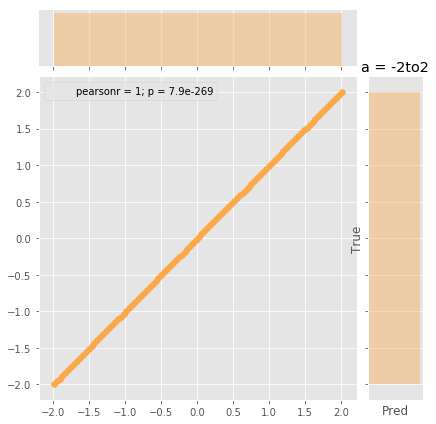

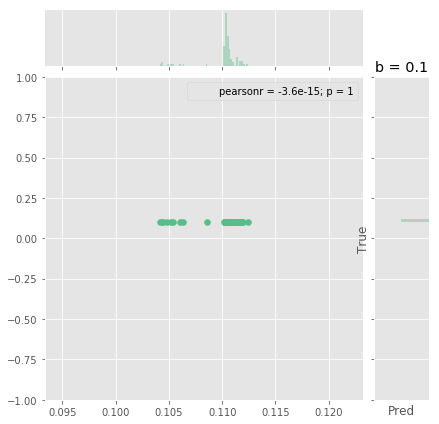

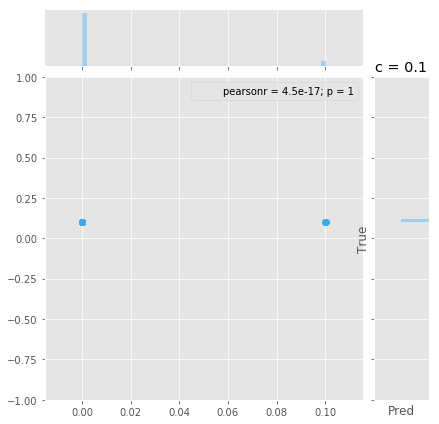

In [187]:
fix = np.zeros(100)
fix = fix + 0.1

figsize(7,7)
sns.jointplot(np.asarray(B_tau_list4[:,1,2,0]), np.asarray(np.linspace(-2,2,100)), color="#FBA848",
              marginal_kws=dict(bins=50))
plt.title("a = -2to2")
plt.ylabel("True")
plt.xlabel("Pred")
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(B_tau_list4[:,2,2,1]), fix, color="#58BE89",
              marginal_kws=dict(bins=50))
plt.title("b = 0.1")
plt.ylabel("True")
plt.xlabel("Pred")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(B_tau_list4[:,0,2,1]), fix, color="#40AAEF",
              marginal_kws=dict(bins=50))
plt.ylabel("True")
plt.xlabel("Pred")
plt.title("c = 0.1")
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.show()

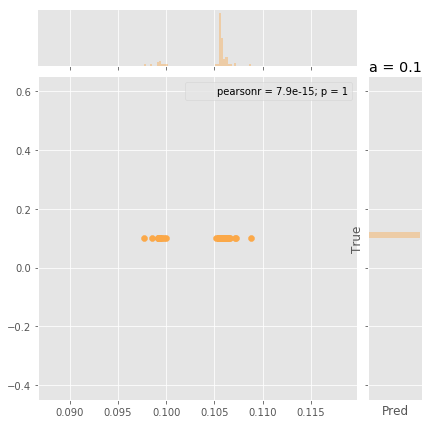

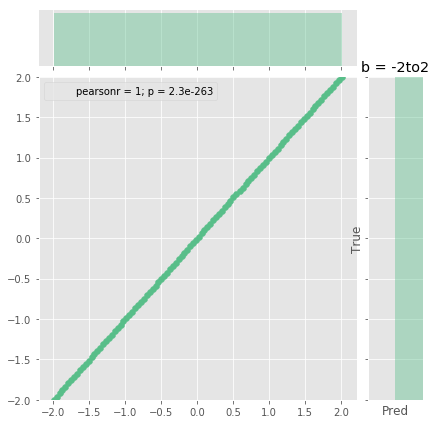

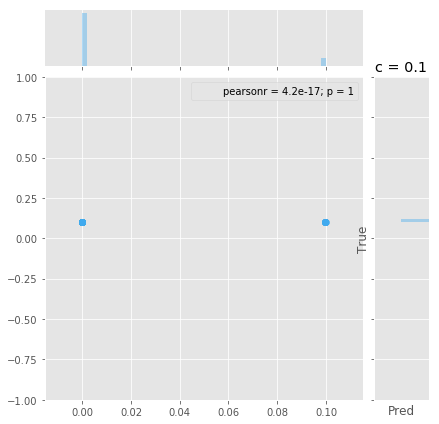

In [195]:
fix = np.zeros(100)
fix = fix + 0.1

figsize(7,7)
sns.jointplot(np.asarray(B_tau_list5[:,1,2,0]), fix, color="#FBA848",
              marginal_kws=dict(bins=50))
plt.title("a = 0.1")
plt.ylabel("True")
plt.xlabel("Pred")
plt.show()

figsize(7,7)
sns.jointplot(x=np.asarray(B_tau_list5[:,2,2,1]), y=np.asarray(np.linspace(-2,2,100)), color="#58BE89",
              marginal_kws=dict(bins=50))
plt.title("b = -2to2")
plt.ylabel("True")
plt.xlabel("Pred")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(B_tau_list5[:,0,2,1]), fix, color="#40AAEF",
              marginal_kws=dict(bins=50))
plt.ylabel("True")
plt.xlabel("Pred")
plt.title("c = 0.1")
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.show()

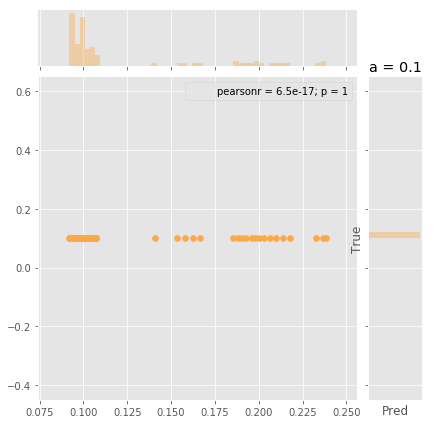

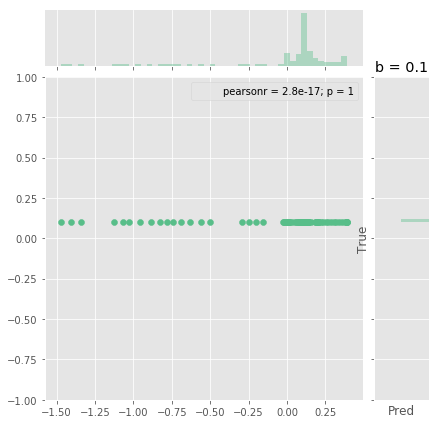

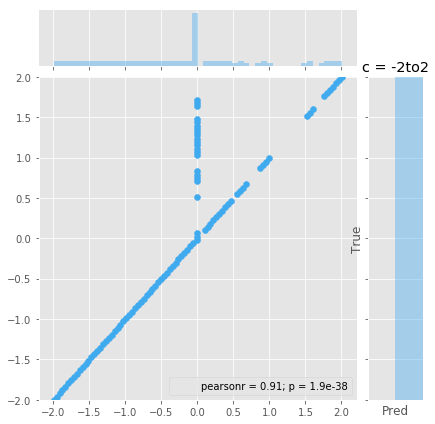

In [196]:
fix = np.zeros(100)
fix = fix + 0.1

figsize(7,7)
sns.jointplot(np.asarray(B_tau_list6[:,1,2,0]), fix, color="#FBA848",
              marginal_kws=dict(bins=50))
plt.title("a = 0.1")
plt.ylabel("True")
plt.xlabel("Pred")
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(B_tau_list6[:,2,2,1]), fix, color="#58BE89",
              marginal_kws=dict(bins=50))
plt.title("b = 0.1")
plt.ylabel("True")
plt.xlabel("Pred")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(B_tau_list6[:,0,2,1]), np.asarray(np.linspace(-2,2,100)), color="#40AAEF",
              marginal_kws=dict(bins=50))
plt.ylabel("True")
plt.xlabel("Pred")
plt.title("c = -2to2")
plt.xlim([-2,2])
plt.ylim([-2,2])

plt.show()

0.49214966480505001

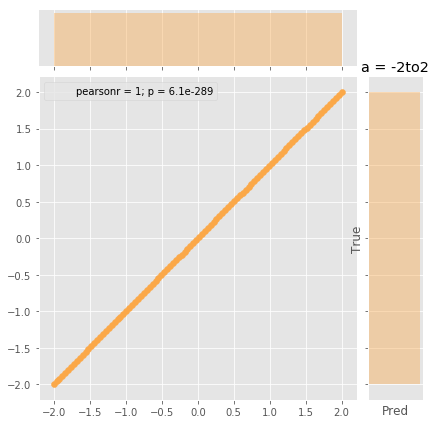

/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


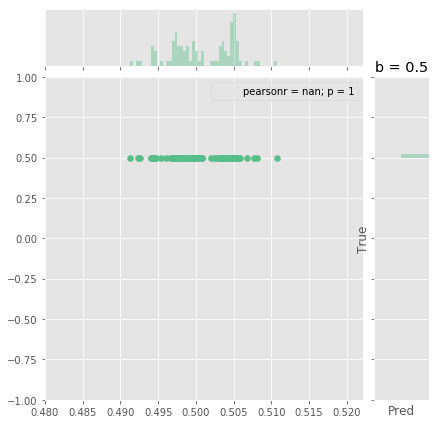

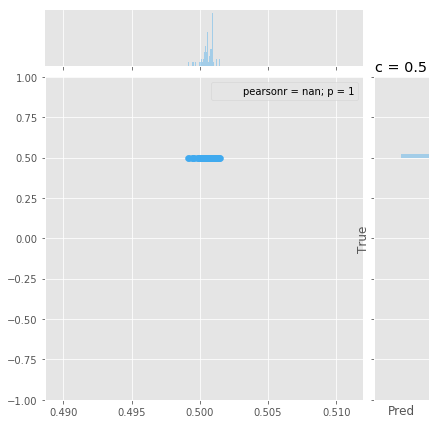

In [159]:
figsize(7,7)
sns.jointplot(np.asarray(a_est_list), np.asarray(a_true_list), color="#FBA848",
              marginal_kws=dict(bins=50))
plt.title("a = -2to2")
plt.ylabel("True")
plt.xlabel("Pred")
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(b_est_list), np.asarray(b_true_list), color="#58BE89",
              marginal_kws=dict(bins=50))
plt.title("b = 0.5")
plt.ylabel("True")
plt.xlabel("Pred")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(c_est_list), np.asarray(c_true_list), color="#40AAEF",
              marginal_kws=dict(bins=50))
plt.ylabel("True")
plt.xlabel("Pred")
plt.title("c = 0.5")
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.show()

/Users/Chang/.pyenv/versions/3.5.1/envs/python351/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


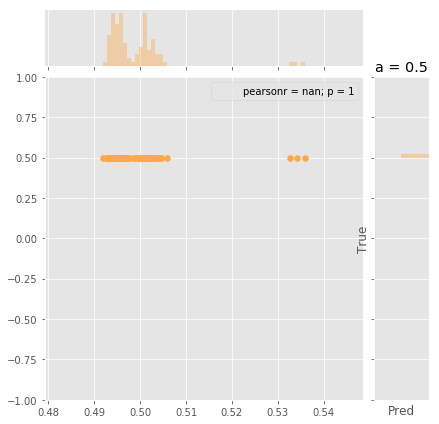

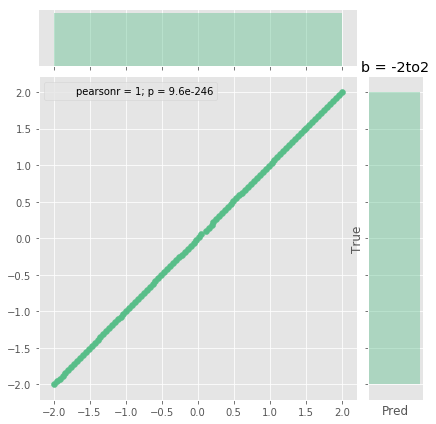

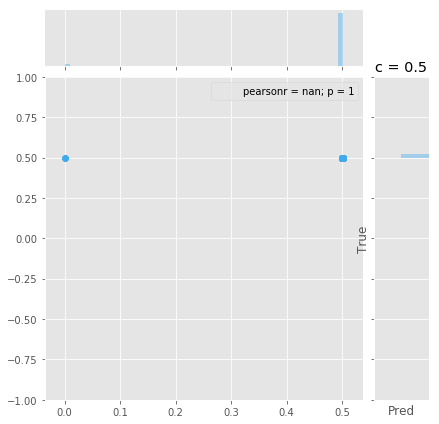

In [160]:
figsize(7,7)
sns.jointplot(np.asarray(a_est_list2), np.asarray(a_true_list2), color="#FBA848",
              marginal_kws=dict(bins=50))
plt.title("a = 0.5")
plt.ylabel("True")
plt.xlabel("Pred")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(b_est_list2), np.asarray(b_true_list2), color="#58BE89",
              marginal_kws=dict(bins=50))
plt.title("b = -2to2")
plt.ylabel("True")
plt.xlabel("Pred")
plt.show()

figsize(7,7)
sns.jointplot(np.asarray(c_est_list2), np.asarray(c_true_list2), color="#40AAEF",
              marginal_kws=dict(bins=50))
plt.ylabel("True")
plt.xlabel("Pred")
plt.title("c = 0.5")
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.show()

In [197]:
import pickle
with open('./pickle/B_tau_list1.pickle', mode='wb') as f:
    pickle.dump(B_tau_list, f)
with open('./pickle/B_tau_list2.pickle', mode='wb') as f:
    pickle.dump(B_tau_list2, f)
with open('./pickle/B_tau_list3.pickle', mode='wb') as f:
    pickle.dump(B_tau_list3, f)
with open('./pickle/B_tau_list4.pickle', mode='wb') as f:
    pickle.dump(B_tau_list4, f)
with open('./pickle/B_tau_list5.pickle', mode='wb') as f:
    pickle.dump(B_tau_list5, f)
with open('./pickle/B_tau_list6.pickle', mode='wb') as f:
    pickle.dump(B_tau_list6, f)    

In [ ]:
"""
Sys.setlocale("LC_CTYPE", "en_US.UTF-8")
Sys.setlocale("LC_ALL", "en_US.UTF-8")
Sys.setenv("DISPLAY"=":0.0")
setwd("/Users/Chang/Desktop/VARLiNGAM_dir/VARLiNGAM_R")
source("sourcedir.R")
source("main1.R")
main1('own')

sample_ms = read.csv("../sample_ts.csv")
drops <- c("X")
sample_ms = sample_ms[ , !(names(sample_ms) %in% drops)]

X_can = tsdata2canonicalform(ts(sample_ms), nlags=2)
res   = VARLiNGAM(X_can, est_meth="lad")

この検定の帰無仮説は、データが正規分布に従っているという仮説です。
アウトプットで表示されている Prob < W はp値になります。
選択されたアルファレベル（有意水準）が0.05であるとき、p値が0.05未満であればデータが正規分布に従っているという帰無仮説が棄却されます。 p値が0.05より大きいのであれば、帰無仮説は棄却されません。
"""

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
#from ica_lingam import LiNGAM
class VARLINGAM():
    def __init__(self):
        pass
    
    def _get_tau(self):
        return self.model.select_order(verbose=0)[self.ic]

    def _get_M_tau(self,res):
        M_tau = res.coefs.transpose(1, 2, 0)
        #for i in range(self.tau):
        #    M_tau[:,:,i] = M_tau[:,:,i] - np.diag(np.diag(M_tau[:,:,i]))
        return M_tau

    def _get_n_t(self,X, M_tau):
        n_list = []
        for i in range(self.tau):    
            n_list.append(X.dot(M_tau[:,:,i]))
        return X - np.sum(np.asarray(n_list),axis=0)

    def _get_B_tau(self,B_0, M_tau):
        B_list = []
        #return (np.eye(B_0.shape[0]) - B_0).dot(M_tau[:,:,i])
        for i in range(self.tau):
            B_list.append((np.eye(B_0.shape[0]) - B_0).dot(M_tau)[:,:,i])
        return np.asarray(B_list)
    
    def fit(self, X, ic="bic", **kwargs):
        self.ic = ic
        self.model = VAR(X)                  #get time-series delay         
        self.tau   = self._get_tau()
        res        = self.model.fit(self.tau)               #VAR model fit
        #from IPython.core.debugger import Pdb; Pdb().set_trace()
        self.M_tau = self._get_M_tau(res)         #tau time-delay Causal matrix
        n_t        = self._get_n_t(X, self.M_tau)      #noise vector
        n_t        = n_t - np.sum(n_t, axis=0)
        #from IPython.core.debugger import Pdb; Pdb().set_trace()
        bs_lingam = BS_Pruning(**kwargs)        #noise vector lingam
        self.B_0    = bs_lingam.fit(n_t, matrix_plt=False)
        self.B_tau  = self._get_B_tau(self.B_0, self.M_tau) #estimate B_tau (causal matrix) 
        self.B_tau  = np.vstack([self.B_0.reshape(1,self.B_0.shape[0],self.B_0.shape[0]),
                                 self.B_tau])
        return self.B_tau